# 데이터 전처리

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime, timedelta

import os


%matplotlib inline

# 경고메세지 팝업 끄기
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc('font',family='Malgun Gothic')

from IPython.display import set_matplotlib_formats
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입`니다.
set_matplotlib_formats('retina')

In [3]:
df=pd.read_csv('funda_data.csv')
df

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date,...,holidays_x,quarter,season,sido,city,비고,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7
0,17,48134,c,2016-06-01,10:41,0,대구 수성구,간이 음식 포장 판매 전문점,1485,2016-06-01 10:41:00,...,0,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업
1,17,48135,a,2016-06-01,14:35,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 14:35:00,...,0,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업
2,17,48136,a,2016-06-01,15:07,0,대구 수성구,간이 음식 포장 판매 전문점,1800,2016-06-01 15:07:00,...,0,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업
3,17,48137,f,2016-06-01,16:19,0,대구 수성구,간이 음식 포장 판매 전문점,2328,2016-06-01 16:19:00,...,0,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업
4,17,48138,a,2016-06-01,20:56,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 20:56:00,...,0,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318113,2136,4659988,f,2017-10-04,23:32,0,제주 제주시,기타 주점업,9571,2017-10-04 23:32:00,...,1,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업
2318114,2136,4659465,f,2017-10-04,23:41,0,제주 제주시,기타 주점업,7000,2017-10-04 23:41:00,...,1,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업
2318115,2136,4659989,d,2017-10-04,23:47,0,제주 제주시,기타 주점업,5000,2017-10-04 23:47:00,...,1,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업
2318116,2136,4659710,g,2017-10-04,23:53,0,제주 제주시,기타 주점업,3785,2017-10-04 23:53:00,...,1,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업


In [4]:
df.rename(columns={'Unnamed: 1':'cate_l','Unnamed: 3':'biz','Unnamed: 5':'cate_m','Unnamed: 7':'cate_s'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318118 entries, 0 to 2318117
Data columns (total 24 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   store_id          int64 
 1   card_id           int64 
 2   card_company      object
 3   transacted_date   object
 4   transacted_time   object
 5   installment_term  int64 
 6   region            object
 7   type_of_business  object
 8   amount            int64 
 9   date              object
 10  year              int64 
 11  month             int64 
 12  dayofweek         int64 
 13  hour              int64 
 14  holidays_x        int64 
 15  quarter           int64 
 16  season            object
 17  sido              object
 18  city              object
 19  비고                object
 20  cate_l            object
 21  biz               object
 22  cate_m            object
 23  cate_s            object
dtypes: int64(10), object(14)
memory usage: 424.5+ MB


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df = df.astype({'holidays_x':'object'})

In [8]:
def sales(amount):
    if amount >= 0:
        return "1"
    else:
        return "0"

df["sales"] = df.amount.apply(sales)
df

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date,...,quarter,season,sido,city,비고,cate_l,biz,cate_m,cate_s,sales
0,17,48134,c,2016-06-01,10:41,0,대구 수성구,간이 음식 포장 판매 전문점,1485,2016-06-01 10:41:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
1,17,48135,a,2016-06-01,14:35,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 14:35:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
2,17,48136,a,2016-06-01,15:07,0,대구 수성구,간이 음식 포장 판매 전문점,1800,2016-06-01 15:07:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
3,17,48137,f,2016-06-01,16:19,0,대구 수성구,간이 음식 포장 판매 전문점,2328,2016-06-01 16:19:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
4,17,48138,a,2016-06-01,20:56,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 20:56:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318113,2136,4659988,f,2017-10-04,23:32,0,제주 제주시,기타 주점업,9571,2017-10-04 23:32:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1
2318114,2136,4659465,f,2017-10-04,23:41,0,제주 제주시,기타 주점업,7000,2017-10-04 23:41:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1
2318115,2136,4659989,d,2017-10-04,23:47,0,제주 제주시,기타 주점업,5000,2017-10-04 23:47:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1
2318116,2136,4659710,g,2017-10-04,23:53,0,제주 제주시,기타 주점업,3785,2017-10-04 23:53:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1


In [9]:
df["sales"].value_counts()

1    2292406
0      25712
Name: sales, dtype: int64

In [10]:
df = df.astype({'sales':'int'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318118 entries, 0 to 2318117
Data columns (total 25 columns):
 #   Column            Dtype         
---  ------            -----         
 0   store_id          int64         
 1   card_id           int64         
 2   card_company      object        
 3   transacted_date   object        
 4   transacted_time   object        
 5   installment_term  int64         
 6   region            object        
 7   type_of_business  object        
 8   amount            int64         
 9   date              datetime64[ns]
 10  year              int64         
 11  month             int64         
 12  dayofweek         int64         
 13  hour              int64         
 14  holidays_x        object        
 15  quarter           int64         
 16  season            object        
 17  sido              object        
 18  city              object        
 19  비고                object        
 20  cate_l            object        
 21  biz     

# 전체 데이터

## 시도별 매출건수 / 매출액

In [12]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_b, x="sido", y="amount", ci=None)

NameError: name 'df_b' is not defined

<Figure size 720x216 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(data=df_b, x="sido", y="store_id", ci=None)

## 연도&계절별 매출액

In [ ]:
sns.catplot(data=df, x="season", y="amount", kind="bar", col="year", col_wrap=4)

## 연도&분기별 매출액

In [ ]:
sns.catplot(data=df, x="quarter", y="amount", kind="bar", col="year", col_wrap=4)

## 연도 & 업종 별 매출액/매출건수

In [ ]:
sns.catplot(data=df, x="year", y="amount", col="type_of_business", kind = "bar",col_wrap=4, ci=None)

In [ ]:
sns.catplot(data=df, x="year", y="card_id", col="type_of_business", kind = "bar",col_wrap=4, ci=None)

In [ ]:
sns.catplot(data=df, x="year", y="store_id", col="type_of_business", kind = "bar",col_wrap=4, ci=None)

# 카드사 별 분포

In [13]:
size = df['card_company'].value_counts().sort_index()/ df['card_company'].value_counts().sum()*100
size

a    27.790389
b    16.344940
c    15.384894
d    12.720405
e     8.664399
f     8.338661
g     6.254815
h     4.501496
Name: card_company, dtype: float64

In [ ]:
plt.pie(size, labels = size. index, autopct='%.1f%%', shadow = True, startangle=140)
plt.axis('equal')
plt.legend(size.index, loc="best")
plt.tight_layout()

plt.show()


In [14]:
plt.savefig('card_company_ratio.png')

<Figure size 432x288 with 0 Axes>

In [94]:
df.columns

Index(['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business',
       'amount', 'date', 'year', 'month', 'dayofweek', 'hour', 'holidays_x',
       'quarter', 'season', 'sido', 'city', '비고', 'cate_l', 'biz', 'cate_m',
       'cate_s', 'sales'],
      dtype='object')

In [97]:
m = df[df["type_of_business"]=='편의점']
m["region"].value_counts()

Series([], Name: region, dtype: int64)

In [102]:
n = df[df["cate_m"]=='일반 교습학원']
n["region"].value_counts()

서울 서초구    4078
경기 고양시    3454
경남 김해시    2454
광주 서구     2133
전남 목포시    2051
경기 부천시    1680
경기 용인시    1496
인천 연수구    1397
경북 구미시    1089
부산 수영구     956
경기 김포시     747
충남 천안시     735
대구 달성군     700
경기 성남시     654
경기 시흥시     644
울산 남구      526
Name: region, dtype: int64

In [113]:
n = df[df["biz"]=='교육 서비스업']
n["hour"].value_counts()

17    13996
18    13113
16    12463
15    11621
19    10195
14     8914
20     6535
13     5655
21     4382
12     3710
11     2530
10     2101
9      1766
22     1614
23      443
8       210
7        80
0        74
6        17
1         4
2         3
5         1
Name: hour, dtype: int64

In [110]:
df[df["cate_m"]=='일반 교습학원']

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date,...,quarter,season,sido,city,비고,cate_l,biz,cate_m,cate_s,sales
145,247,485860,c,2016-06-01,19:12,0,경기 고양시,일반 교과학원,85714,2016-06-01 19:12:00,...,2,summer,경기,고양시,,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
146,247,485861,b,2016-06-01,19:24,0,경기 고양시,일반 교과학원,42857,2016-06-01 19:24:00,...,2,summer,경기,고양시,,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
208,300,572792,c,2016-06-01,19:36,0,인천 연수구,일반 교과학원,50142,2016-06-01 19:36:00,...,2,summer,인천,연수구,,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
209,300,572793,b,2016-06-01,22:08,0,인천 연수구,일반 교과학원,121142,2016-06-01 22:08:00,...,2,summer,인천,연수구,,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
219,330,627898,b,2016-06-01,18:16,0,경기 시흥시,일반 교과학원,45714,2016-06-01 18:16:00,...,2,summer,경기,시흥시,,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312944,1891,4084517,c,2018-01-01,13:15,0,경기 용인시,일반 교과학원,68571,2018-01-01 13:15:00,...,1,winter,경기,용인시,신정,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
2312945,1891,4084647,h,2018-01-01,16:07,0,경기 용인시,일반 교과학원,22857,2018-01-01 16:07:00,...,1,winter,경기,용인시,신정,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
2312946,1891,4084575,c,2018-01-01,16:39,0,경기 용인시,일반 교과학원,107142,2018-01-01 16:39:00,...,1,winter,경기,용인시,신정,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1
2312947,1891,4084441,g,2018-01-01,18:54,0,경기 용인시,일반 교과학원,42857,2018-01-01 18:54:00,...,1,winter,경기,용인시,신정,교육 서비스업(85),교육 서비스업,일반 교습학원,일반 교습학원,1


In [ ]:
g=df[df["cate_m"]=='기타 교육기관']
g["region"].value_counts()

In [100]:
df["cate_m"].unique()

array(['음식점업', '섬유, 의복, 신발 및 가죽제품 소매업', '스포츠 서비스업', '기타 사업 지원 서비스업',
       '주점 및 비알코올 음료점업', '그 외 기타 개인 서비스업', '일반 교습학원', '사진 촬영 및 처리업',
       '문화, 오락 및 여가 용품 소매업', '기타 상품 전문 소매업', '생활용품 도매업',
       '미용, 욕탕 및 유사 서비스업', '음ㆍ식료품 및 담배 소매업', '도서관, 사적지 및 유사 여가관련 서비스업',
       '자동차 부품 및 내장품 판매업', '기타 생활용품 소매업', '종합 소매업', '기타 교육기관', '의원',
       '자동차 및 모터사이클 수리업', '건축 자재, 철물 및 난방장치 도매업', '기타 전문 도매업',
       '일반 및 생활 숙박시설 운영업', '의료용 기기 제조업', '기계장비 및 관련 물품 도매업',
       '가전제품 및 정보 통신장비 소매업', '무점포 소매업', '병원', '그 외 기타 제품 제조업',
       '건물설비 설치 공사업', '유원지 및 기타 오락관련 서비스업', '교육 지원 서비스업', '상품 종합 도매업',
       '산업용 농ㆍ축산물 및 동ㆍ식물 도매업', '창작 및 예술관련 서비스업', '컴퓨터 및 통신장비 수리업',
       '인문 및 사회과학 연구개발업', '기록매체 복제업', '건축 기술, 엔지니어링 및 관련 기술 서비스업',
       '직물 직조 및 직물제품 제조업', '여행사 및 기타 여행 보조 서비스업', '회사 본부 및 경영 컨설팅 서비스업',
       '개인 및 가정용품 임대업', '음ㆍ식료품 및 담배 도매업', '귀금속 및 장신용품 제조업', '기타 식품 제조업',
       '소화물 전문 운송업', '전동기, 발전기 및 전기 변환ㆍ공급ㆍ제어 장치 제조업'], dtype=object)

In [104]:
df["cate_l"].unique()

array(['숙박 및 음식점업(55~56)', '도매 및 소매업(45~47)',
       '예술, 스포츠 및 여가관련 서비스업(90~91)', '사업시설 관리, 사업 지원 및 임대 서비스업(74~76)',
       '협회 및 단체, 수리 및 기타 개인 서비스업(94~96)', '교육 서비스업(85)',
       '전문, 과학 및 기술 서비스업(70~73)', '보건업 및 사회복지 서비스업(86~87)', '제조업(10~34)',
       '건설업(41~42)', '운수 및 창고업(49~52)'], dtype=object)

## 카드사별 업종 비율

### 카드사별 업종 (소분류)

In [15]:
df_ratio=pd.crosstab(df["card_company"], df["biz"])
df_ratio = df_ratio.T

df_ratio.style.background_gradient(cmap="Blues")

card_company,a,b,c,d,e,f,g,h
biz,,,,,,,,
개인 및 소비용품 수리업,7954,3741,3739,3289,2991,2934,1494,1215
"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",216,126,121,49,64,56,53,23
교육 서비스업,21901,15480,16374,4453,13145,10285,8040,9749
기타 개인 서비스업,57034,39173,37732,30355,21224,20027,16164,12022
"기타 전문, 과학 및 기술 서비스업",1497,1238,1184,713,958,903,655,445
기타 제품 제조업,395,348,191,86,139,198,100,97
도매 및 상품 중개업,20239,10848,11937,8559,7556,6453,5166,3051
보건업,1209,702,699,2147,615,568,653,517
사업 지원 서비스업,1236,1030,1179,308,528,584,508,208


#### 카드사별 top 3 (소분류)
* 음식점 및 주점업
* 소매업(자동차 제외)
* 기타 개인 서비스업

| 그래프로 나타내면 다음과 같음

In [16]:
df_ratio=pd.crosstab(df["card_company"], df["biz"])
df_stacked_biz = df_ratio.apply(lambda x: x*100/sum(x), axis=1)

### 카드사별 업종 (중분류)

In [17]:
df_ratio_l=pd.crosstab(df["card_company"], df["cate_l"])
df_ratio_l= df_ratio_l.T

df_ratio_l.style.background_gradient(cmap="Blues")

card_company,a,b,c,d,e,f,g,h
cate_l,,,,,,,,
건설업(41~42),298,360,199,0,117,86,76,41
교육 서비스업(85),21901,15480,16374,4453,13145,10285,8040,9749
도매 및 소매업(45~47),152224,93649,95863,67920,56635,51788,36101,30665
보건업 및 사회복지 서비스업(86~87),1209,702,699,2147,615,568,653,517
"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",2141,1801,1857,591,849,898,790,318
숙박 및 음식점업(55~56),367541,204347,181565,173436,94176,96877,72839,44468
"예술, 스포츠 및 여가관련 서비스업(90~91)",25013,14346,13533,10466,8155,6961,6402,3802
운수 및 창고업(49~52),3549,776,647,780,230,258,476,45
"전문, 과학 및 기술 서비스업(70~73)",2244,1529,1625,799,1241,1073,842,736


#### 카드사별 top 3 (중분류)
* 숙박 및 음식점업
* 도매 및 소매업
* 교육 서비스업


| 그래프로 나타내면 다음과 같음

Text(0.5, 1.0, '카드사별 업종구성 비율(중분류)')

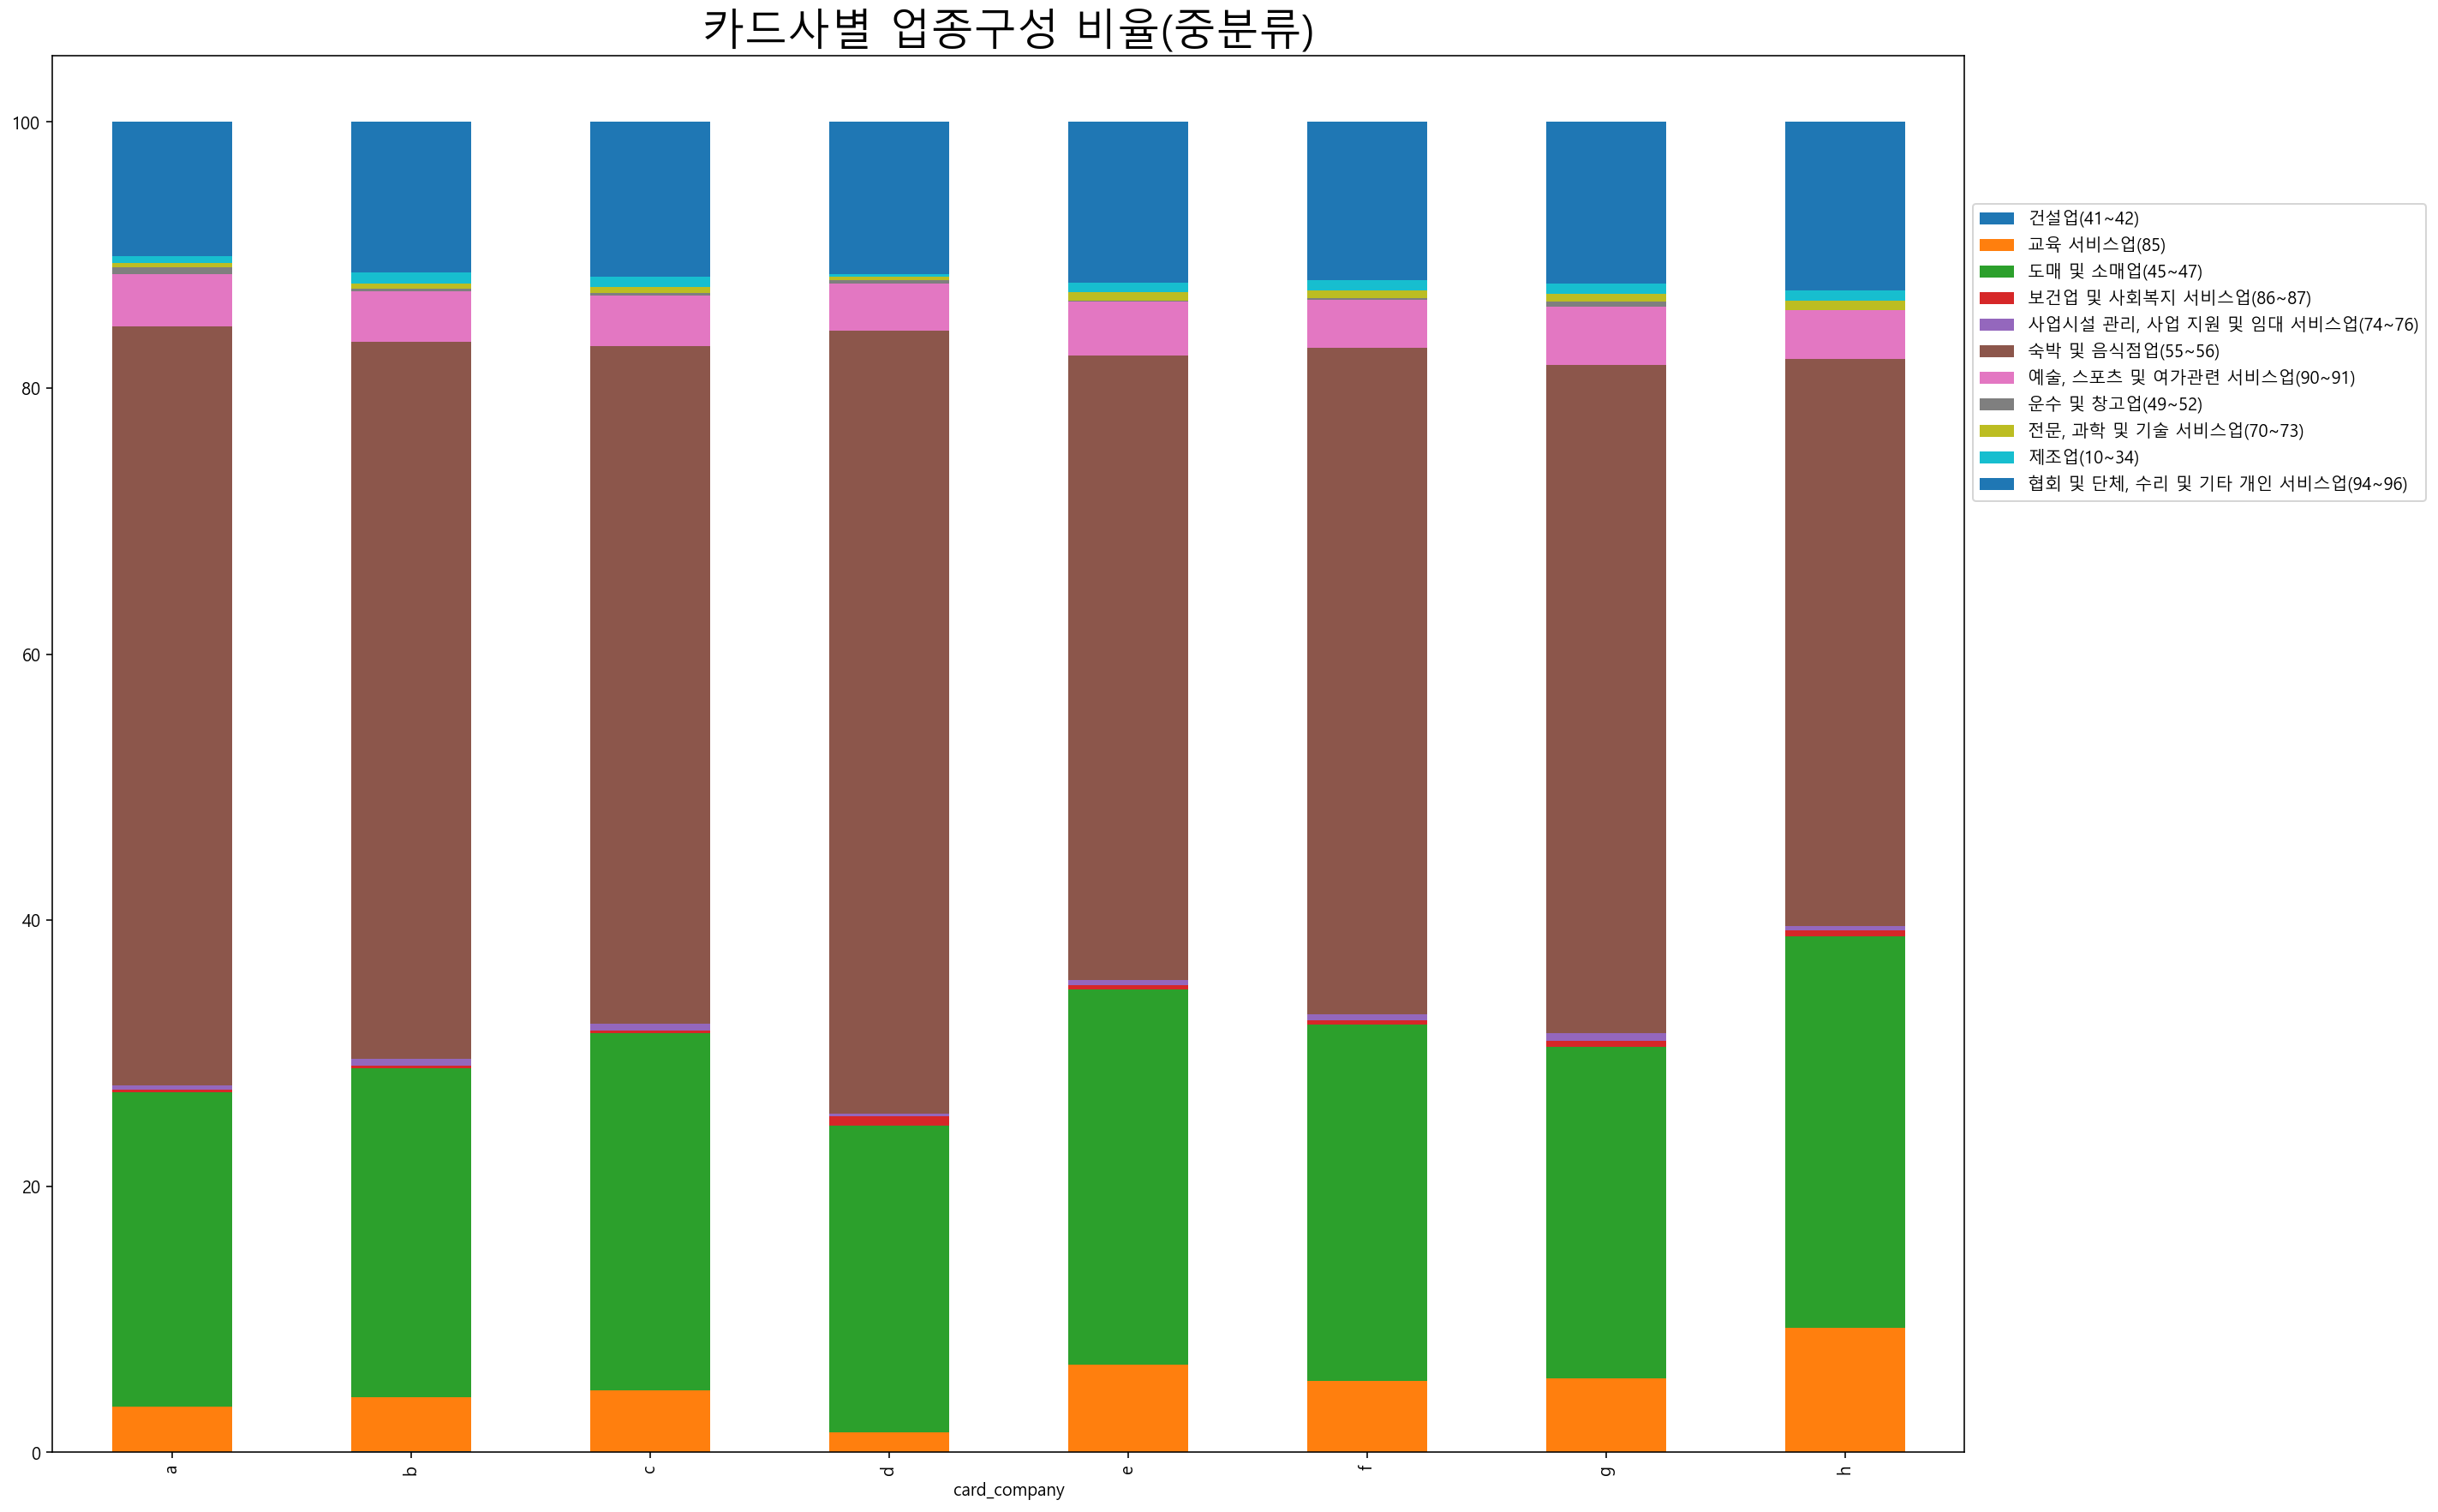

In [18]:
df_ratio=pd.crosstab(df["card_company"], df["cate_l"])
df_stacked_biz1 = df_ratio.apply(lambda x: x*100/sum(x), axis=1)
df_stacked_biz1.plot(kind="bar", stacked=True,figsize=(20,15))
plt.legend(bbox_to_anchor=(1,0.9))
plt.title('카드사별 업종구성 비율(중분류)',fontsize=25)

## 카드사별 지역비율

In [19]:
df_ratio_rg = pd.crosstab(df["card_company"], df["sido"])
df_ratio_rg = df_ratio_rg.T

df_ratio_rg.style.background_gradient(cmap="Blues")

card_company,a,b,c,d,e,f,g,h
sido,,,,,,,,
강원,22362,12334,18203,18165,6436,7676,3690,2972
경기,138913,100193,85887,51163,46237,40848,35189,21833
경남,62029,28703,24606,30258,16723,16764,8427,11132
경북,52764,23419,23590,31615,15552,14846,9859,7185
광주,18504,11742,8853,7631,5670,6800,3006,3743
대구,38986,16980,14006,9658,10838,9360,6140,4565
대전,10936,10021,9083,8164,6161,5474,7374,2612
부산,67573,32980,26579,14581,18277,15327,10986,14365
서울,52841,39045,38123,10125,17407,14099,19469,9552


#### 카드사  지역 top 3 
* 공통적으로 경기 지역에서 많은 매출이 발생
* D카드사의 경우, 경기 다음으로 경남/ 경북/ 충남/ 충북의 매출이 많음
* 그외 카드 사들은 경기 이외에 서울/ 부산이 다음으로 매출이 많음

| 그래프로 나타내면 다음과 같음

Text(0.5, 1.0, '카드사별 지역비율')

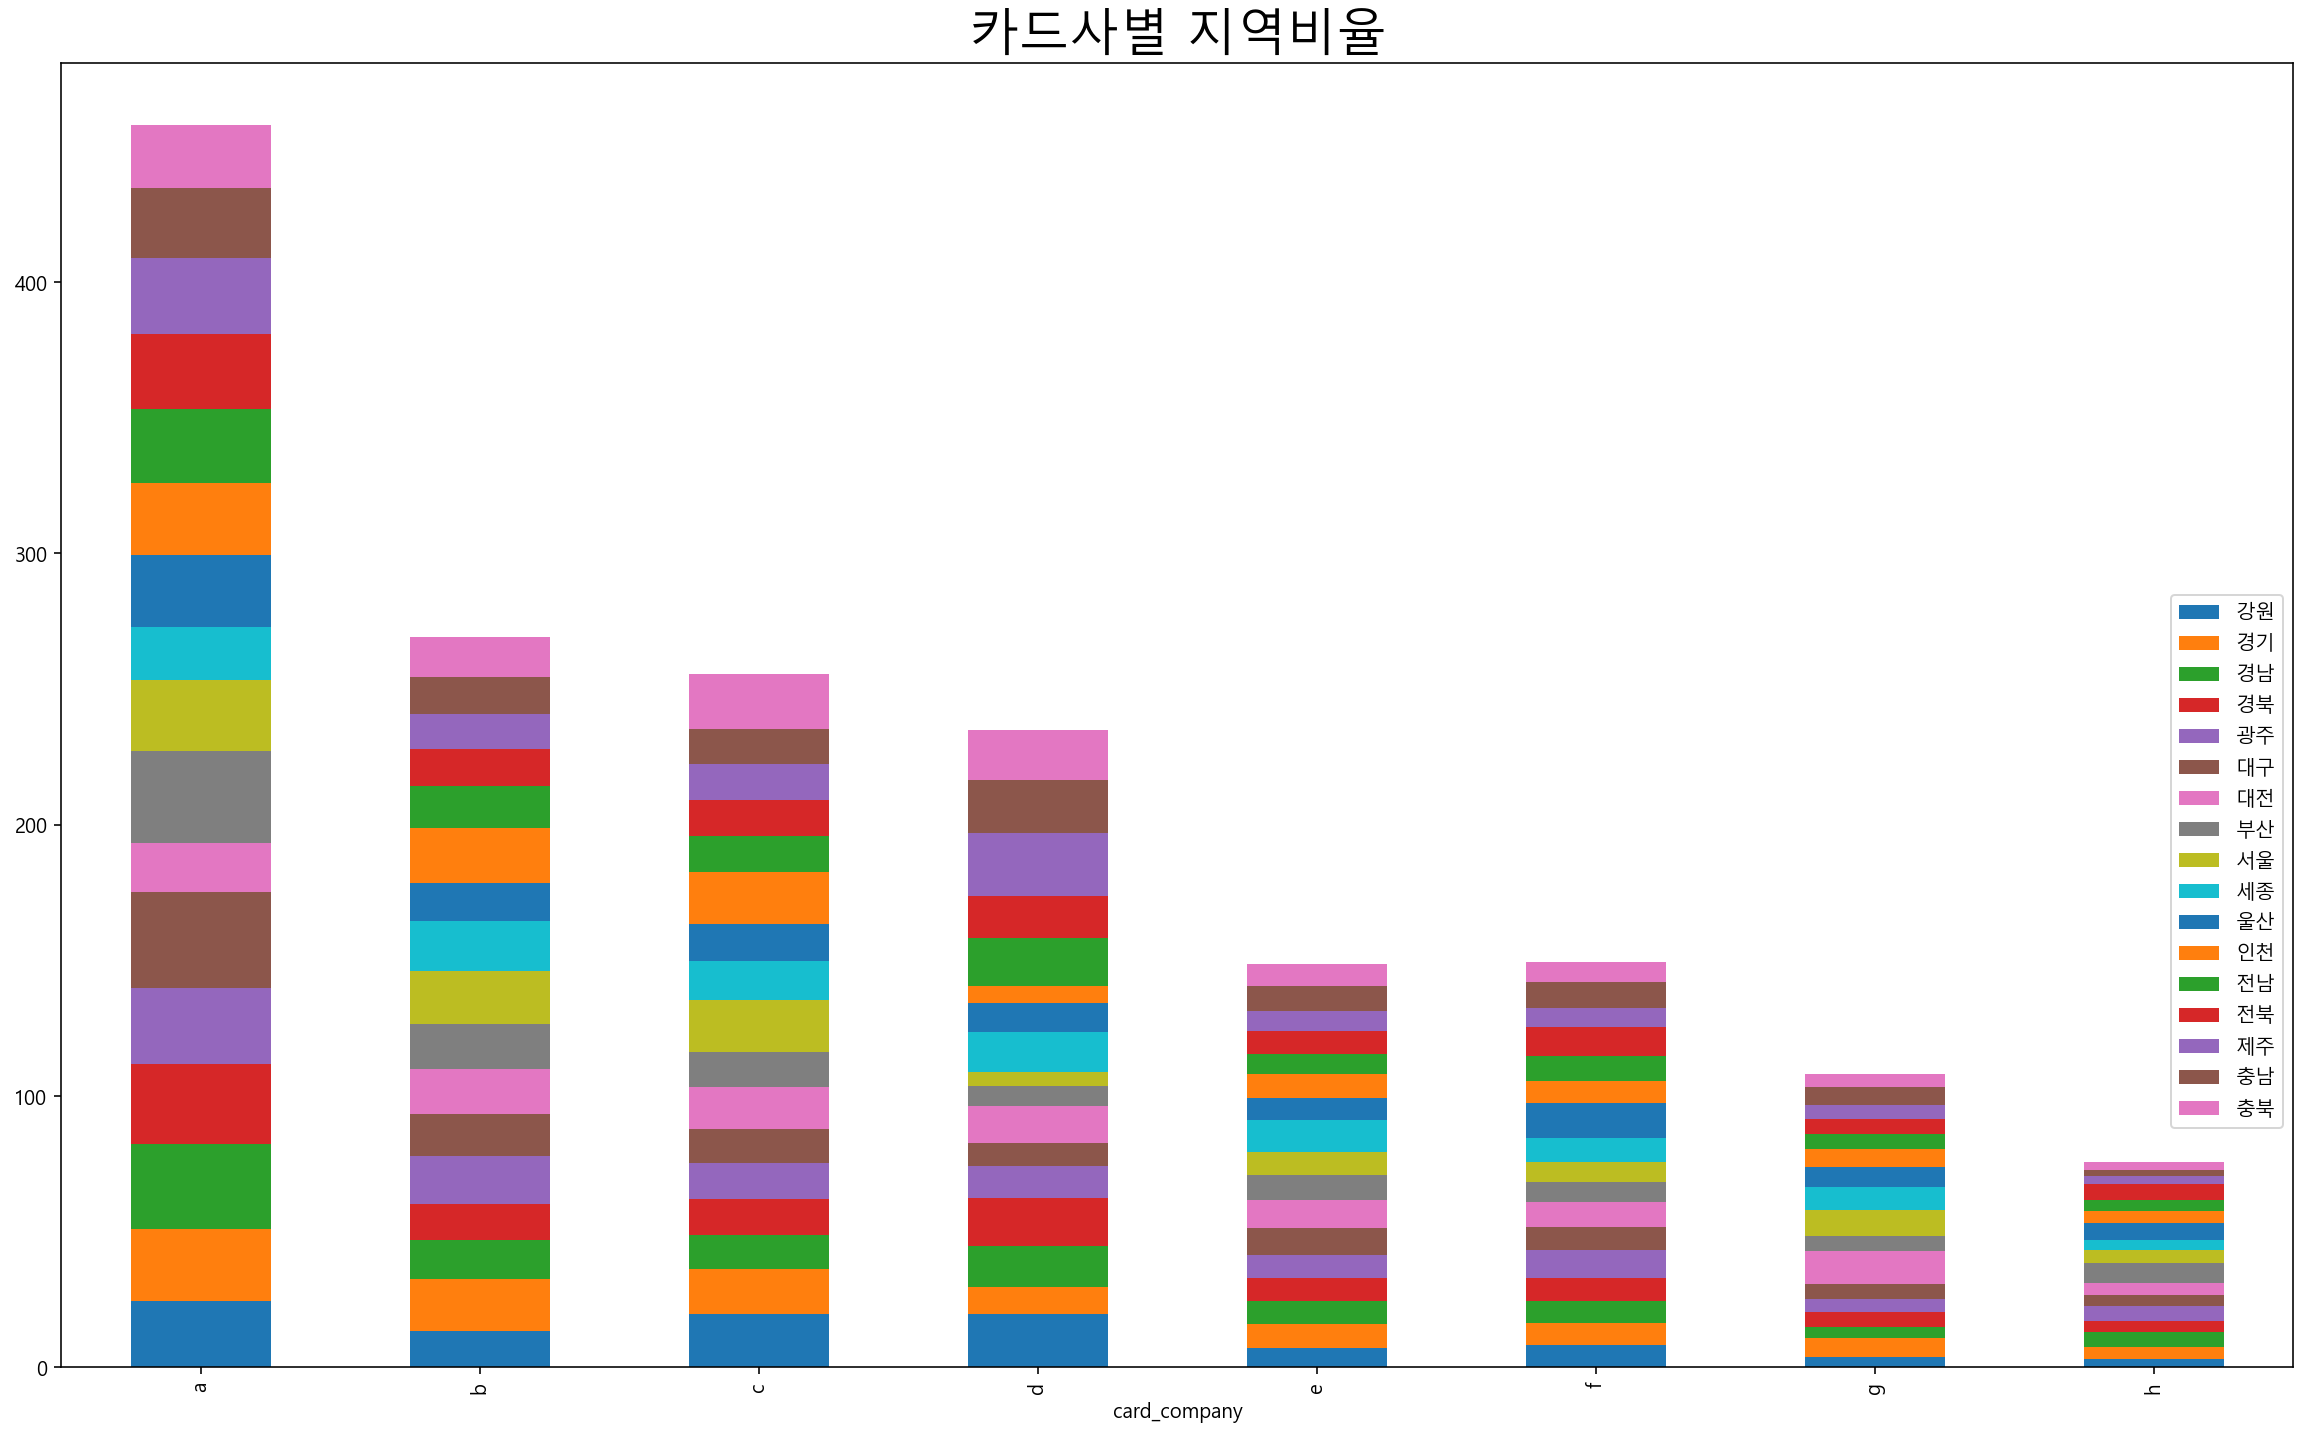

In [21]:
df_stacked_sido = df_ratio_rg.apply(lambda x: x*100/sum(x), axis=1)
df_stacked_sido_rv = df_stacked_sido.T
df_stacked_sido_rv.plot(kind="bar", stacked=True, figsize=(20,12))
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('카드사별 지역비율',fontsize=25)

## 카드사별 계절 비율

In [22]:
df_ratio_ss = pd.crosstab(df["card_company"], df["season"])
df_ratio_ss

df_ratio_ss.style.background_gradient(cmap="Blues")

season,fall,spring,summer,winter
card_company,,,,
a,171311,131249,179287,162367
b,101895,76554,101725,98721
c,94922,73783,99036,88899
d,80075,60786,79155,74858
e,54159,40786,55551,50355
f,51803,39080,53504,48913
g,38803,29498,40143,36550
h,28369,20564,28900,26517


In [23]:
df_stacked_sn = df_ratio_ss.apply(lambda x: x*100/sum(x), axis=1)
df_stacked_sn

season,fall,spring,summer,winter
card_company,,,,
a,26.592250,20.373509,27.830348,25.203892
b,26.892675,20.204542,26.847807,26.054976
c,26.615635,20.688369,27.769179,24.926817
d,27.155666,20.614228,26.843669,25.386436
e,26.964765,20.306595,27.657816,25.070824
f,26.799276,20.217279,27.679255,25.304190
g,26.761797,20.344290,27.685973,25.207940
h,27.186392,19.706756,27.695256,25.411596


Text(0.5, 1.0, '카드사별 계절 매출 비교')

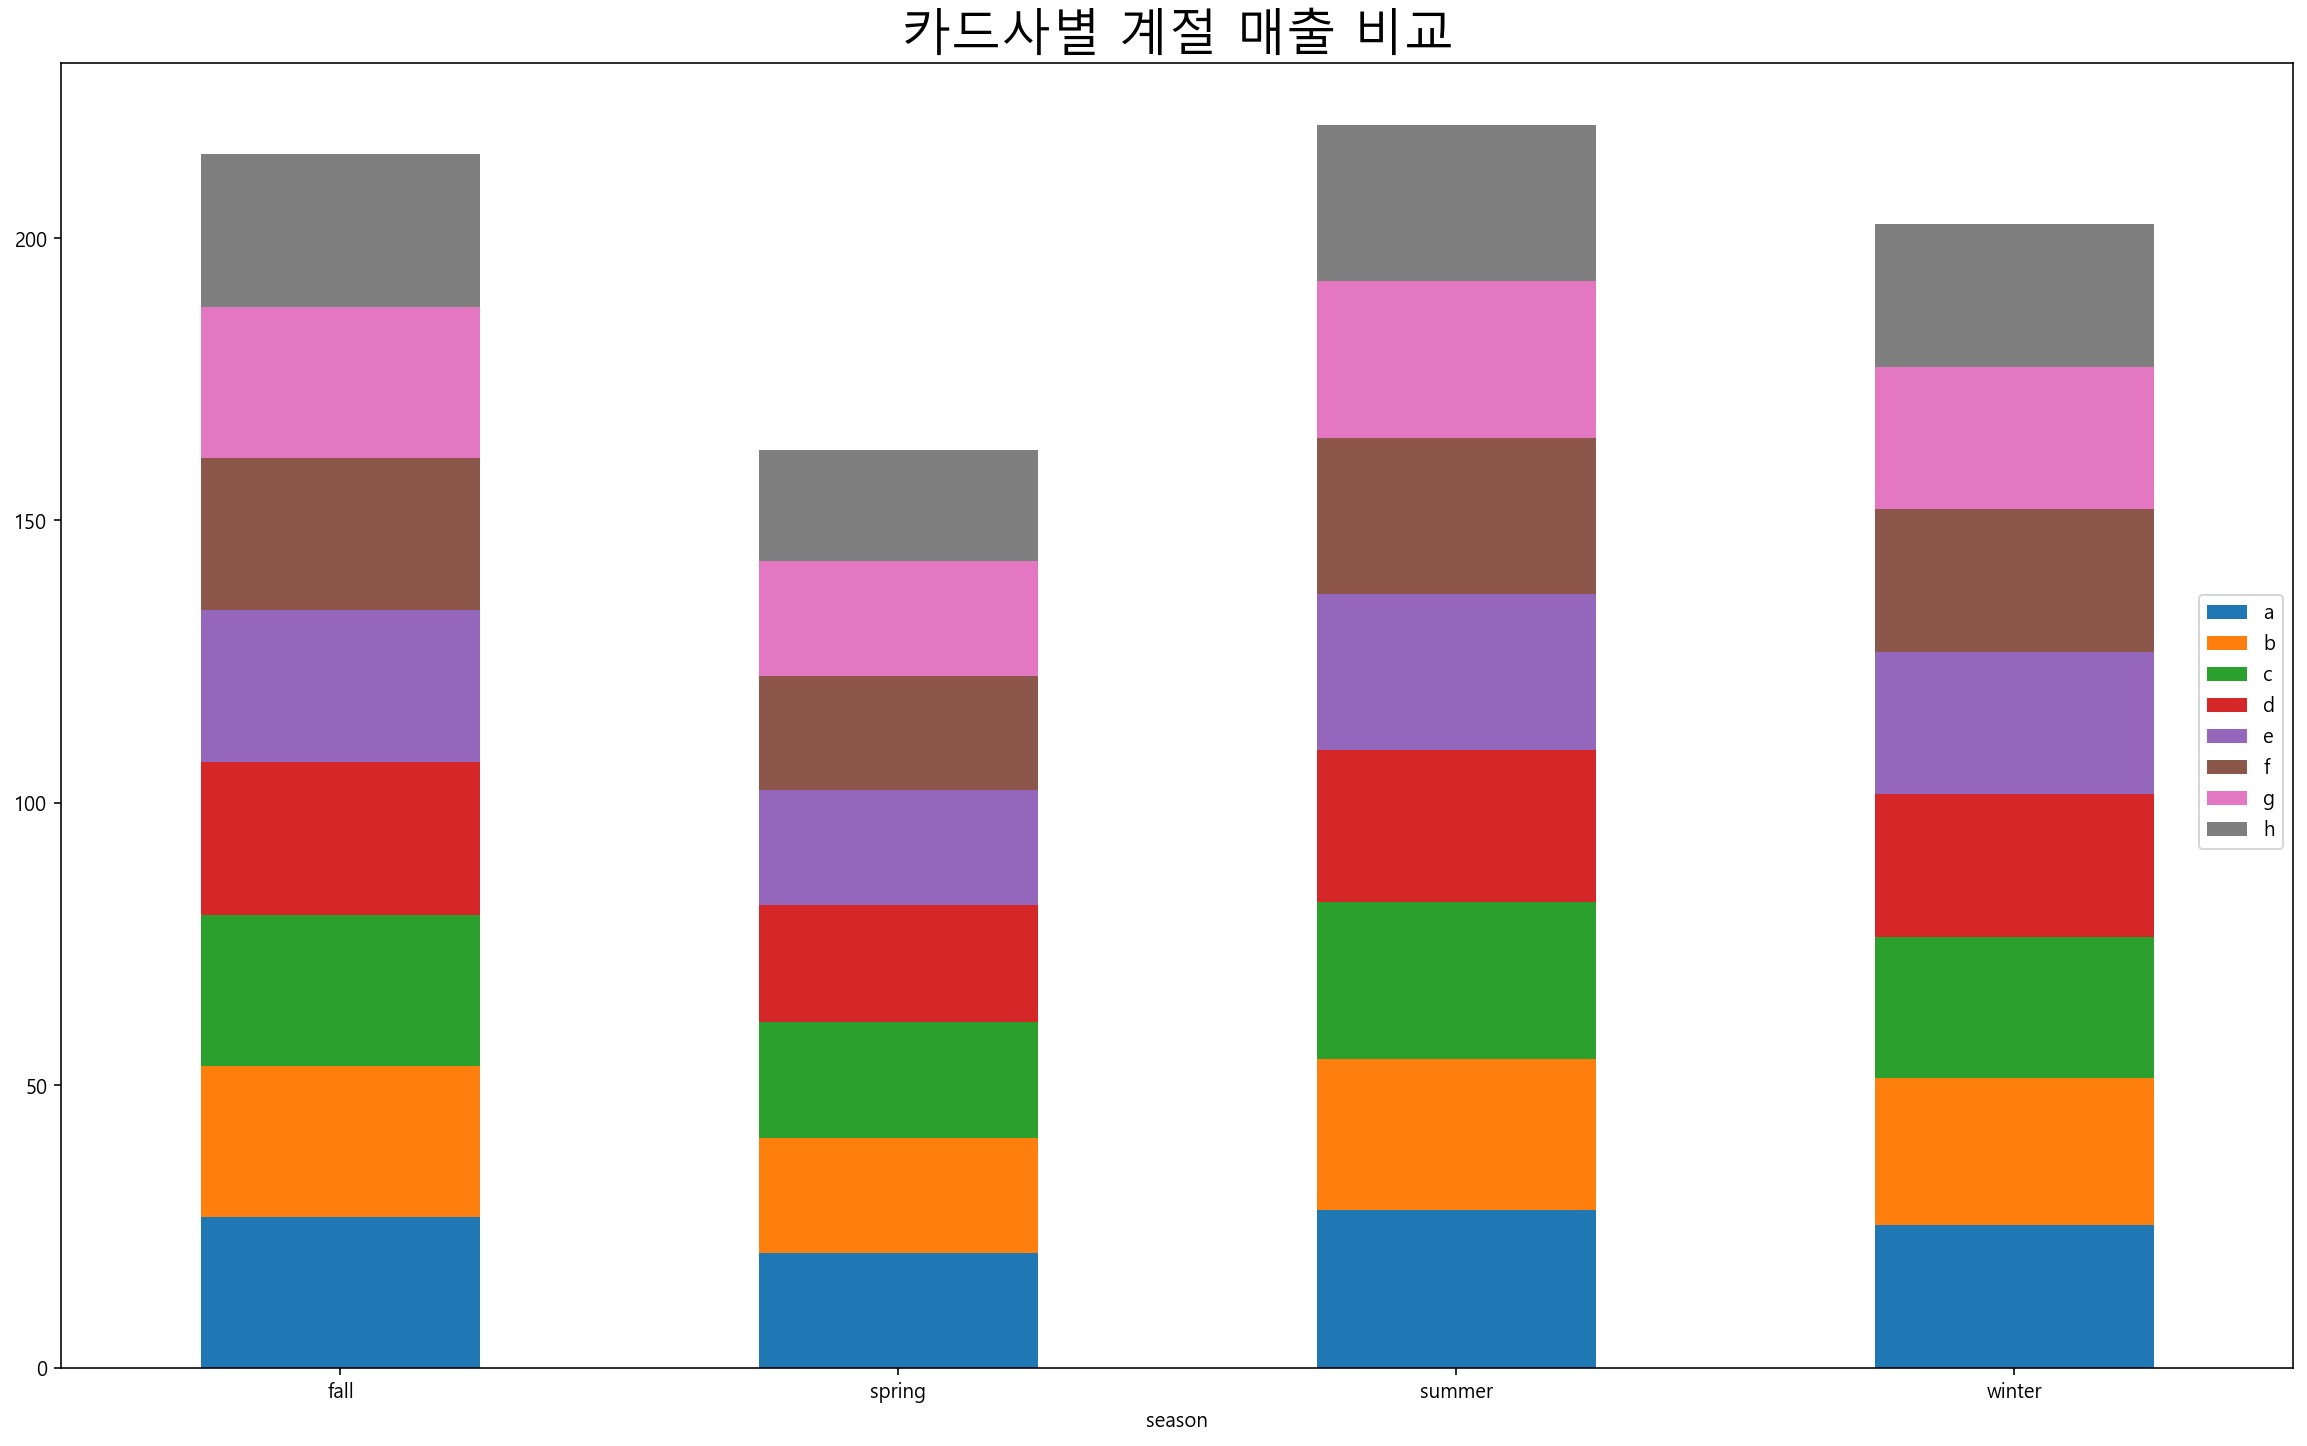

In [24]:
df_stacked_ss = df_ratio_ss.apply(lambda x: x*100/sum(x), axis=1)
df_stacked_ss_rv = df_stacked_ss.T
df_stacked_ss_rv.plot(kind="bar", stacked=True, figsize=(20,12), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('카드사별 계절 매출 비교',fontsize=25)

* 카드사별 계절 매출의 경우 비율이 비슷하다.
* 카드사별로 따로 분리하여 계절과 결합한 데이터분석 필요

## 카드사별 분기비율

In [25]:
df.columns

Index(['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business',
       'amount', 'date', 'year', 'month', 'dayofweek', 'hour', 'holidays_x',
       'quarter', 'season', 'sido', 'city', '비고', 'cate_l', 'biz', 'cate_m',
       'cate_s', 'sales'],
      dtype='object')

In [26]:
df_ratio_qq = pd.crosstab(df["card_company"], df["quarter"])
df_ratio_qq

quarter,1,2,3,4
card_company,,,,
a,146610,148805,176826,171973
b,88126,85895,101774,103100
c,80879,83118,97731,94912
d,67527,67251,80069,80027
e,45231,46236,55284,54100
f,43908,43987,53199,52206
g,32919,33303,39985,38787
h,23630,23473,28853,28394


Text(0.5, 1.0, '카드사별 분기 매출건수 비교')

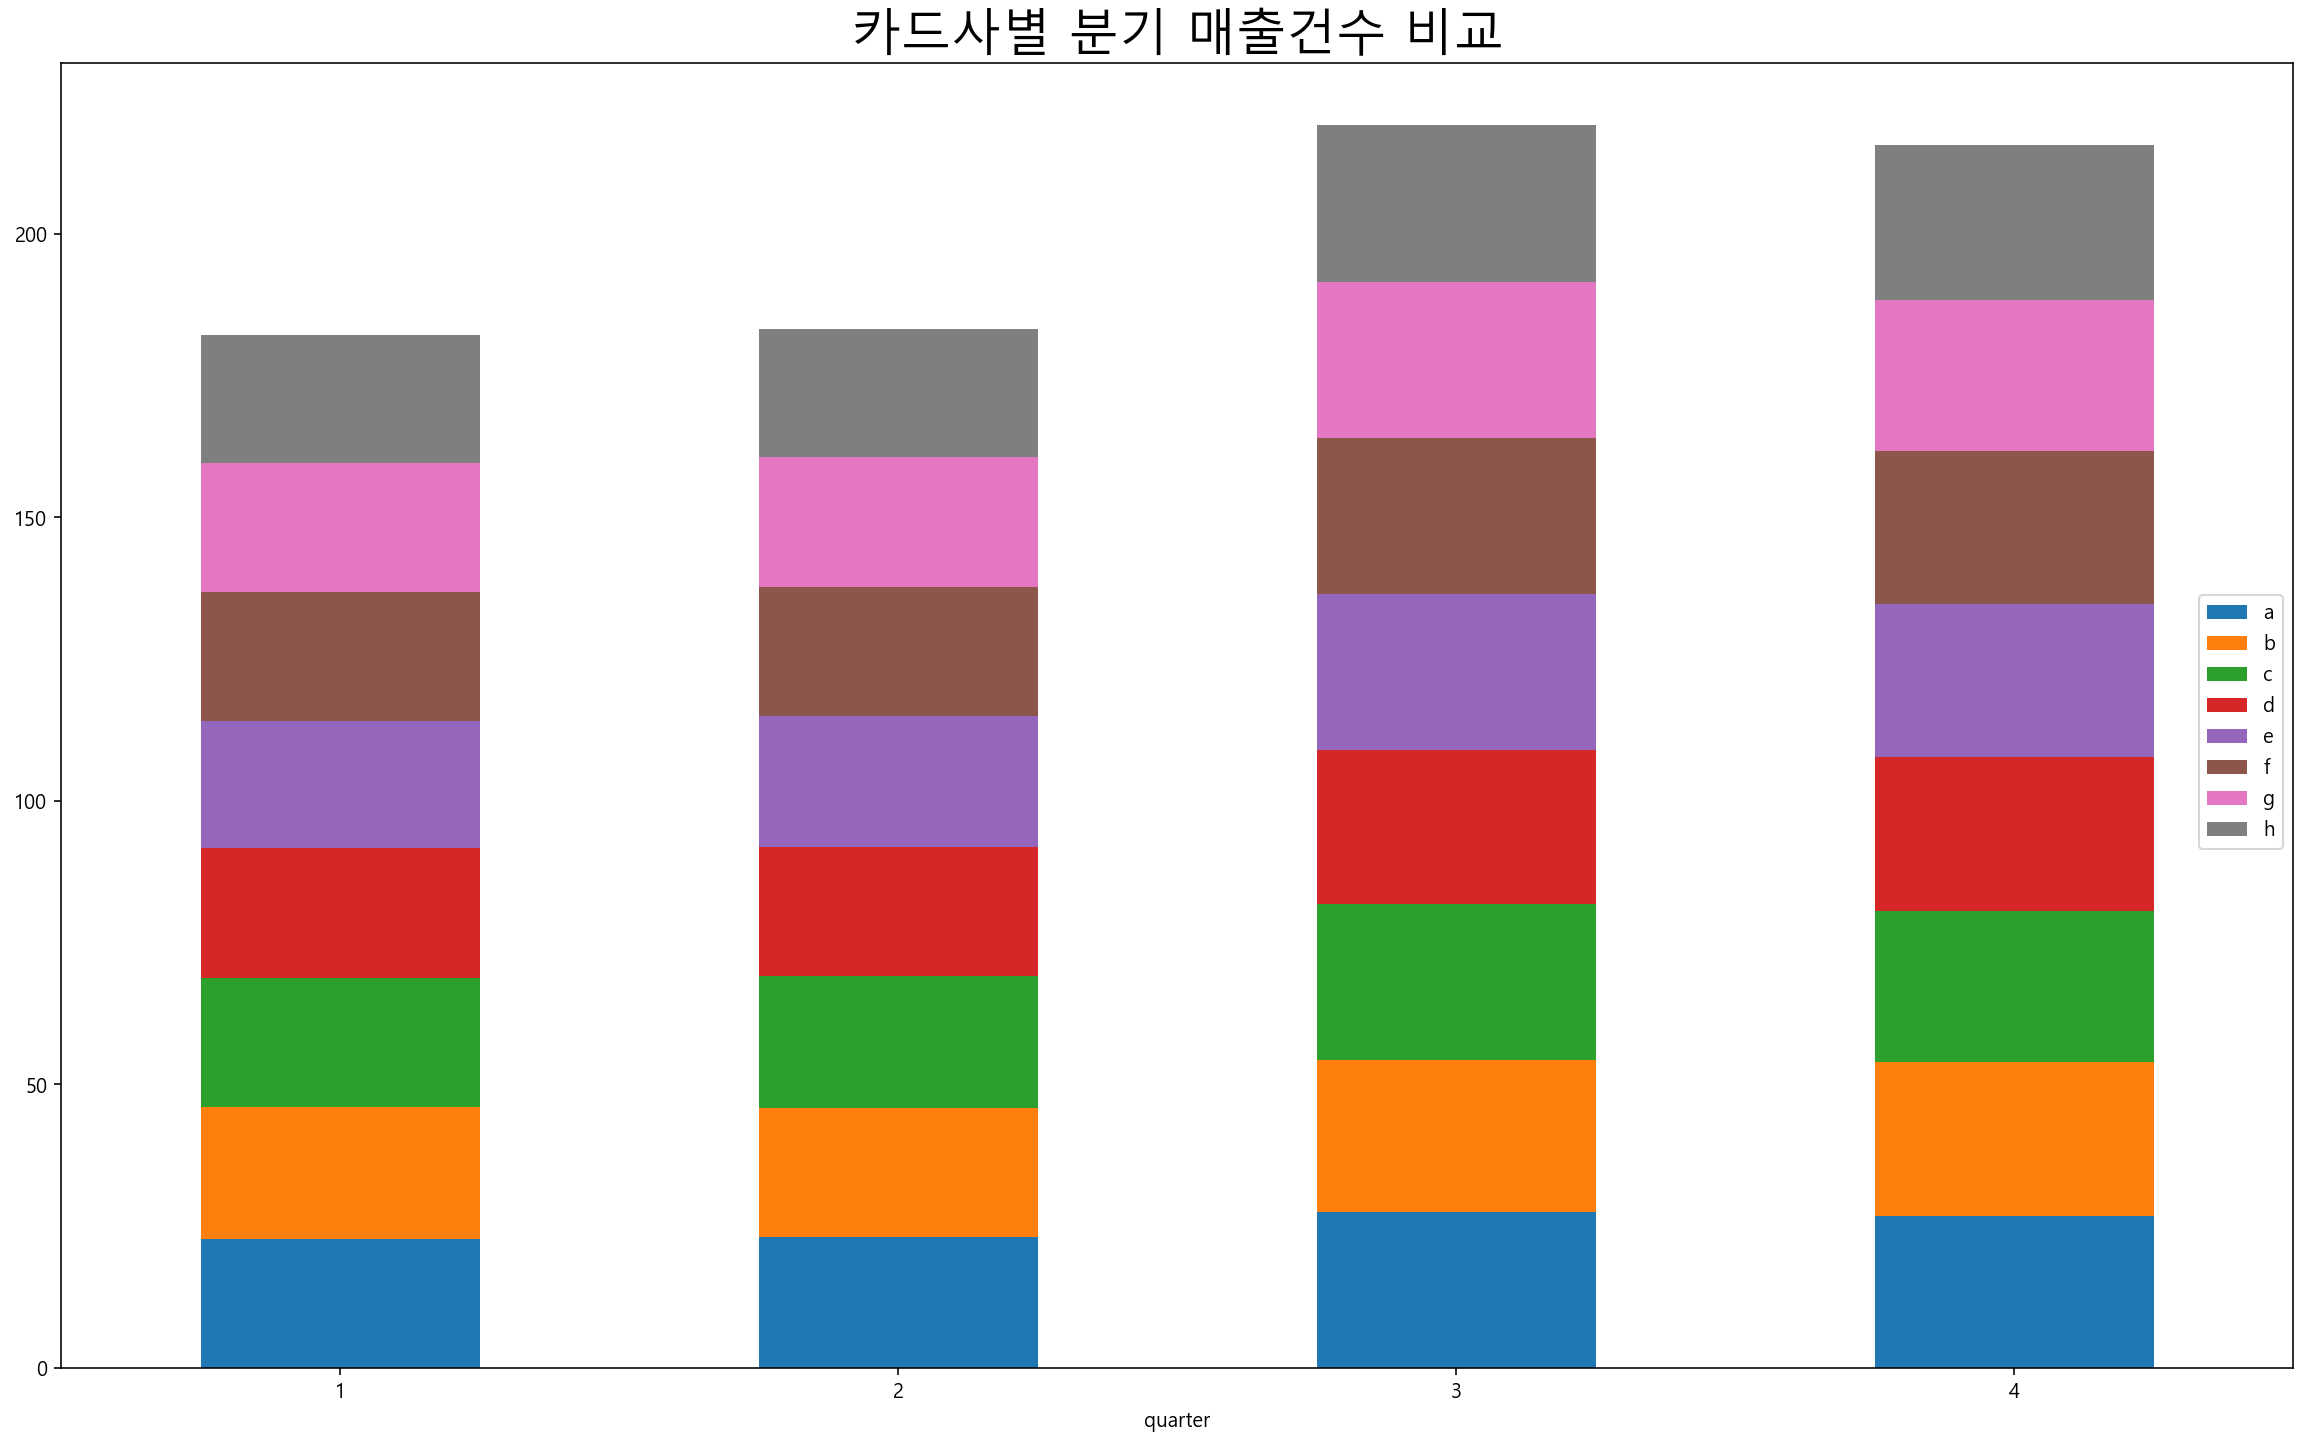

In [27]:
df_ratio_q = df_ratio_qq.apply(lambda x: x*100/sum(x), axis=1)
df_ratio_q_rv = df_ratio_q.T
df_ratio_q_rv.plot(kind="bar", stacked=True, figsize=(20,12), rot=0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('카드사별 분기 매출건수 비교',fontsize=25)

* 카드사별 분기 매출의 경우 비율이 비슷하다.
* 카드사별로 따로 분리하여 분기와 결합한 데이터분석 필요

## 카드사별 공휴일/평일 매출건수 비교

In [28]:
df_ratio_off = pd.crosstab(df["card_company"], df["holidays_x"])
df_ratio_off

holidays_x,0,1
card_company,,
a,445354,198860
b,258073,120822
c,242601,114039
d,199839,95035
e,137462,63389
f,131175,62125
g,99298,45696
h,73174,31176


In [29]:
df_ratio_holi = df_ratio_off.apply(lambda x:x*100/sum(x),axis = 1).round()
df_ratio_holi

holidays_x,0,1
card_company,,
a,69.0,31.0
b,68.0,32.0
c,68.0,32.0
d,68.0,32.0
e,68.0,32.0
f,68.0,32.0
g,68.0,32.0
h,70.0,30.0


Text(0.5, 1.0, '카드사별 공휴일/평일 매출건수 비교')

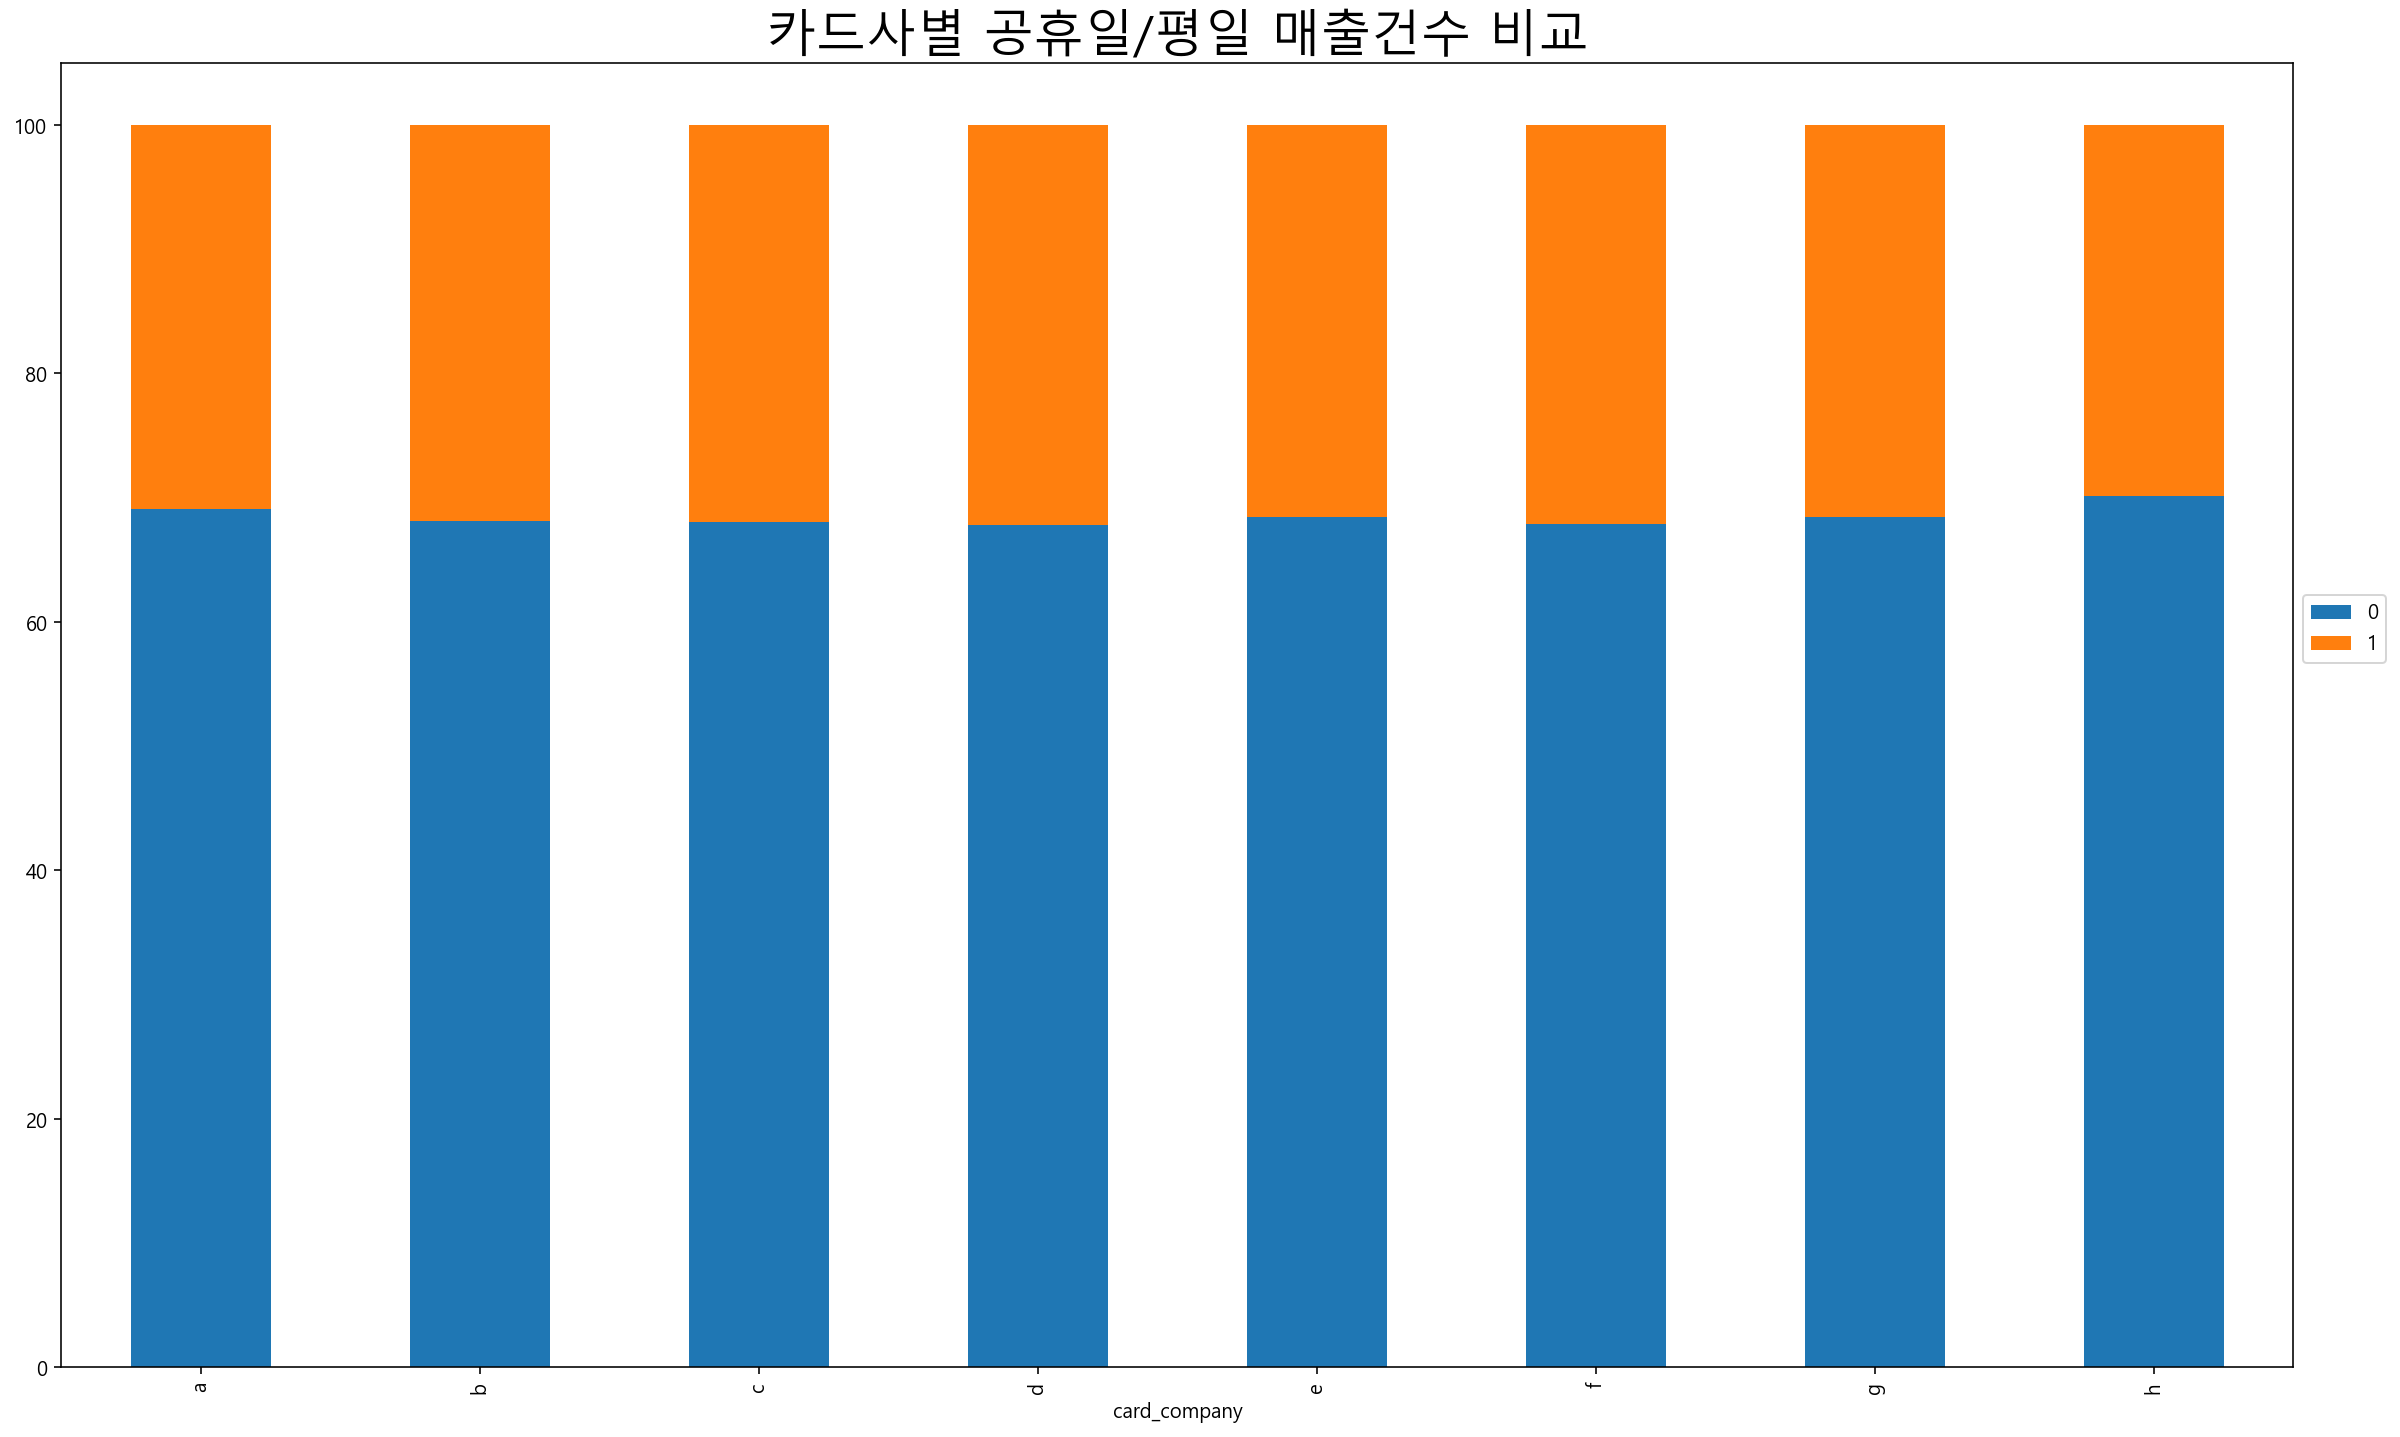

In [30]:
df_ratio_holi = df_ratio_off.apply(lambda x: x*100/sum(x), axis=1)
df_ratio_holi.plot(kind="bar", stacked=True, figsize=(20,12))
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('카드사별 공휴일/평일 매출건수 비교',fontsize=25)

* 일수가 확연하게 차이나므로 비교한 결과가 무의미함

## 할부 매출 분석

In [31]:
cnt_srs0 = df.groupby('date')['store_id'].size()

In [35]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [36]:
def scatter_plot(cnt_srs0, color, showlegend1 = False, name1 = ""):
    trace = go.Scatter(
        x= cnt_srs0.index[::-1],
        y= cnt_srs0.values[::-1],
        name = name1,
        showlegend = showlegend1,
        marker = dict(
        color = color,
        ),
    )
    return trace

df0 = df[df['amount']>0]
train1 = df0[df0['installment_term']==1]
train2 = df0[df0['installment_term']!=1]



cnt_srs1= train1.groupby('hour')['amount'].mean()
cnt_srs2= train2.groupby('hour')['amount'].mean()


trace1 = scatter_plot(cnt_srs1, 'red', True, 'no installment')
trace2 = scatter_plot(cnt_srs2, 'blue', True, 'no installment')

layout = go.Layout(
    height = 500,
    width = 1000,
    #paper_bgcolor='rgb(233,233,233)',
    #title='sum installments in train set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="AcrivationDate")

In [37]:
train1 = df0[df0['holidays_x']==0]
train2 = df0[df0['holidays_x']==1]

cnt_srs1 = train1.groupby('hour')['installment_term'].mean()
cnt_srs2 = train2.groupby('hour')['installment_term'].mean()

trace1 = scatter_plot(cnt_srs1, 'red', True ,'weekday')
trace2 = scatter_plot(cnt_srs2, 'blue', True ,'weekend')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    #title='sum installments in train set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

- 새벽시간을 제외하고 평일에 주말의 할부거래를 상회하는 것을 알 수 있다.

# a 카드사 분석

* 데이터 그룹화

In [38]:
df_a = df[df['card_company'] == 'a']
df_a

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date,...,quarter,season,sido,city,비고,cate_l,biz,cate_m,cate_s,sales
1,17,48135,a,2016-06-01,14:35,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 14:35:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
2,17,48136,a,2016-06-01,15:07,0,대구 수성구,간이 음식 포장 판매 전문점,1800,2016-06-01 15:07:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
4,17,48138,a,2016-06-01,20:56,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 20:56:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
14,35,90992,a,2016-06-01,20:42,0,서울 마포구,의복 소매업,5000,2016-06-01 20:42:00,...,2,summer,서울,마포구,,도매 및 소매업(45~47),소매업; 자동차 제외,"섬유, 의복, 신발 및 가죽제품 소매업",의복 소매업,1
15,35,90993,a,2016-06-01,20:51,0,서울 마포구,의복 소매업,4000,2016-06-01 20:51:00,...,2,summer,서울,마포구,,도매 및 소매업(45~47),소매업; 자동차 제외,"섬유, 의복, 신발 및 가죽제품 소매업",의복 소매업,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318094,2126,4642292,a,2017-10-04,17:24,0,인천 중구,간이 음식 포장 판매 전문점,1000,2017-10-04 17:24:00,...,4,fall,인천,중구,추석,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
2318096,2136,1975376,a,2017-10-04,00:16,0,제주 제주시,기타 주점업,4428,2017-10-04 00:16:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1
2318097,2136,4659978,a,2017-10-04,00:27,0,제주 제주시,기타 주점업,7428,2017-10-04 00:27:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1
2318098,2136,4659979,a,2017-10-04,00:43,0,제주 제주시,기타 주점업,7000,2017-10-04 00:43:00,...,4,fall,제주,제주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,주점 및 비알코올 음료점업,주점업,1


### 일자별 거래 횟수

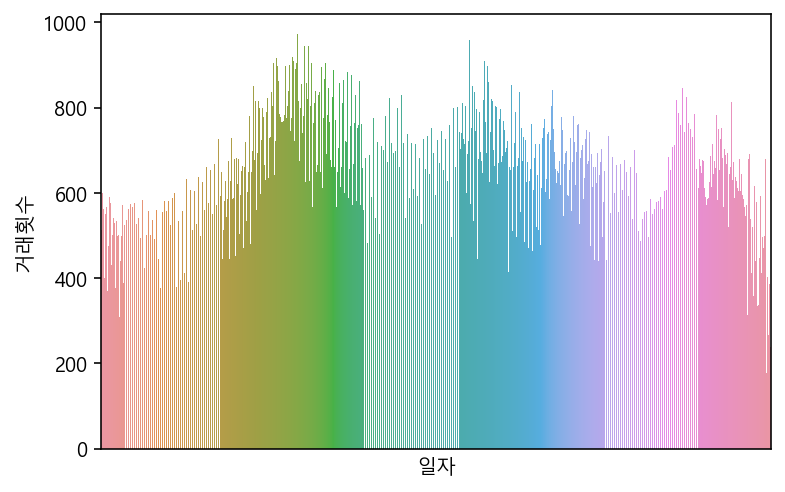

In [39]:
# b사의 일자별 거래횟수

# 그래프 출력
a1 = sns.countplot(df_a['transacted_date']).set(xticks =[],
                                          xlabel='일자',
                                          ylabel='거래횟수')

### 시간대별 평균 거래 금액

In [40]:
## b의 시간대별 평균 거래 금액

# 데이터 만들기
a1_h = pd.DataFrame(df_a.groupby(['hour']).amount.sum()).reset_index()

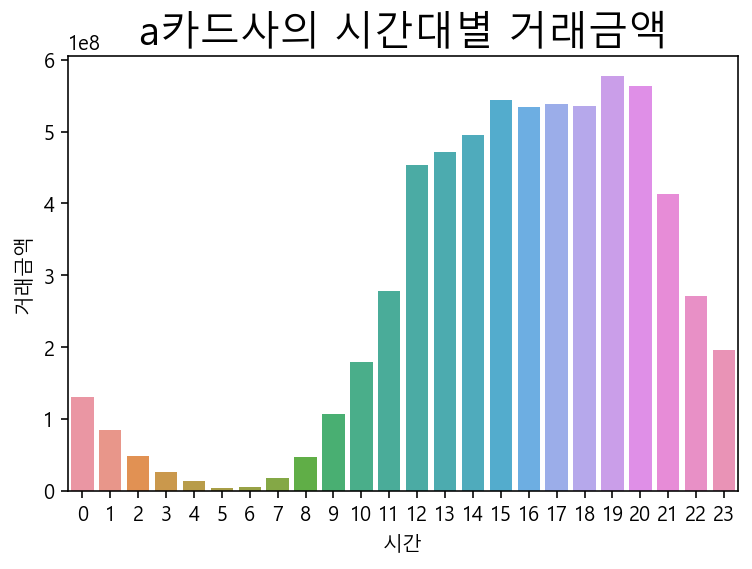

In [41]:
sns.barplot(x="hour", y="amount", data = a1_h).set(xlabel='시간',
                                                  ylabel='거래금액')
plt.title("a카드사의 시간대별 거래금액", fontsize = 20)
plt.show()

 * 11시 ~ 20시 사이에 매출이 가장 두드러짐

### 시간대별 업종 분석

* 위의 결과 10시 이후의 거래 중 업종을 분석한다.

In [42]:
a_h_11 = df_a[df_a['hour']>10]
a_h_11

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,date,...,quarter,season,sido,city,비고,cate_l,biz,cate_m,cate_s,sales
1,17,48135,a,2016-06-01,14:35,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 14:35:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
2,17,48136,a,2016-06-01,15:07,0,대구 수성구,간이 음식 포장 판매 전문점,1800,2016-06-01 15:07:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
4,17,48138,a,2016-06-01,20:56,0,대구 수성구,간이 음식 포장 판매 전문점,1085,2016-06-01 20:56:00,...,2,summer,대구,수성구,,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1
14,35,90992,a,2016-06-01,20:42,0,서울 마포구,의복 소매업,5000,2016-06-01 20:42:00,...,2,summer,서울,마포구,,도매 및 소매업(45~47),소매업; 자동차 제외,"섬유, 의복, 신발 및 가죽제품 소매업",의복 소매업,1
15,35,90993,a,2016-06-01,20:51,0,서울 마포구,의복 소매업,4000,2016-06-01 20:51:00,...,2,summer,서울,마포구,,도매 및 소매업(45~47),소매업; 자동차 제외,"섬유, 의복, 신발 및 가죽제품 소매업",의복 소매업,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318080,2125,2354377,a,2017-10-04,20:25,0,충북 충주시,한식 음식점업,7571,2017-10-04 20:25:00,...,4,fall,충북,충주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,한식 음식점업,1
2318082,2125,1773626,a,2017-10-04,20:54,0,충북 충주시,한식 음식점업,10571,2017-10-04 20:54:00,...,4,fall,충북,충주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,한식 음식점업,1
2318083,2125,1438801,a,2017-10-04,20:59,0,충북 충주시,한식 음식점업,11571,2017-10-04 20:59:00,...,4,fall,충북,충주시,추석,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,한식 음식점업,1
2318094,2126,4642292,a,2017-10-04,17:24,0,인천 중구,간이 음식 포장 판매 전문점,1000,2017-10-04 17:24:00,...,4,fall,인천,중구,추석,숙박 및 음식점업(55~56),음식점 및 주점업,음식점업,기타 간이 음식점업,1


In [43]:
ah_11 = a_h_11.groupby(["hour","cate_l"])["amount"].sum().reset_index()
ah_11.sort_values('amount', ascending = False).T

,102,46,57,111,93,35,68,24,119,79,...,92,66,77,110,84,122,100,88,118,114
hour,20,15,16,21,19,14,17,13,22,18,...,19,17,18,21,18,22,20,19,22,21
cate_l,숙박 및 음식점업(55~56),도매 및 소매업(45~47),도매 및 소매업(45~47),숙박 및 음식점업(55~56),숙박 및 음식점업(55~56),도매 및 소매업(45~47),도매 및 소매업(45~47),도매 및 소매업(45~47),숙박 및 음식점업(55~56),도매 및 소매업(45~47),...,"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",건설업(41~42),건설업(41~42),"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",운수 및 창고업(49~52),제조업(10~34),보건업 및 사회복지 서비스업(86~87),건설업(41~42),"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",제조업(10~34)
amount,361806572,317403063,308668370,291578747,272754043,272262033,270628479,229008638,209399064,203622213,...,240687,192281,184284,154739,103140,45026,44728,22857,17063,13396


In [44]:
 ah_11[ah_11["hour"]== 23].sort_values('amount', ascending = False)

,hour,cate_l,amount
127,23,숙박 및 음식점업(55~56),156684947
125,23,도매 및 소매업(45~47),15949224
128,23,"예술, 스포츠 및 여가관련 서비스업(90~91)",15079317
124,23,교육 서비스업(85),5598966
130,23,"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",2197663
129,23,"전문, 과학 및 기술 서비스업(70~73)",437852
126,23,"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",255619


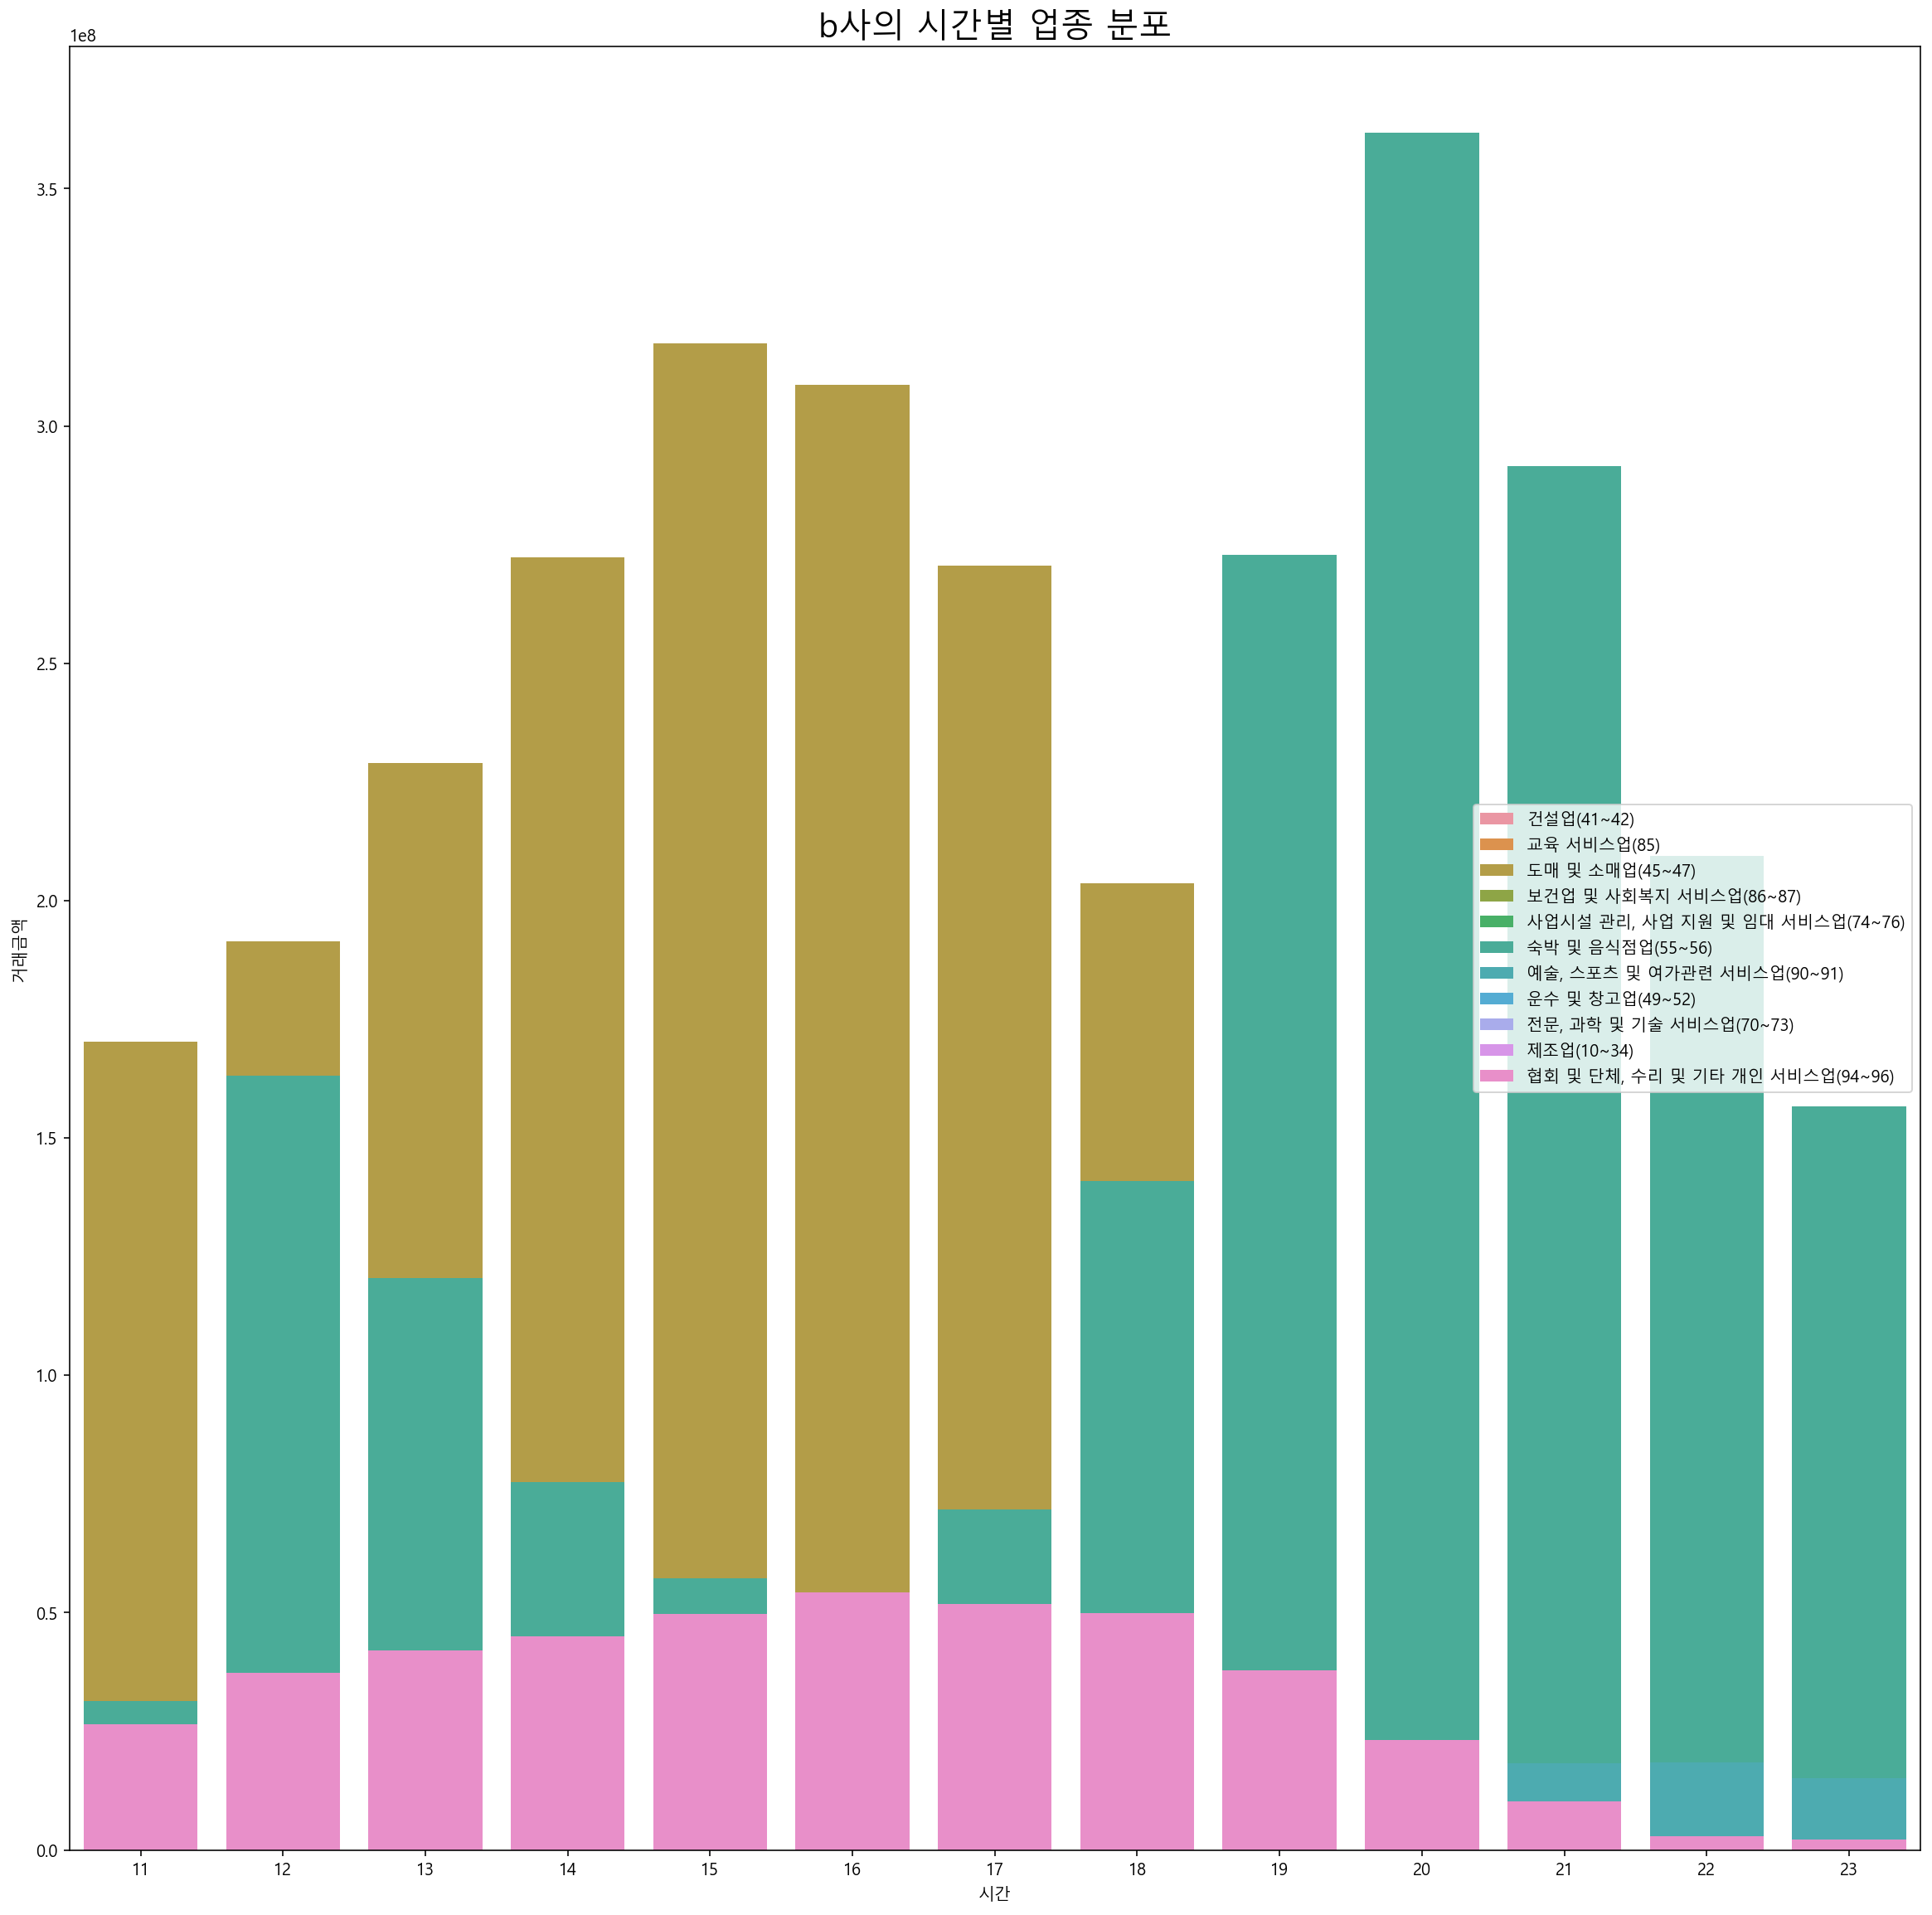

In [45]:
plt.figure(figsize = (20,20))
sns.barplot(x="hour", y="amount", hue = "cate_l", data = ah_11 , dodge = False, ci = 95).set(xlabel='시간',
                                                  ylabel='거래금액')
plt.title("b사의 시간별 업종 분포", fontsize = 20)
plt.legend(loc = 'right')
plt.show()

 * 10시 이후 매출에 따른 주요 업종을 살펴 보면 다음과 같다.
    주요 업종: 도매 및 소매업, 숙박 및 음식점, 교육 서비스, 협회 및 단체 수리 및 기타, 예술 스포트 여가관련 서비스
 
 ```
 
 11-13시 : 도매 및 소매업/ 숙박 및 음식점업/협회 및 단체, 수리 및 기타서비스업

 14시 : 도매 및 소매/숙박 및 음식점 업/ 교육 서비스업
 15시 : 도매 및 소매/ 교육 서비스업 / 숙박 및 음식점 업
 16시 : 도매 및 소매업/ 교육 서비스업 /협회 및 단체, 수리 및 기타서비스업
 17-21시:  도매 및 소매업 / 교육 서비스/ 숙박 및 음식점
 22시- : 숙박 및 음식점/ 도매 및 소매/ 예술 스포츠 및 여가 서비스 업
 ```

### 계절별 분석 

#### 중분류

In [46]:
a_bizl=pd.crosstab(df_a["season"], df_a["cate_l"])
a_bizl

cate_l,건설업(41~42),교육 서비스업(85),도매 및 소매업(45~47),보건업 및 사회복지 서비스업(86~87),"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",숙박 및 음식점업(55~56),"예술, 스포츠 및 여가관련 서비스업(90~91)",운수 및 창고업(49~52),"전문, 과학 및 기술 서비스업(70~73)",제조업(10~34),"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)"
season,,,,,,,,,,,
fall,66,5731,41461,322,348,97159,6516,899,500,1030,17279
spring,62,4261,32149,212,267,74482,5219,725,423,464,12985
summer,137,6087,42579,383,562,102575,6810,773,723,696,17962
winter,33,5822,36035,292,964,93325,6468,1152,598,916,16762


In [47]:
a_bizl_ratio = a_bizl.apply(lambda x: x*100/sum(x), axis=1)
a_bizl_ratio_rv = a_bizl_ratio.T
a_bizl_ratio_rv

season,fall,spring,summer,winter
cate_l,,,,
건설업(41~42),0.038526,0.047238,0.076414,0.020324
교육 서비스업(85),3.345378,3.246501,3.395115,3.585704
도매 및 소매업(45~47),24.202182,24.494663,23.749073,22.193549
보건업 및 사회복지 서비스업(86~87),0.187962,0.161525,0.213624,0.179839
"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",0.203139,0.203430,0.313464,0.593717
숙박 및 음식점업(55~56),56.714980,56.748623,57.212737,57.477813
"예술, 스포츠 및 여가관련 서비스업(90~91)",3.803609,3.976411,3.798379,3.983568
운수 및 창고업(49~52),0.524777,0.552385,0.431152,0.709504
"전문, 과학 및 기술 서비스업(70~73)",0.291867,0.322288,0.403264,0.368301


Text(0.5, 1.0, 'a카드사 분기 매출 비율')

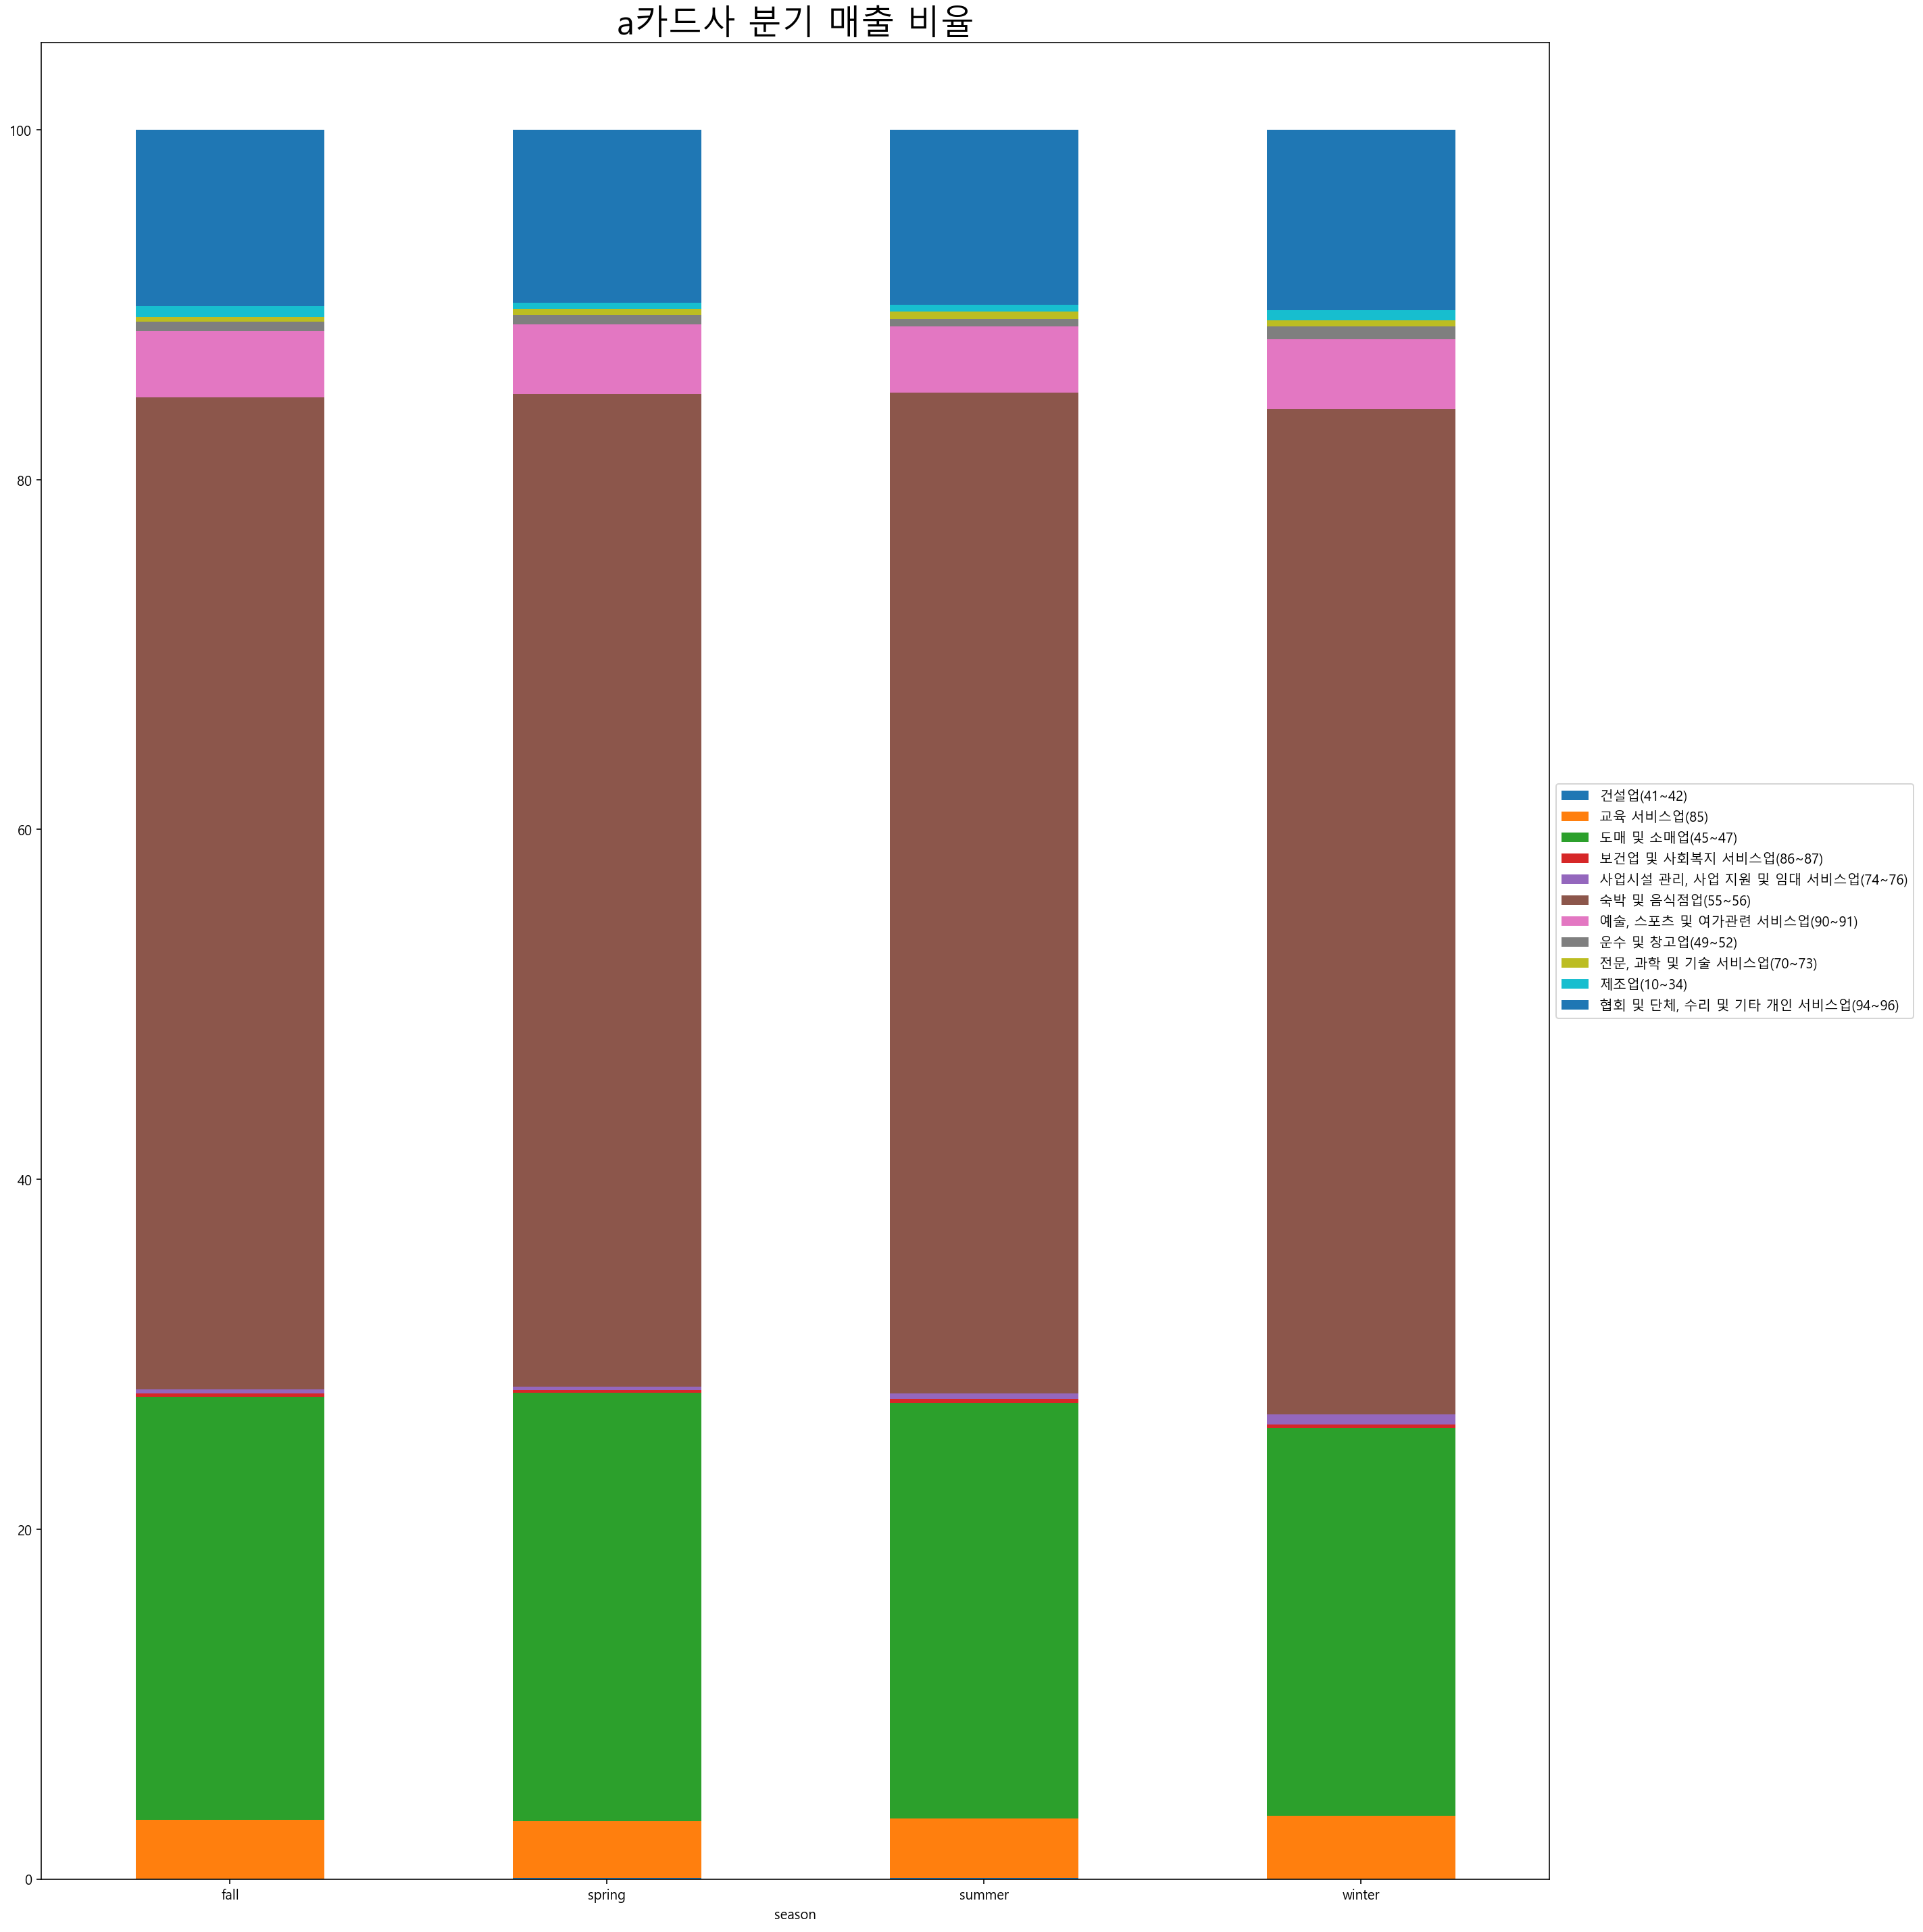

In [48]:
a_bizl_ratio.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('a카드사 분기 매출 비율',fontsize=25)

계절별 높은 매출의 업종은 다음과 같다.
- 숙박 및 음식점업/ 도매 및 소매업/ 협회 및 단체, 수리 및 기타 개인 서비스업

#### 소분류

In [49]:
a_ss_biz_ratio=pd.crosstab(df_a["season"], df_a["biz"])
a_ss_biz_ratio

biz,개인 및 소비용품 수리업,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",교육 서비스업,기타 개인 서비스업,"기타 전문, 과학 및 기술 서비스업",기타 제품 제조업,도매 및 상품 중개업,보건업,사업 지원 서비스업,섬유제품 제조업; 의복 제외,...,육상 운송 및 파이프라인 운송업,음식점 및 주점업,"의료, 정밀, 광학 기기 및 시계 제조업",인쇄 및 기록매체 복제업,임대업; 부동산 제외,자동차 및 부품 판매업,전기장비 제조업,전문 서비스업,전문직별 공사업,"창작, 예술 및 여가관련 서비스업"
season,,,,,,,,,,,,,,,,,,,,,
fall,2131,14,5731,15148,354,121,5561,322,321,103,...,899,95882,94,64,27,1580,46,78,66,1181
spring,1558,17,4261,11427,328,64,3985,212,249,197,...,725,73610,82,107,18,1110,0,42,62,461
summer,2299,185,6087,15663,359,95,6059,383,351,160,...,773,101016,102,142,211,1393,4,119,137,812
winter,1966,0,5822,14796,456,115,4634,292,315,115,...,1152,92222,76,36,649,1570,53,79,33,641


In [50]:
a_ssbiz_stacked = a_ss_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
a_ssbiz_stacked_rv = a_ssbiz_stacked.T
a_ssbiz_stacked_rv

season,fall,spring,summer,winter
biz,,,,
개인 및 소비용품 수리업,1.243936,1.187057,1.282302,1.210837
"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",0.008172,0.012952,0.103187,0.000000
교육 서비스업,3.345378,3.246501,3.395115,3.585704
기타 개인 서비스업,8.842398,8.706352,8.736272,9.112689
"기타 전문, 과학 및 기술 서비스업",0.206642,0.249907,0.200238,0.280845
기타 제품 제조업,0.070632,0.048762,0.052988,0.070827
도매 및 상품 중개업,3.246143,3.036214,3.379498,2.854028
보건업,0.187962,0.161525,0.213624,0.179839
사업 지원 서비스업,0.187379,0.189716,0.195775,0.194005


Text(0.5, 1.0, 'a카드사 시즌 매출 비율')

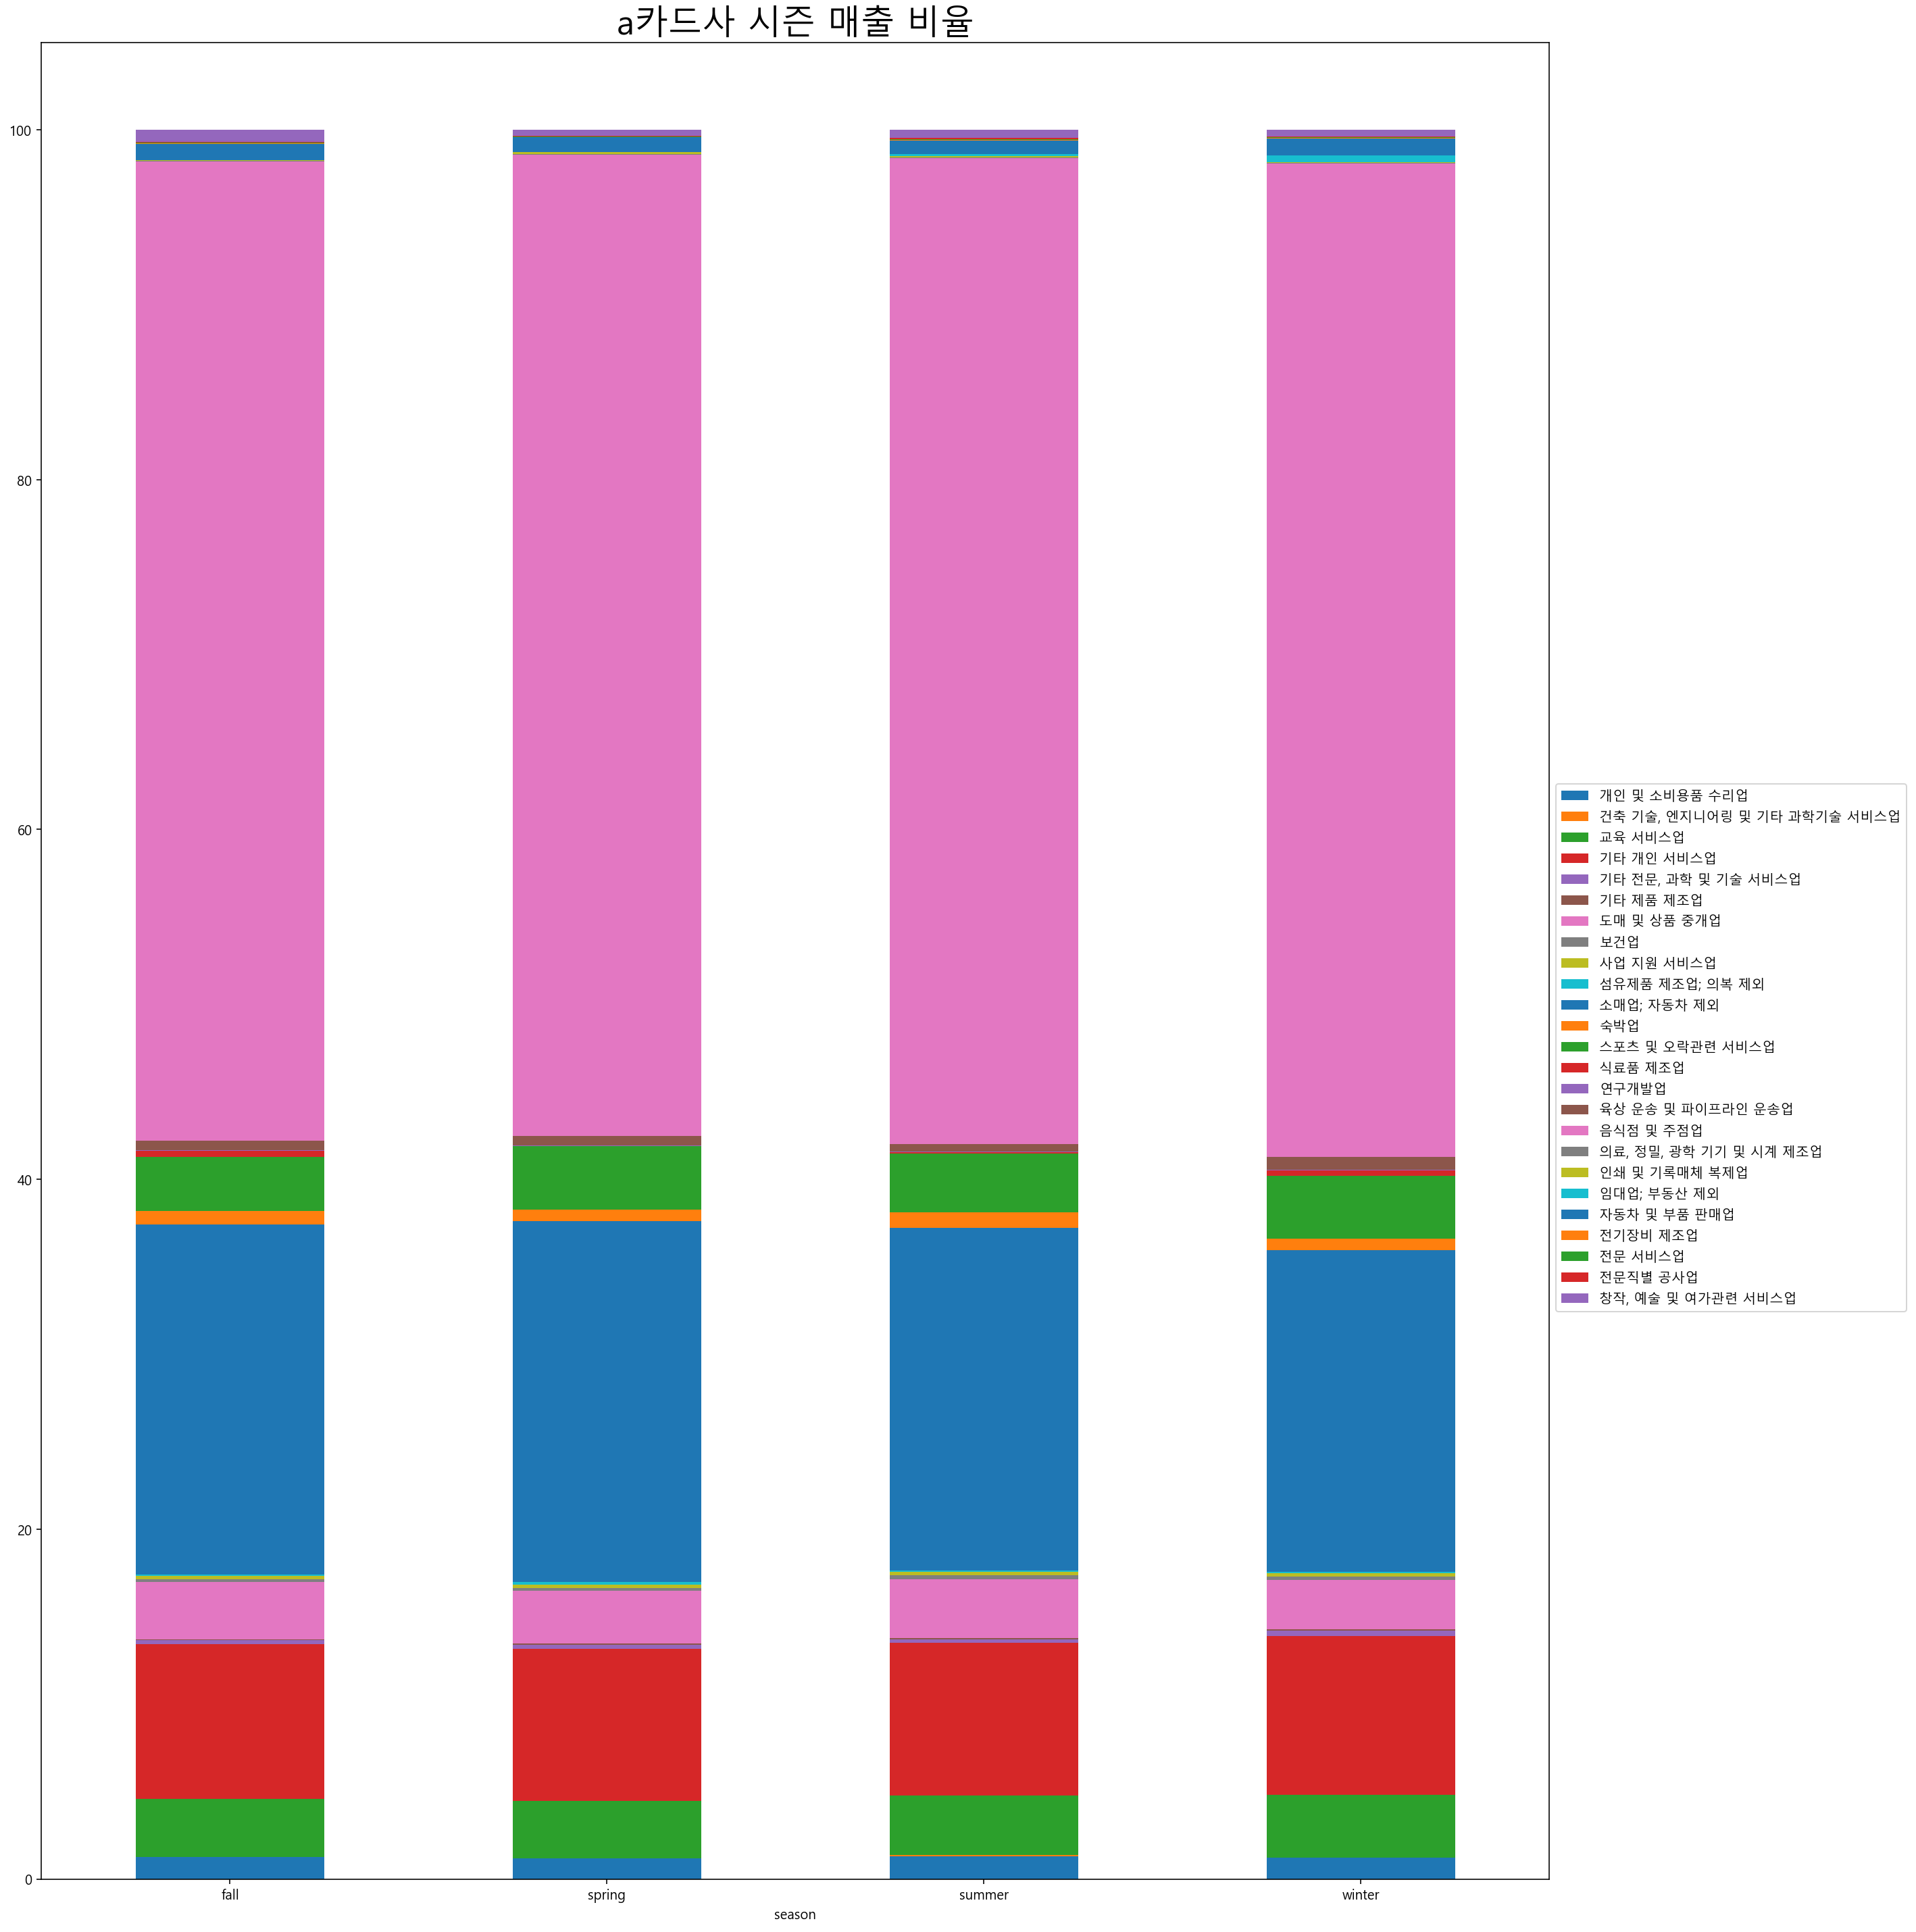

In [51]:
a_ssbiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('a카드사 시즌 매출 비율',fontsize=25)

계절별 높은 매출의 업종은 다음과 같다.
- 음식점 및 주점업 / 소매업(자동차 제외)/ 교육서비스업

### 분기별 분석

In [52]:
a_qq_biz_ratio=pd.crosstab(df_a["quarter"], df_a["biz"])
a_qq_biz_ratio

biz,개인 및 소비용품 수리업,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",교육 서비스업,기타 개인 서비스업,"기타 전문, 과학 및 기술 서비스업",기타 제품 제조업,도매 및 상품 중개업,보건업,사업 지원 서비스업,섬유제품 제조업; 의복 제외,...,육상 운송 및 파이프라인 운송업,음식점 및 주점업,"의료, 정밀, 광학 기기 및 시계 제조업",인쇄 및 기록매체 복제업,임대업; 부동산 제외,자동차 및 부품 판매업,전기장비 제조업,전문 서비스업,전문직별 공사업,"창작, 예술 및 여가관련 서비스업"
quarter,,,,,,,,,,,,,,,,,,,,,
1,1750,0,5351,13396,473,90,4251,269,322,199,...,986,82884,79,54,457,1370,42,88,39,523
2,1786,52,4786,12944,300,77,4545,264,279,182,...,746,83438,88,160,29,1142,0,46,92,601
3,2330,164,6077,15413,339,94,6036,377,334,103,...,791,99451,107,108,200,1395,18,137,117,1127
4,2088,0,5687,15281,385,134,5407,299,301,91,...,1026,96957,80,27,219,1746,43,47,50,844


In [53]:
a_qbiz_stacked = a_qq_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
a_qbiz_stacked_rv = a_qbiz_stacked.T
a_qbiz_stacked_rv

quarter,1,2,3,4
biz,,,,
개인 및 소비용품 수리업,1.193643,1.200228,1.317680,1.214144
"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",0.000000,0.034945,0.092747,0.000000
교육 서비스업,3.649819,3.216290,3.436712,3.306914
기타 개인 서비스업,9.137167,8.698632,8.716478,8.885697
"기타 전문, 과학 및 기술 서비스업",0.322625,0.201606,0.191714,0.223872
기타 제품 제조업,0.061387,0.051746,0.053160,0.077919
도매 및 상품 중개업,2.899529,3.054333,3.413525,3.144098
보건업,0.183480,0.177413,0.213204,0.173865
사업 지원 서비스업,0.219630,0.187494,0.188886,0.175027


Text(0.5, 1.0, 'a카드사 분기별  매출 비율')

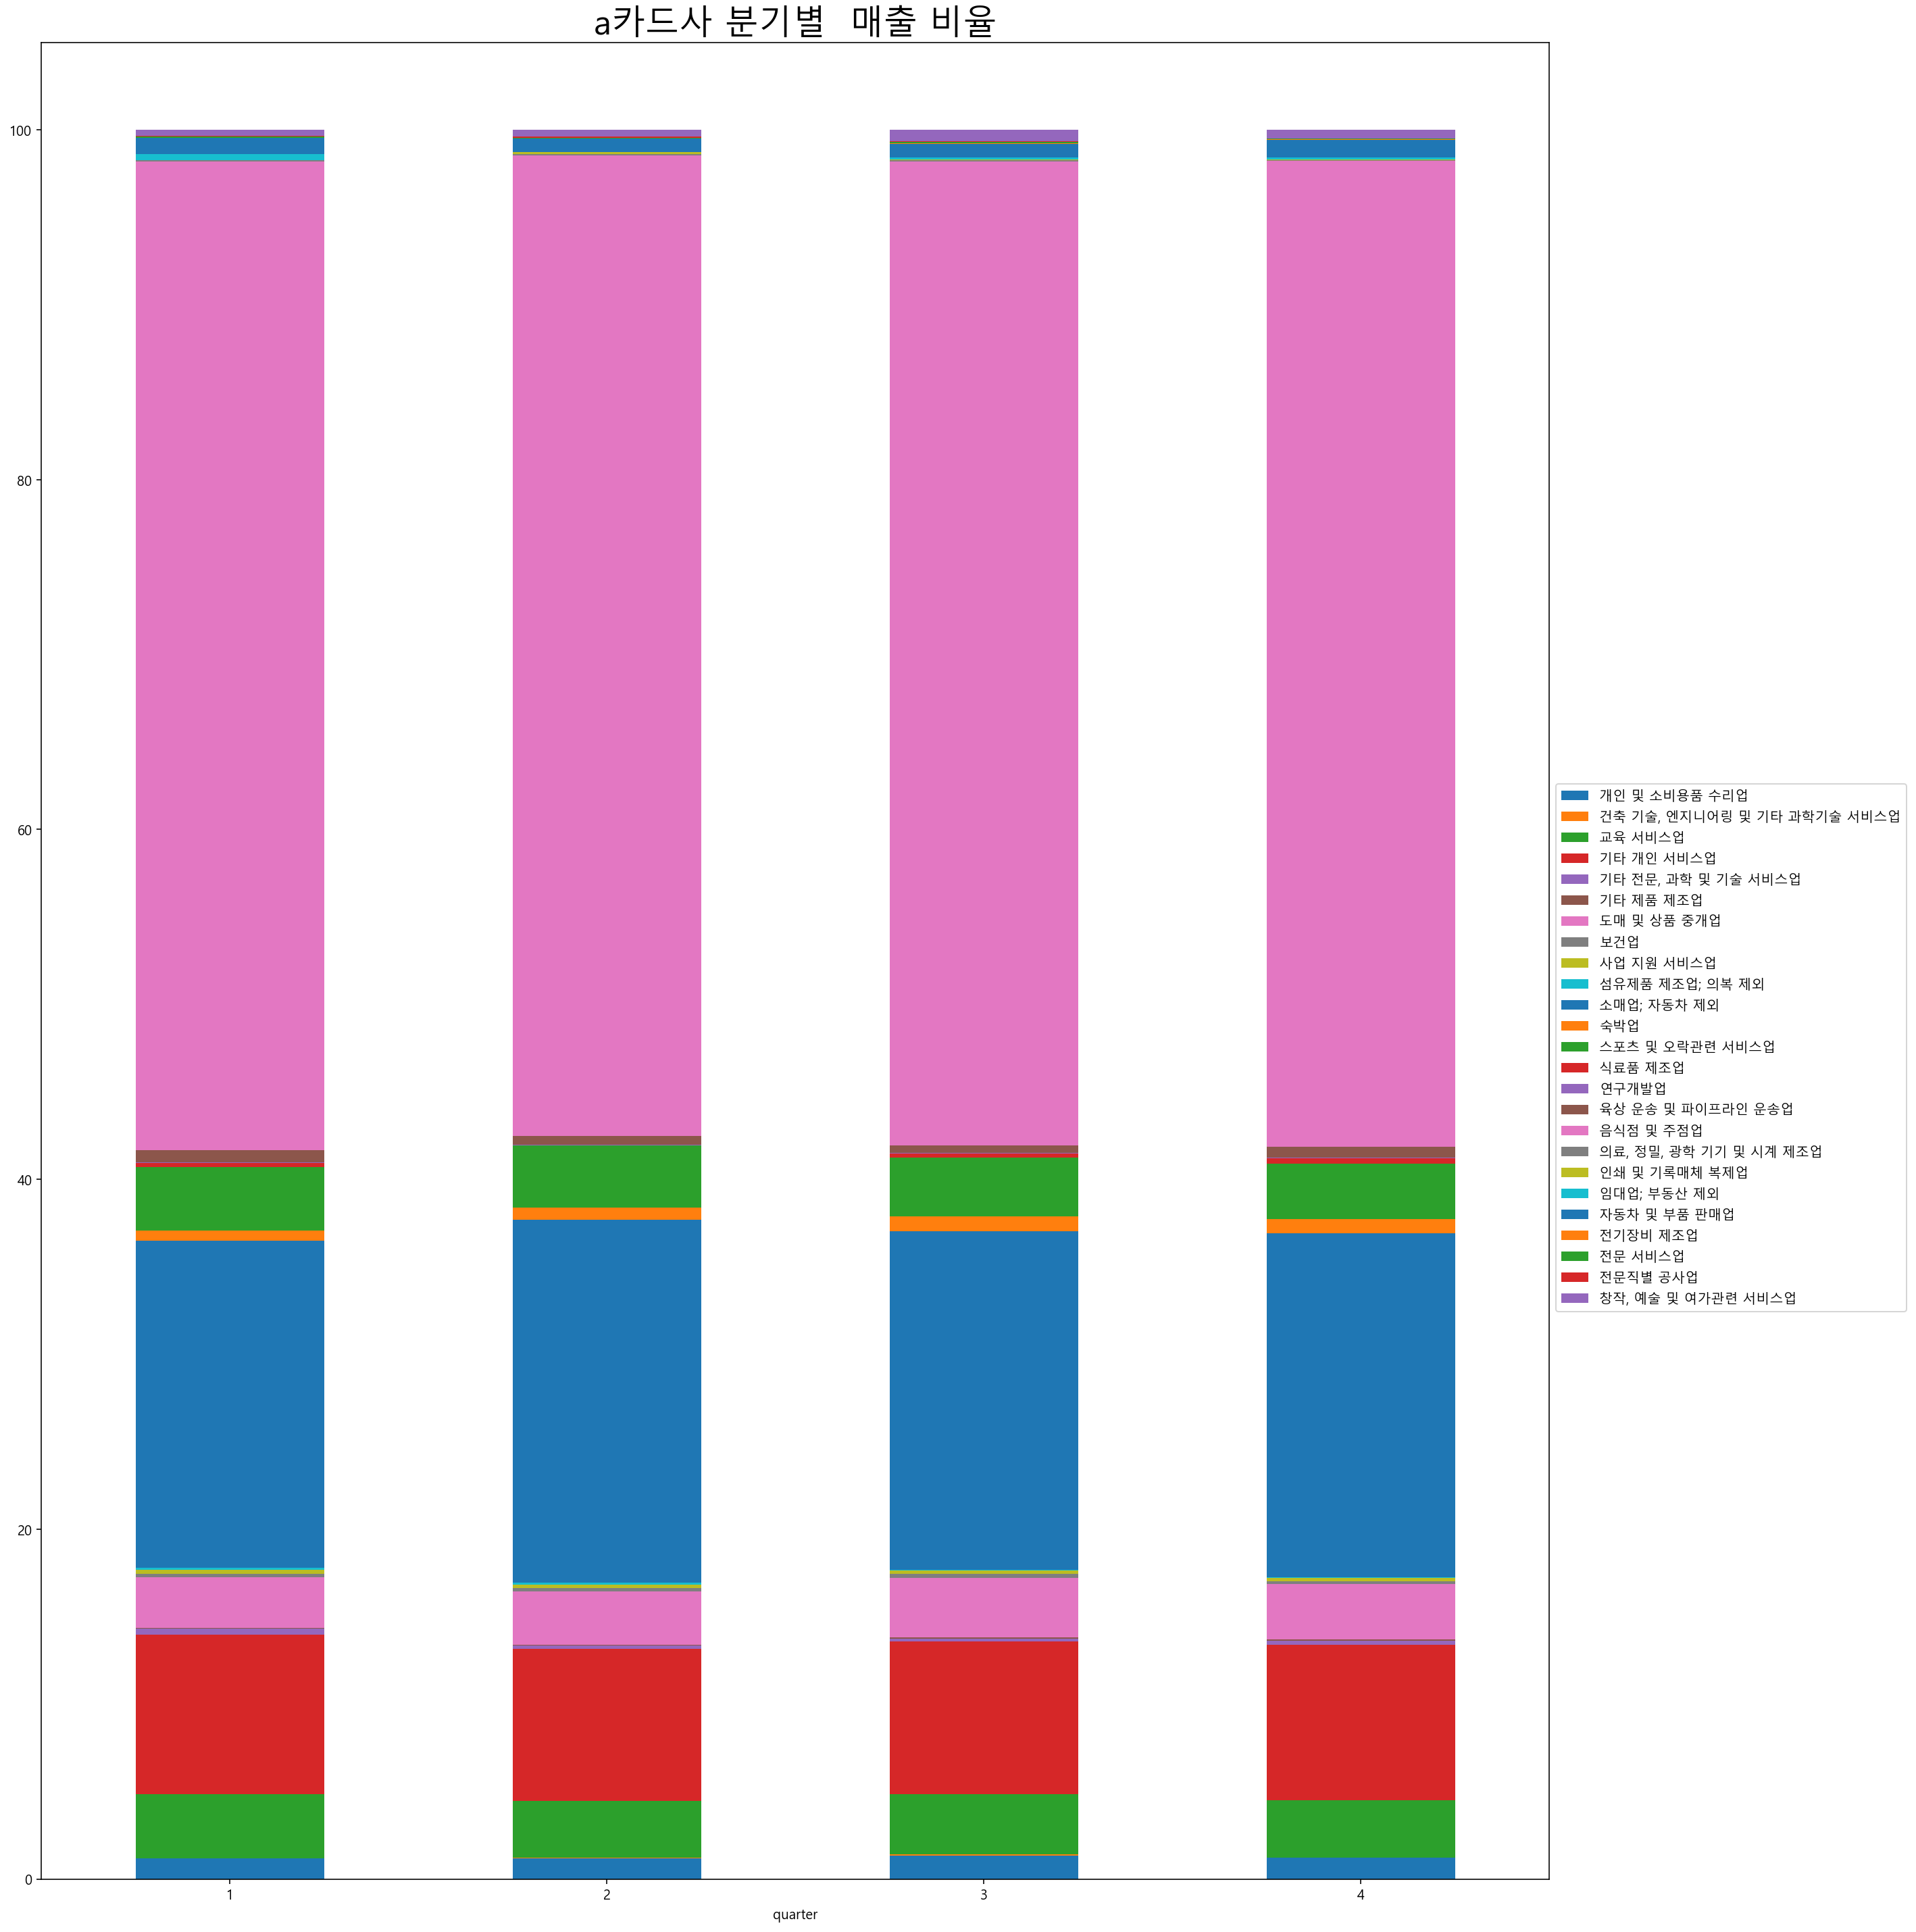

In [54]:
a_qbiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('a카드사 분기별  매출 비율',fontsize=25)

분기별 높은 매출의 업종은 다음과 같다.
- 음식점 및 주점업 / 소매업(자동차제외)/ 기타 개인 서비스업

### 요일별 평균 거래 금액

In [55]:
## a사의 요일별 평균 거래 금액

# 데이터 만들기
a_dw = pd.DataFrame(df_a.groupby(['dayofweek']).amount.sum()).reset_index()

In [56]:
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

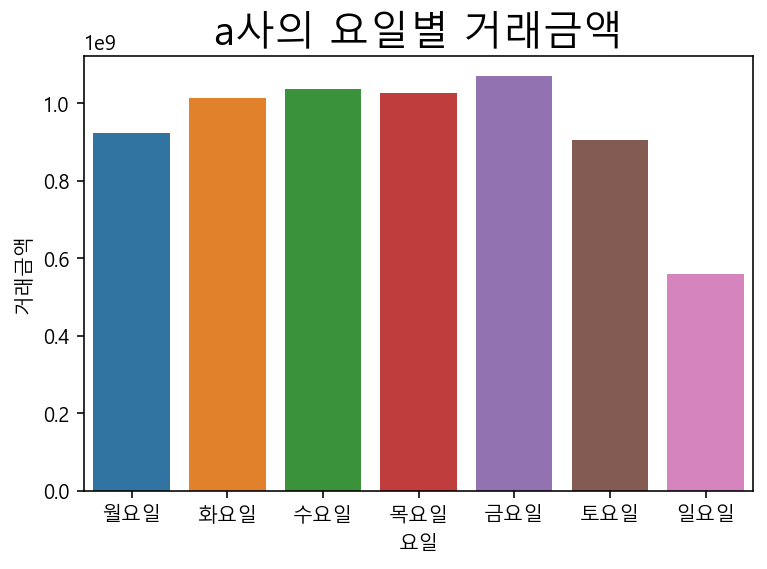

In [58]:
sns.barplot(x=index, y="amount", data = a_dw).set(xlabel='요일',
                                                  ylabel='거래금액')
plt.title("a사의 요일별 거래금액", fontsize = 20)
plt.show()

### 요일별 업종

In [59]:
a_dw_biz_ratio=pd.crosstab(df_a["dayofweek"], df_a["cate_l"])
a_dw_biz_ratio

cate_l,건설업(41~42),교육 서비스업(85),도매 및 소매업(45~47),보건업 및 사회복지 서비스업(86~87),"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",숙박 및 음식점업(55~56),"예술, 스포츠 및 여가관련 서비스업(90~91)",운수 및 창고업(49~52),"전문, 과학 및 기술 서비스업(70~73)",제조업(10~34),"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)"
dayofweek,,,,,,,,,,,
0,42,4452,20265,214,264,46959,3536,551,202,256,8391
1,45,4160,21575,213,126,50925,3541,671,318,349,8261
2,36,3687,22592,199,221,52392,3556,711,351,378,9092
3,27,3625,22891,161,260,53876,3292,717,386,556,9021
4,38,3618,24438,217,268,59611,3540,664,345,558,10127
5,60,1579,25508,169,587,59375,4253,235,367,596,13246
6,50,780,14955,36,415,44403,3295,0,275,413,6850


In [60]:
a_dwbiz_stacked = a_dw_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
a_dw_biz = a_dwbiz_stacked.T
a_dw_biz

dayofweek,0,1,2,3,4,5,6
cate_l,,,,,,,
건설업(41~42),0.049335,0.049898,0.038620,0.028477,0.036742,0.056617,0.069957
교육 서비스업(85),5.229526,4.612792,3.955372,3.823356,3.498221,1.489974,1.091336
도매 및 소매업(45~47),23.804210,23.923312,24.236443,24.143568,23.628945,24.069828,20.924278
보건업 및 사회복지 서비스업(86~87),0.251374,0.236184,0.213485,0.169810,0.209816,0.159472,0.050369
"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",0.310107,0.139714,0.237086,0.274227,0.259127,0.553904,0.580647
숙박 및 음식점업(55~56),55.160222,56.467888,56.205546,56.824031,57.637492,56.027365,62.126427
"예술, 스포츠 및 여가관련 서비스업(90~91)",4.153550,3.926417,3.814837,3.472134,3.422803,4.013211,4.610197
운수 및 창고업(49~52),0.647230,0.744034,0.762753,0.756233,0.642017,0.221750,0.000000
"전문, 과학 및 기술 서비스업(70~73)",0.237279,0.352612,0.376549,0.407121,0.333578,0.346308,0.384766


Text(0.5, 1.0, 'a카드사 요일별  업종 비율')

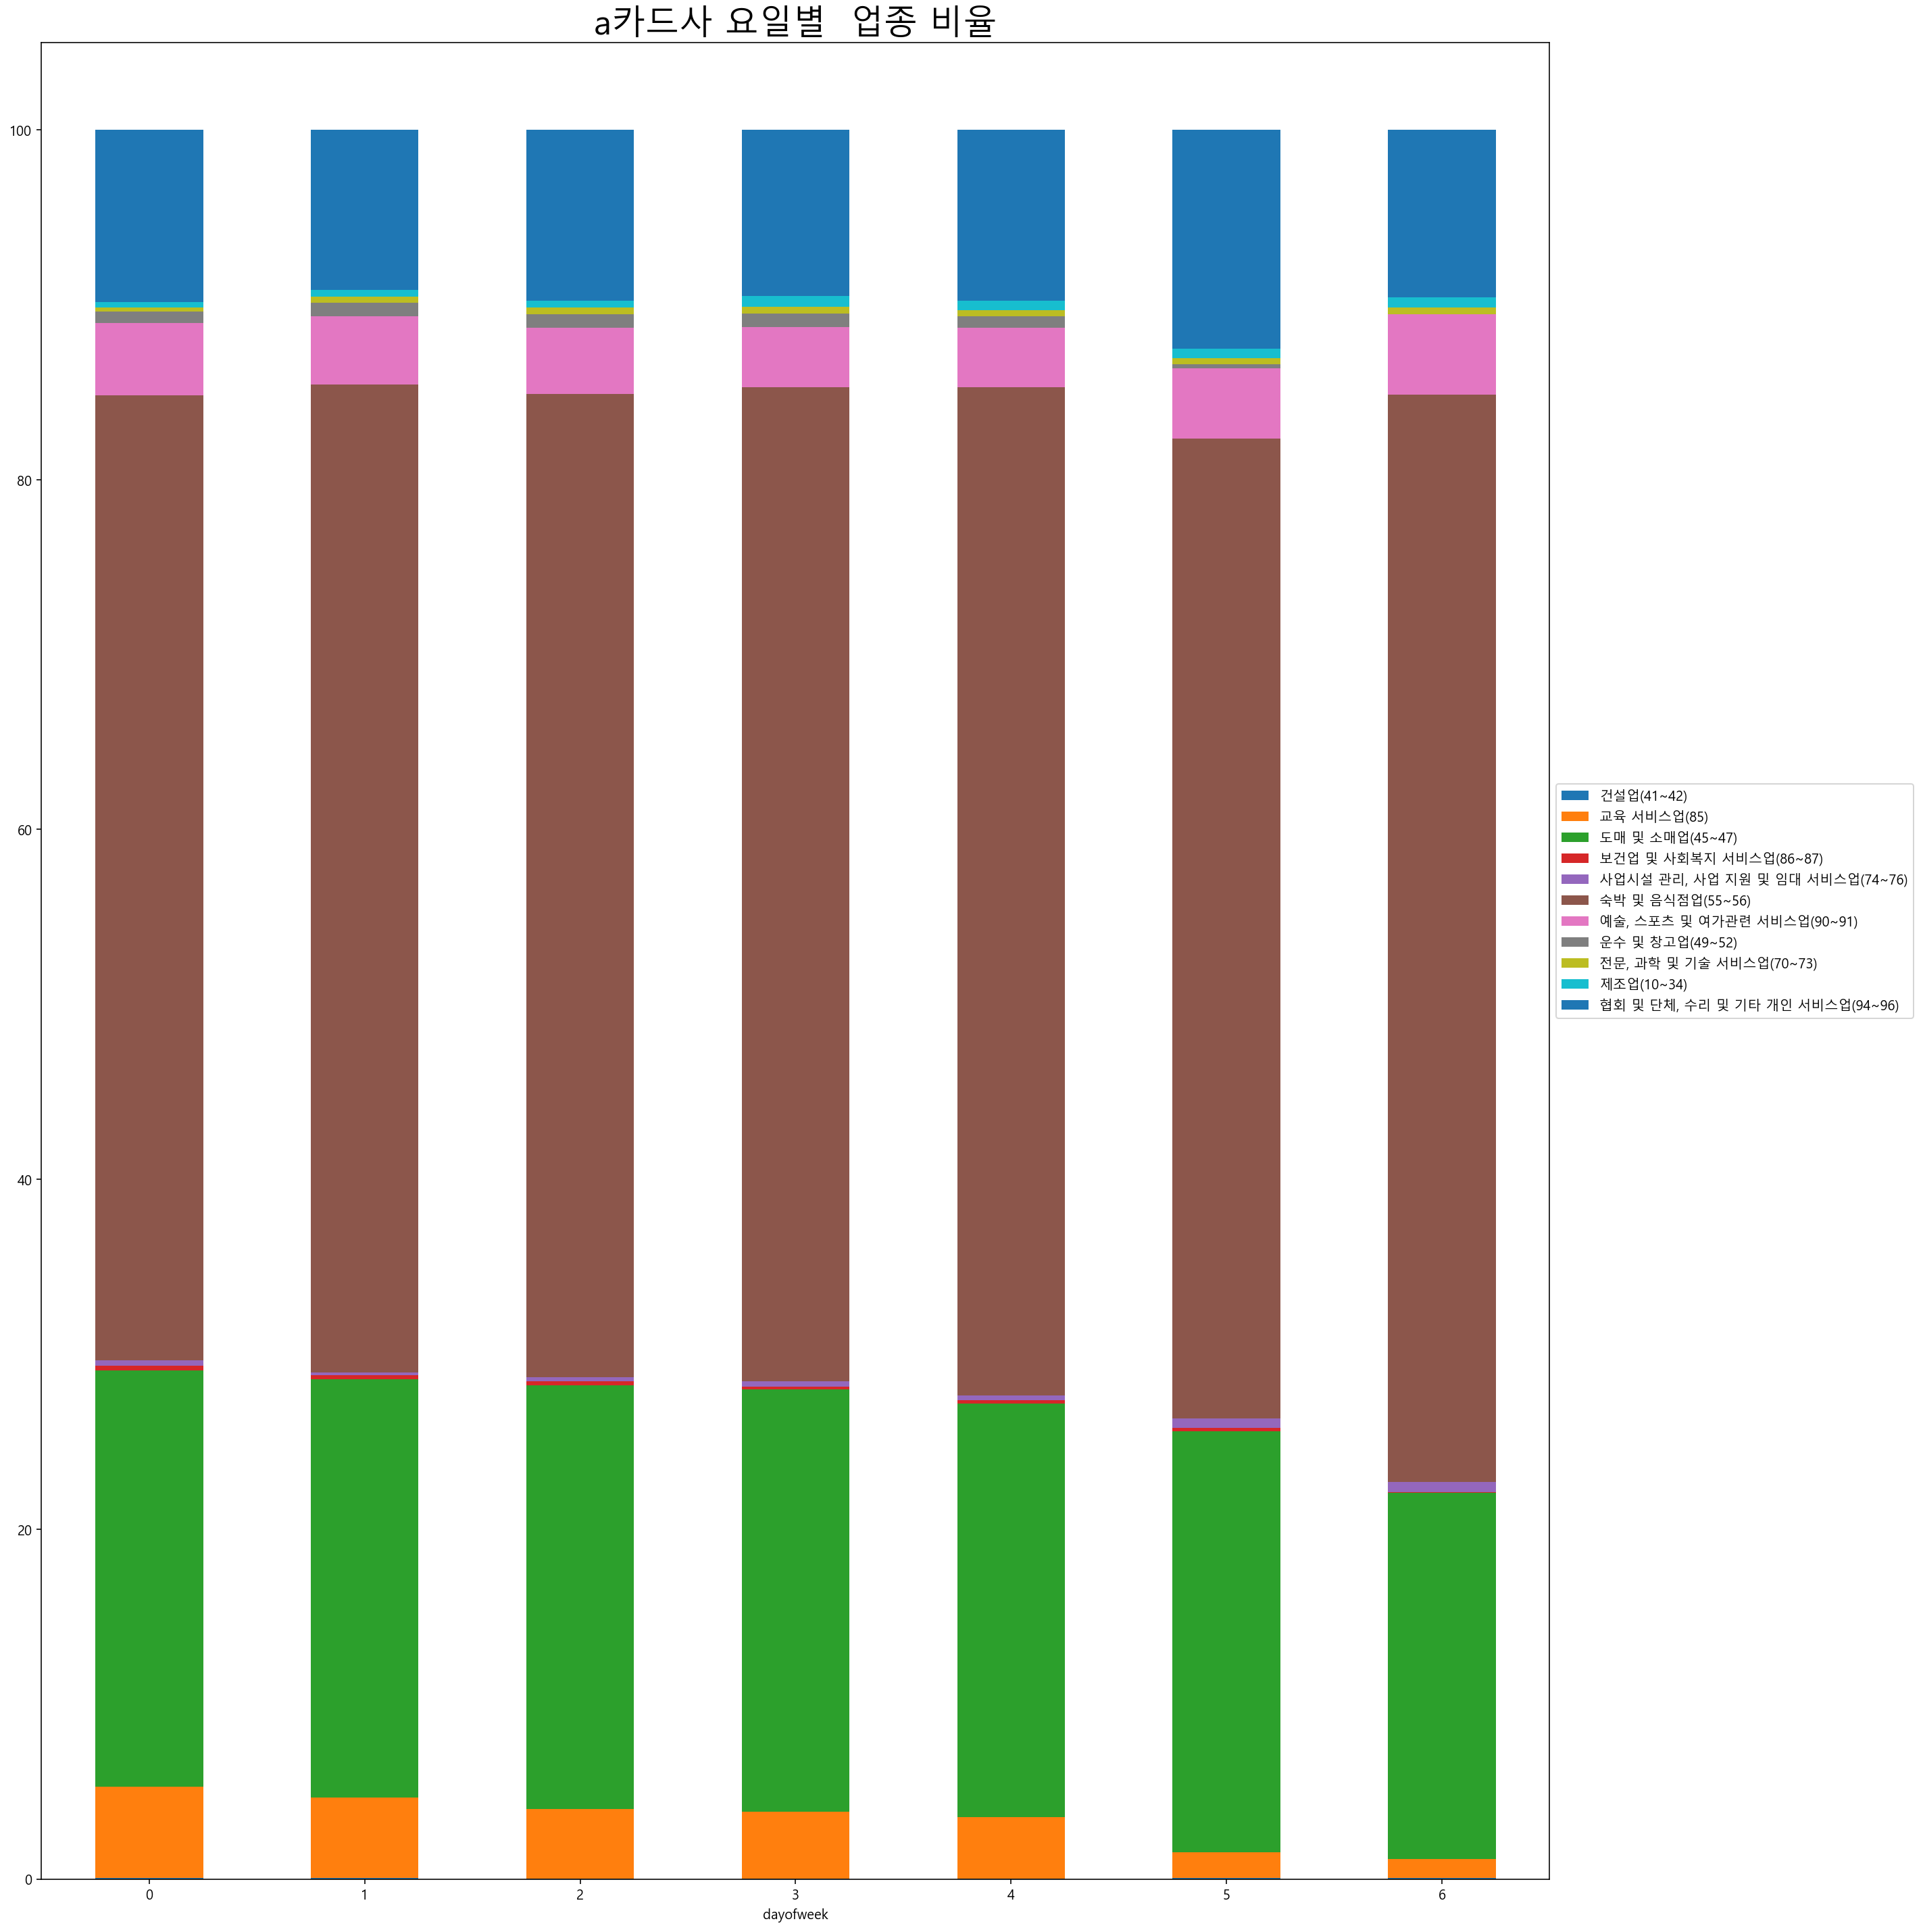

In [62]:
a_dwbiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('a카드사 요일별  업종 비율',fontsize=25)

b카드사의 요일별 업종 구성은 다음과 같다.
1. 숙박 및 음식점업 
2. 도매 및 소매업
3. 협회 및 단체, 수리 및 기타 개인 서비스 업

### 시간대별 거래건당 금액 평균

In [66]:
# b사의 시간대별 거래건당 금액 평균
a1_h_ratio = pd.DataFrame(a1_h.amount/pd.DataFrame(df_a.groupby(['hour']).count()).store_id)
a1_h_ratio.columns = ['ratio']

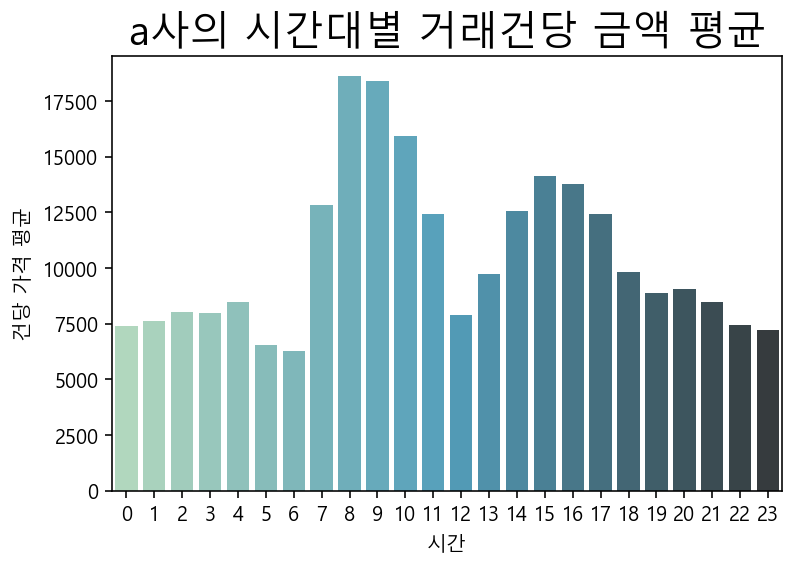

In [69]:

sns.barplot(x=a1_h_ratio.index,y="ratio",data=a1_h_ratio,palette="GnBu_d").set(xlabel='시간',ylabel='건당 가격 평균')
plt.title('a사의 시간대별 거래건당 금액 평균',fontsize=20)
plt.show()

### 평일 시간대별 거래 금액 평균

In [68]:
df_a.columns

Index(['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business',
       'amount', 'date', 'year', 'month', 'dayofweek', 'hour', 'holidays_x',
       'quarter', 'season', 'sido', 'city', '비고', 'cate_l', 'biz', 'cate_m',
       'cate_s', 'sales'],
      dtype='object')

In [70]:
# a사의 평일 시간대별 거래건당 금액 평균
a1_holi = df_a[df_a.holidays_x==0]
a1_holi_f = pd.DataFrame(a1_holi.groupby(['hour']).amount.sum()).reset_index()

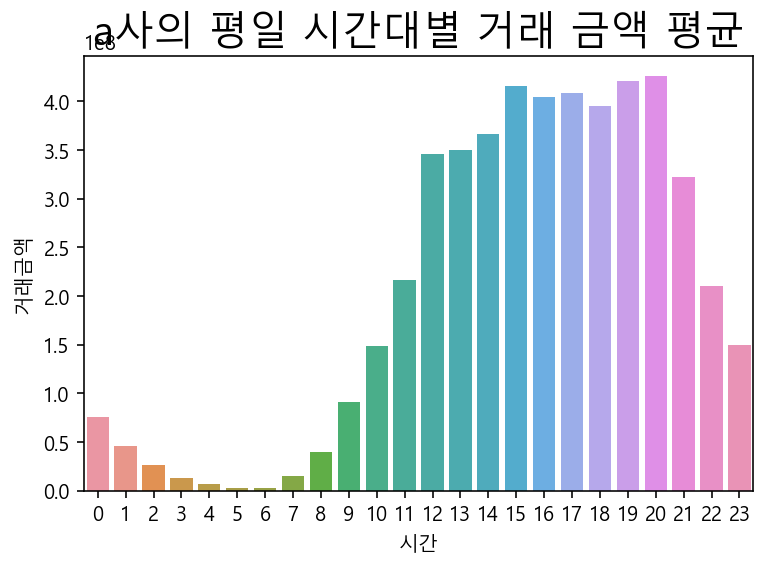

In [71]:
sns.barplot(x="hour", y="amount", data=a1_holi_f).set(xlabel='시간', ylabel='거래금액')
plt.title('a사의 평일 시간대별 거래 금액 평균', fontsize=20)
plt.show()

### 공휴일 시간대별 거래 금액 평균

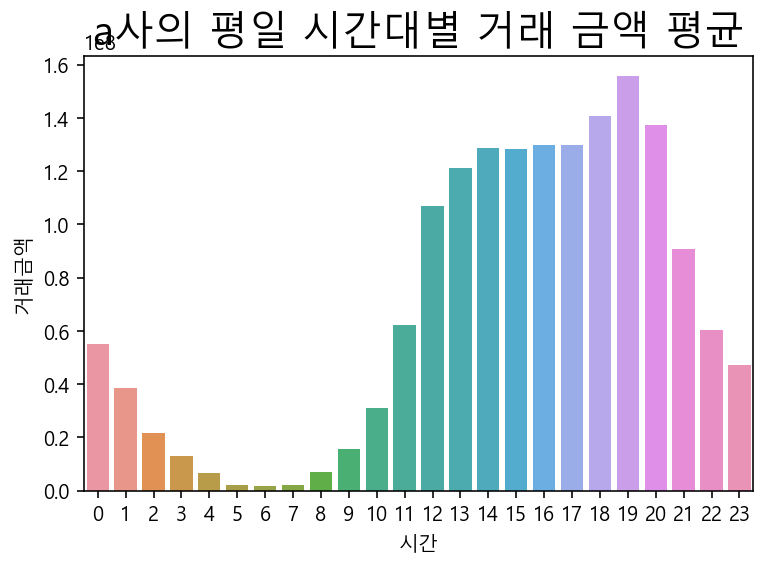

In [73]:
# b사의 평일 시간대별 거래건당 금액 평균
a1_holi_1 = df_a[df_a.holidays_x==1]
a1_holi_h = pd.DataFrame(a1_holi_1.groupby(['hour']).amount.sum()).reset_index()

sns.barplot(x="hour", y="amount", data=a1_holi_h).set(xlabel='시간', ylabel='거래금액')
plt.title('a사의 평일 시간대별 거래 금액 평균', fontsize=20)
plt.show()

### 평일과 공휴일의 시간대별 결제금액 비율 비교

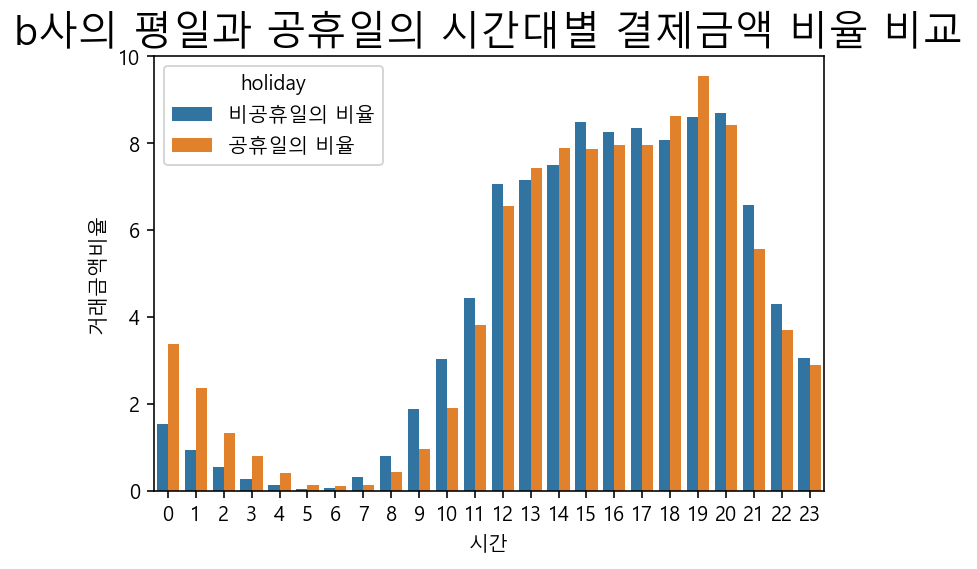

In [74]:
##b사의 평일과 공휴일의 시간대별 결제금액 비율 비교

#데이터 만들기
a1_holi_f['rt'] = a1_holi_f['amount']/sum(a1_holi_f.amount)*100
a1_holi_h['rt'] = a1_holi_h['amount']/sum(a1_holi_h.amount)*100
a1_holi_f['holiday'] = '비공휴일의 비율'
a1_holi_h['holiday'] = '공휴일의 비율'
a1_holi_fh = a1_holi_f.append(a1_holi_h).reset_index(drop=True)

#그래프 레이아웃 설정 및 출력
sns.barplot(x="hour",y="rt",data=a1_holi_fh,hue="holiday").set(xlabel='시간',ylabel='거래금액비율')
plt.title('b사의 평일과 공휴일의 시간대별 결제금액 비율 비교',fontsize=20)
plt.show()

### 공휴일/평일 매출 업종 

In [76]:
a_holi_biz_ratio=pd.crosstab(df_a["holidays_x"], df_a["cate_l"])
a_holi_biz_ratio

cate_l,건설업(41~42),교육 서비스업(85),도매 및 소매업(45~47),보건업 및 사회복지 서비스업(86~87),"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",숙박 및 음식점업(55~56),"예술, 스포츠 및 여가관련 서비스업(90~91)",운수 및 창고업(49~52),"전문, 과학 및 기술 서비스업(70~73)",제조업(10~34),"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)"
holidays_x,,,,,,,,,,,
0,167,19250,107201,987,1066,250782,16310,3266,1554,2026,42745
1,131,2651,45023,222,1075,116759,8703,283,690,1080,22243


In [77]:
a_holibiz_stacked = a_holi_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
a_holi_biz = a_holibiz_stacked.T
a_holi_biz

holidays_x,0,1
cate_l,,
건설업(41~42),0.037498,0.065875
교육 서비스업(85),4.322404,1.333099
도매 및 소매업(45~47),24.070964,22.640551
보건업 및 사회복지 서비스업(86~87),0.221621,0.111636
"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",0.239360,0.540581
숙박 및 음식점업(55~56),56.310710,58.714171
"예술, 스포츠 및 여가관련 서비스업(90~91)",3.662255,4.376446
운수 및 창고업(49~52),0.733349,0.142311
"전문, 과학 및 기술 서비스업(70~73)",0.348936,0.346978


Text(0.5, 1.0, 'a카드사 휴일/평일  업종 비율')

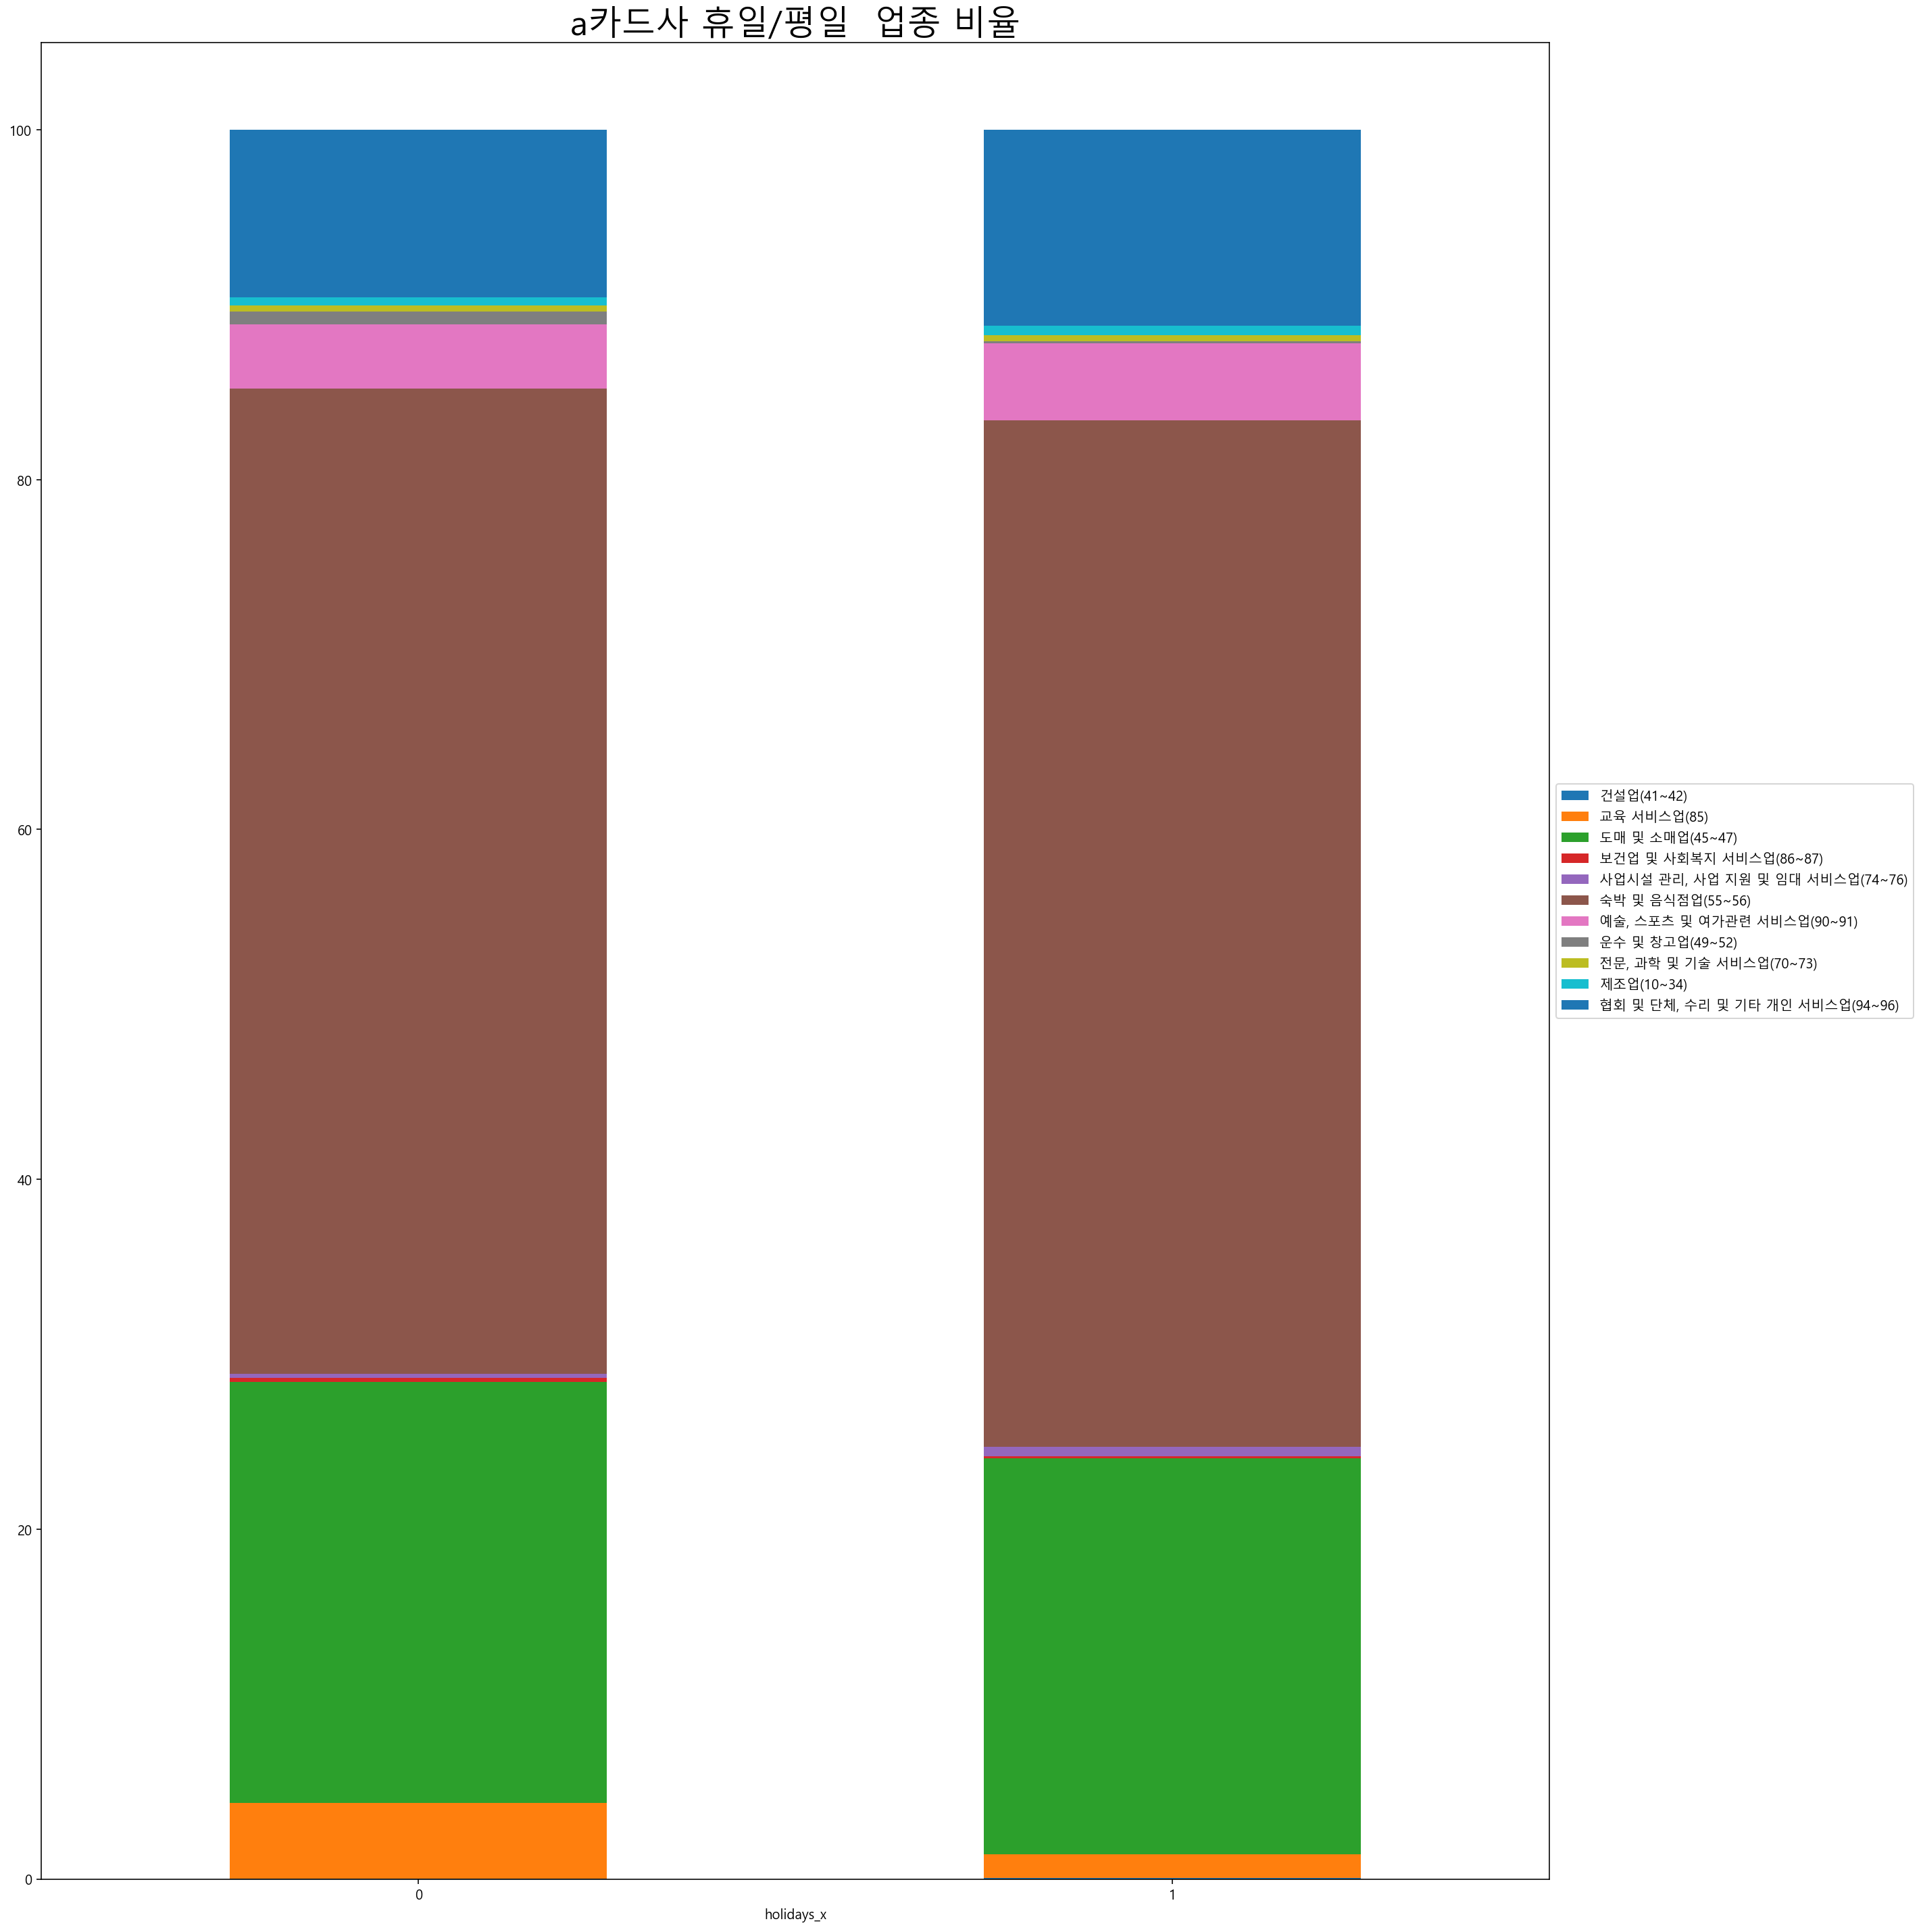

In [78]:
a_holibiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('a카드사 휴일/평일  업종 비율',fontsize=25)

==> 숙박 및 음식점/ 도매 및 소매업/ 협회 및 단체, 수리 및 기타 개인 서비스업

In [79]:
a_holi_biz_ratio1=pd.crosstab(df_a["holidays_x"], df_a["biz"])
a_holi_biz_ratio1

biz,개인 및 소비용품 수리업,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",교육 서비스업,기타 개인 서비스업,"기타 전문, 과학 및 기술 서비스업",기타 제품 제조업,도매 및 상품 중개업,보건업,사업 지원 서비스업,섬유제품 제조업; 의복 제외,...,육상 운송 및 파이프라인 운송업,음식점 및 주점업,"의료, 정밀, 광학 기기 및 시계 제조업",인쇄 및 기록매체 복제업,임대업; 부동산 제외,자동차 및 부품 판매업,전기장비 제조업,전문 서비스업,전문직별 공사업,"창작, 예술 및 여가관련 서비스업"
holidays_x,,,,,,,,,,,,,,,,,,,,,
0,5920,85,19250,36825,954,255,15931,987,646,255,...,3266,247825,340,135,420,4456,65,318,167,2375
1,2034,131,2651,20209,543,140,4308,222,590,320,...,283,114905,14,214,485,1197,38,0,131,720


In [80]:
a_holibiz_stacked1 = a_holi_biz_ratio1.apply(lambda x: x*100/sum(x), axis=1)
a_holi_biz1 = a_holibiz_stacked1.T
a_holi_biz1

holidays_x,0,1
biz,,
개인 및 소비용품 수리업,1.329280,1.022830
"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",0.019086,0.065875
교육 서비스업,4.322404,1.333099
기타 개인 서비스업,8.268703,10.162426
"기타 전문, 과학 및 기술 서비스업",0.214212,0.273056
기타 제품 제조업,0.057258,0.070401
도매 및 상품 중개업,3.577154,2.166348
보건업,0.221621,0.111636
사업 지원 서비스업,0.145053,0.296691


Text(0.5, 1.0, 'b카드사 휴일/평일  업종(소분류) 비율')

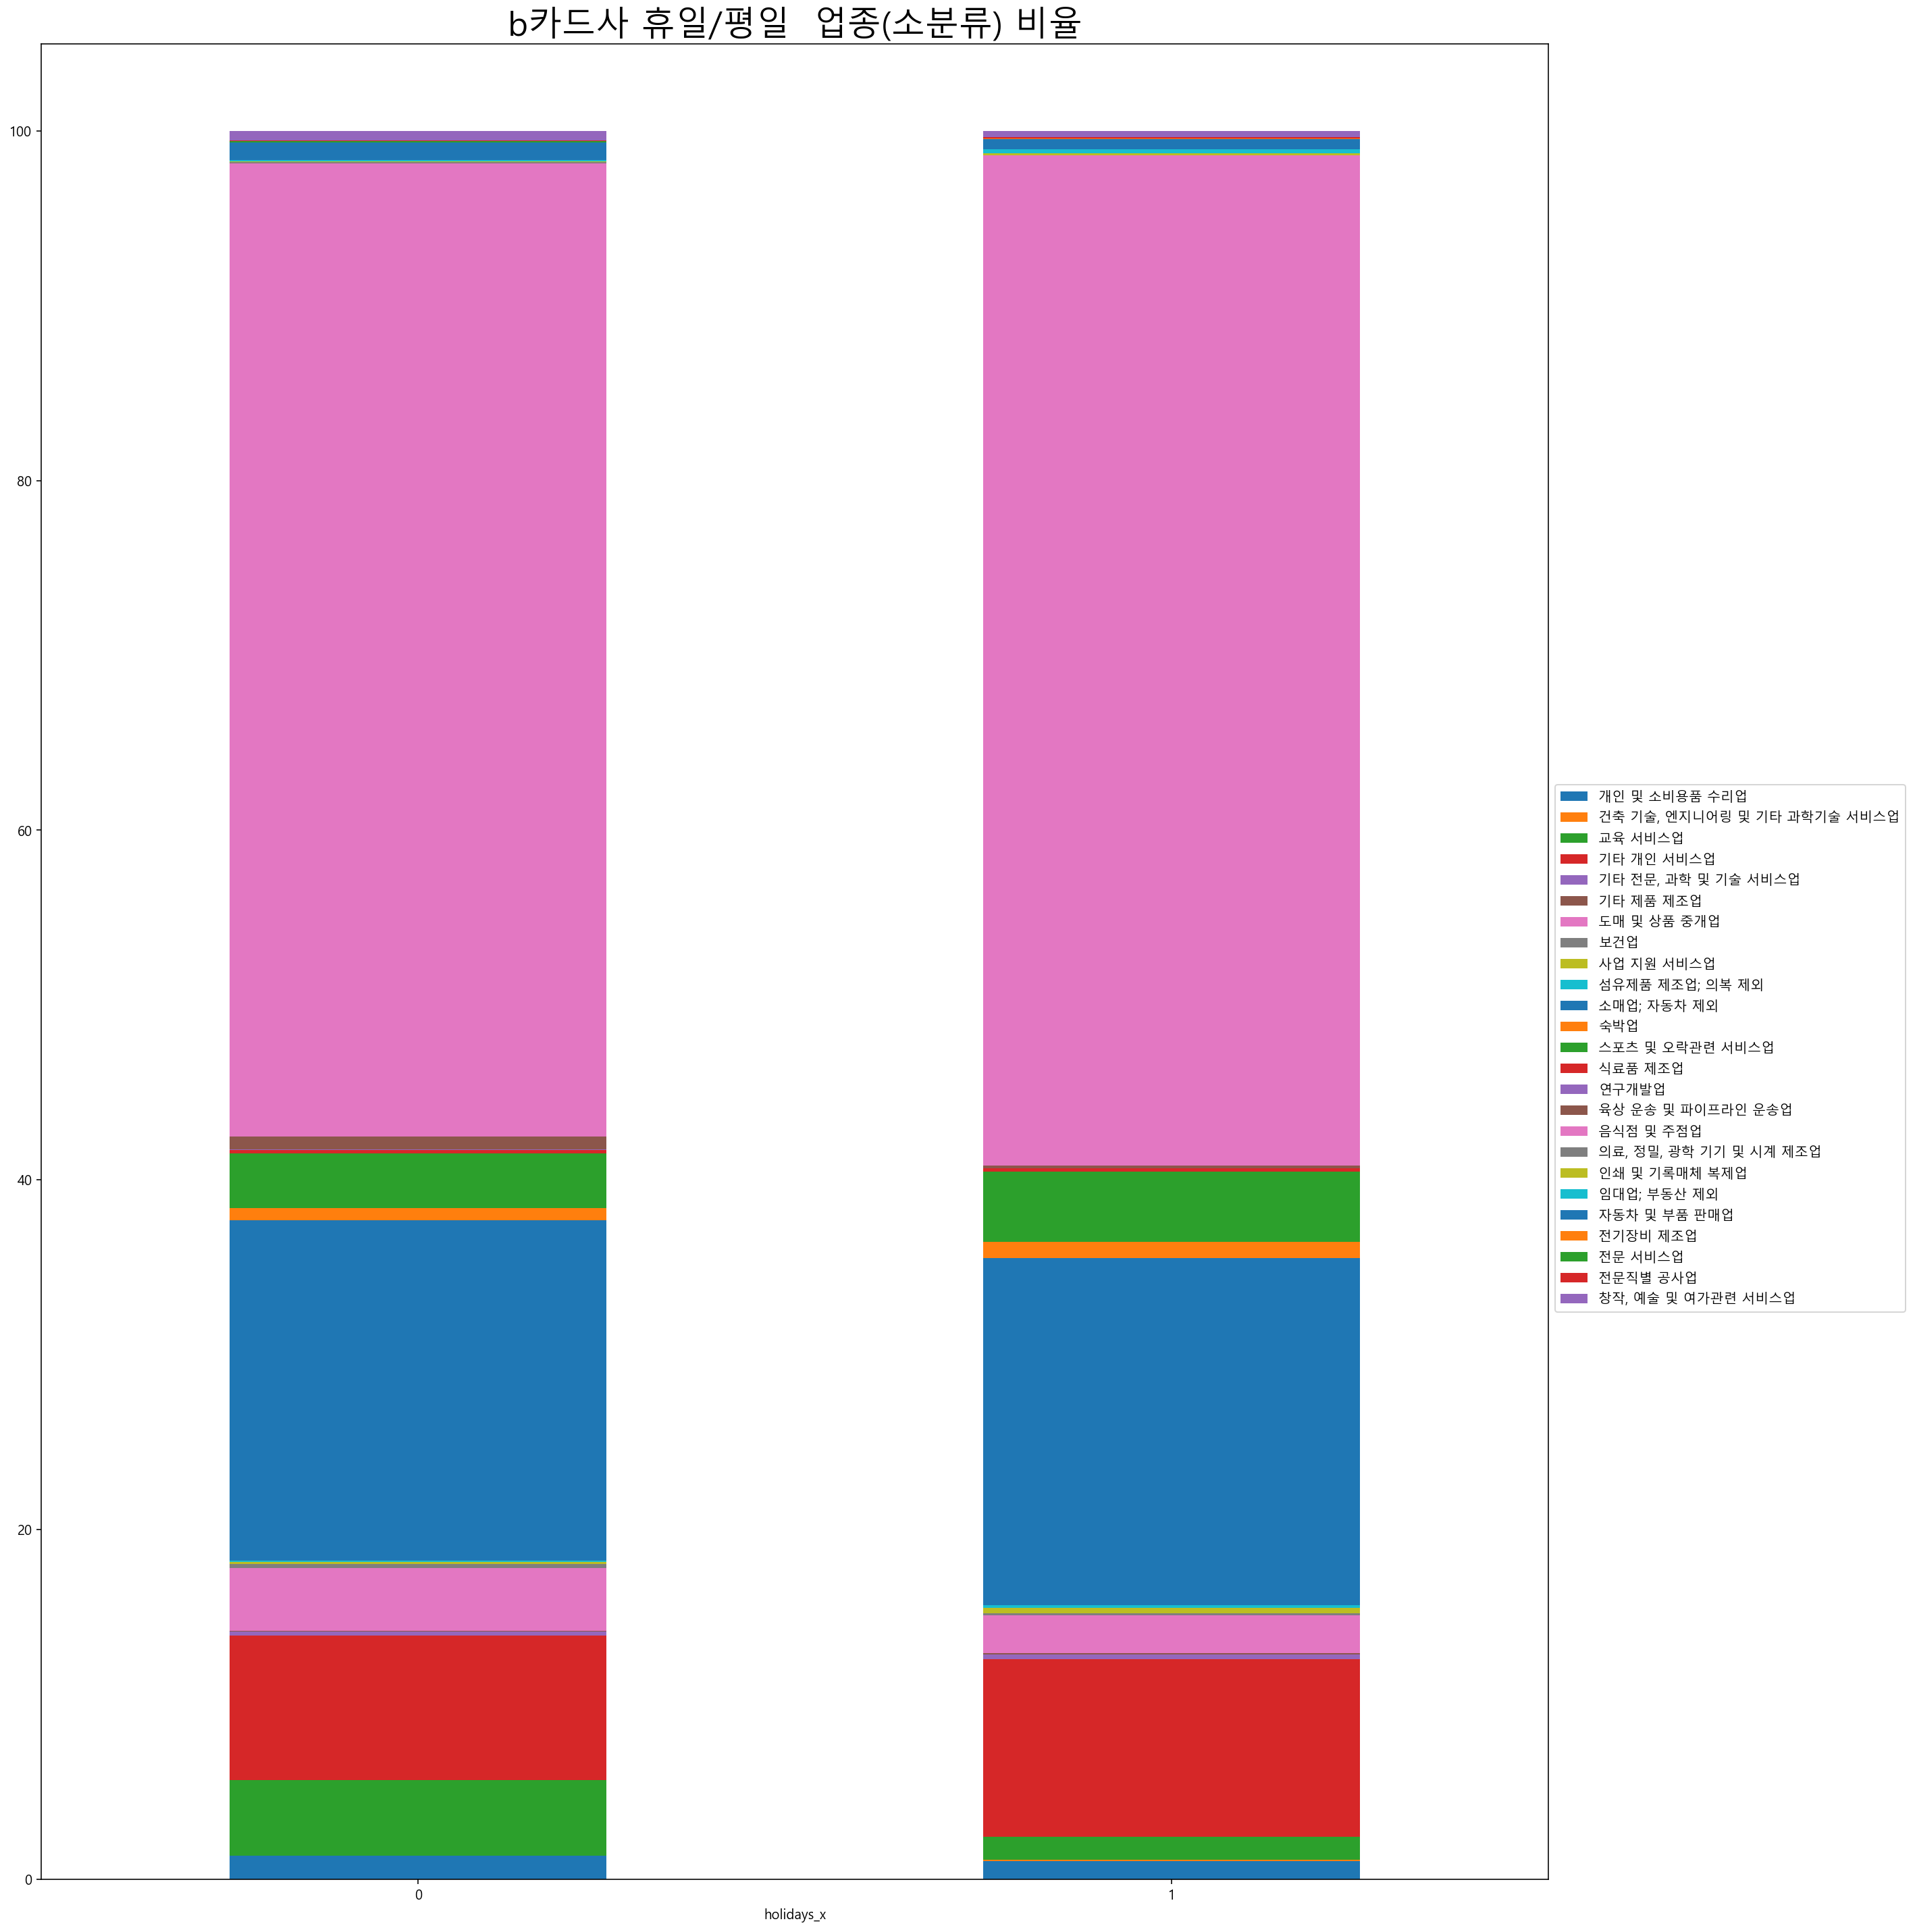

In [81]:
a_holibiz_stacked1.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b-a카드사 휴일/평일  업종(소분류) 비율',fontsize=25)

==> 음식점 및 주점업/ 소매업(자동차제외) / 기타 개인 서비스업

### a사의 월별 거래금액 및 거래건수 비교

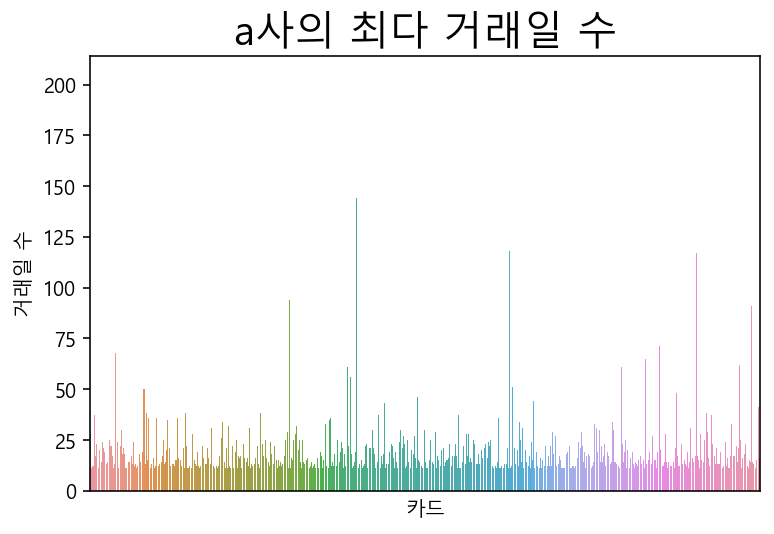

In [84]:
##a사의 카드별 최다 거래일 수

#데이터 만들기
#조건을 주지 않는 경우 카드가 약 백만개이므로 거래횟수 10회 초과만을 대상으로 범위 축소(11306 rows)
a_max = df_a.groupby(['card_id']).count().sort_values('store_id',ascending=False)
a_max_day = a_max[a_max.store_id >10]

#그래프 레이아웃 설정 및 출력

sns.barplot(x=a_max_day.index,y='store_id',data=a_max_day).set(xticks=[],
                                                                                   xlabel='카드',
                                                                                   ylabel='거래일 수')
plt.title('a사의 최다 거래일 수',fontsize=20)
plt.show()

In [85]:
df_a_ratio=pd.crosstab(df_a["month"], df_a["cate_l"])
df_a_ratio
# Nan값이 0으로 변경된다.

cate_l,건설업(41~42),교육 서비스업(85),도매 및 소매업(45~47),보건업 및 사회복지 서비스업(86~87),"사업시설 관리, 사업 지원 및 임대 서비스업(74~76)",숙박 및 음식점업(55~56),"예술, 스포츠 및 여가관련 서비스업(90~91)",운수 및 창고업(49~52),"전문, 과학 및 기술 서비스업(70~73)",제조업(10~34),"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)"
month,,,,,,,,,,,
1,9,2019,11591,101,402,31243,2190,386,218,310,5661
2,13,1906,11177,94,282,28555,2086,356,208,339,5189
3,17,1426,10237,74,95,23963,1565,244,195,163,4296
4,23,1330,10361,73,77,24456,1723,239,118,141,4250
5,22,1505,11551,65,95,26063,1931,242,110,160,4439
6,47,1951,14663,126,136,33958,2204,265,221,219,6041
7,27,2086,14555,119,201,34782,2292,272,249,164,6128
8,63,2050,13361,138,225,33835,2314,236,253,313,5793
9,27,1941,13758,120,108,32341,2439,283,184,347,5822


Text(0.5, 1.0, 'a카드사 월별 업종구성 비율(대분류)')

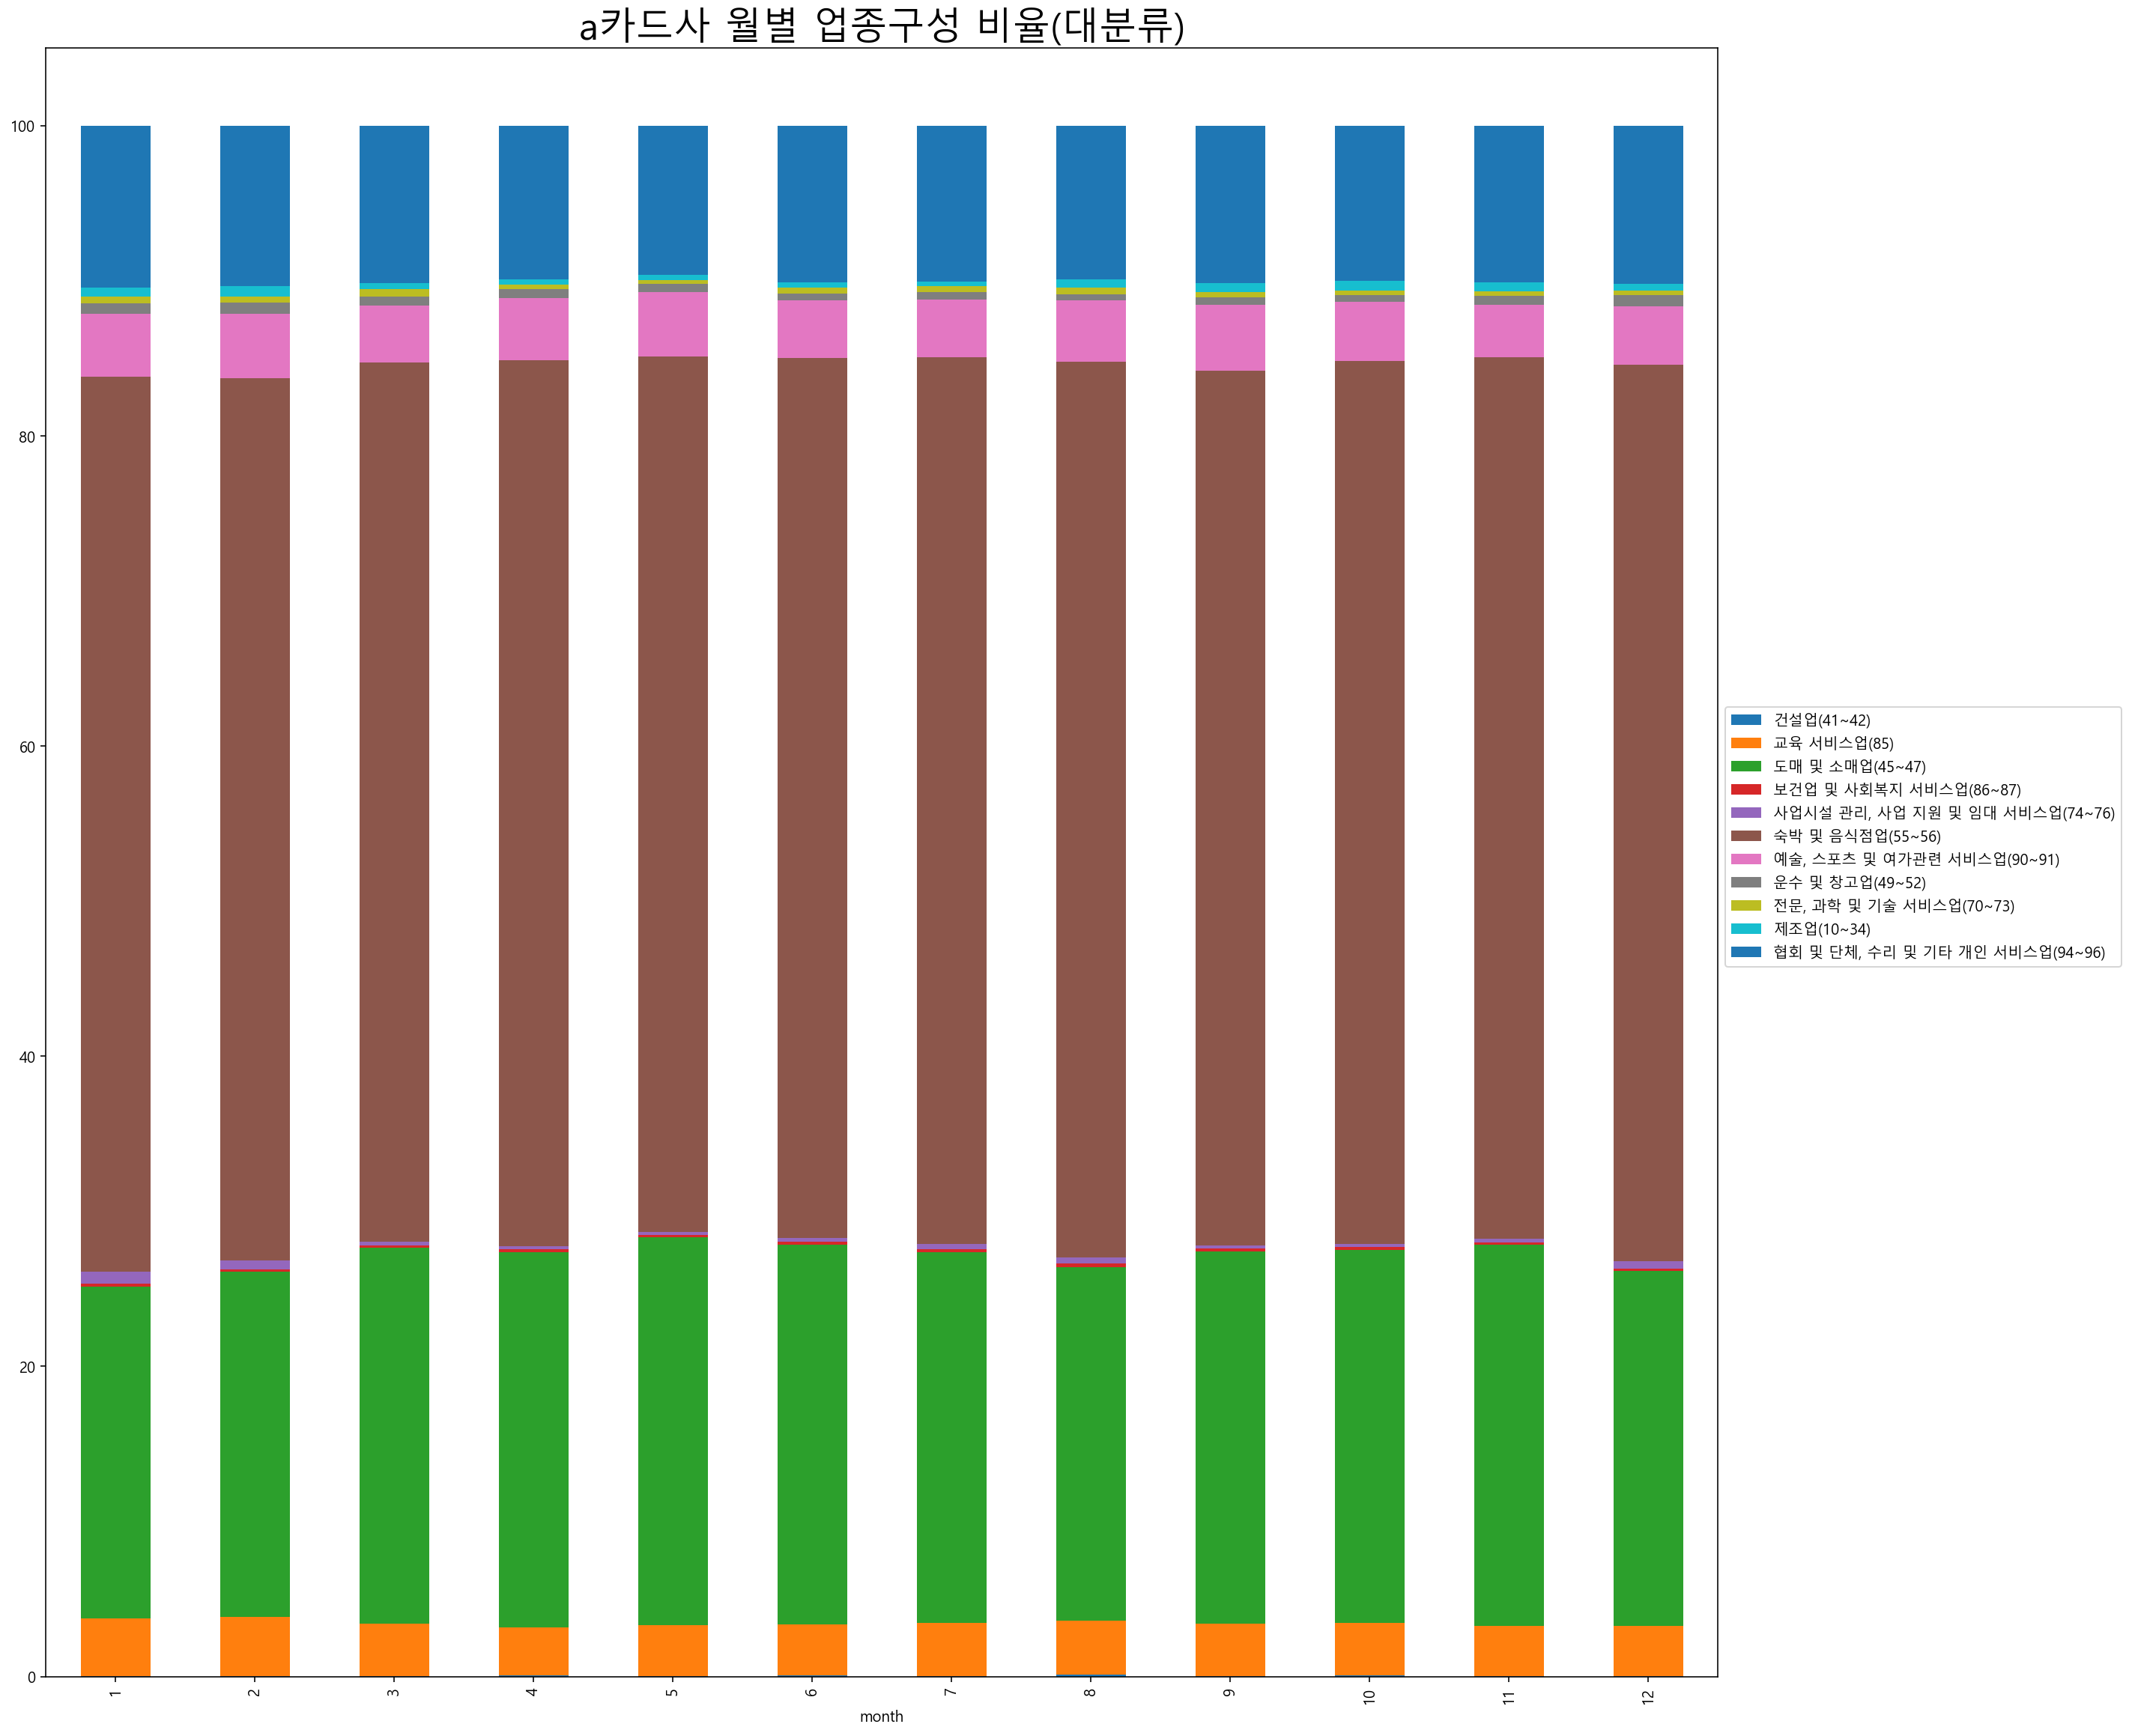

In [86]:
df_a_stacked = df_a_ratio.apply(lambda x: x*100/sum(x), axis=1)
df_a_stacked.plot(kind="bar", stacked=True,figsize=(20,20))
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('a카드사 월별 업종구성 비율(대분류)',fontsize=25)

a 카드사에서 평균적으로 높은 매출건수를 차지하는 업종은 다음과 같다
- 숙박 및 음식점업
- 도매 및 소매업 
- 협회 및 단체, 수리 및 기타 개인 서비스업

In [ ]:
a_month_biz = pd.pivot_table(df_a, index='month', columns='biz', aggfunc = 'mean')

In [ ]:
df_ratio=pd.crosstab(df["card_company"], df["cate_l"])
stacked_data = df_ratio.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(20,12))
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('카드사별 업종구성 비율(대분류)',fontsize=25)

In [ ]:
df.columns

### 할부 거래 

In [114]:
## 일별 store_id긔 구매건수 
def scatter_plot(cnt_srs, co)

SyntaxError: invalid syntax (<ipython-input-114-f158acb8fb99>, line 2)

In [115]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
cnt_srs = df_b.groupby('date')['store_id'].size()

In [ ]:
def scatter_plot(cnt_srs, color, showlegend1 = False, name1 = ""):
    trace = go.Scatter(
        x= cnt_srs.index[::-1],
        y= cnt_srs.values[::-1],
        name = name1,
        showlegend = showlegend1,
        marker = dict(
        color = color,
        ),
    )
    return trace

df1 = df_b[df_b['amount']>0]
train1 = df1[df1['installment_term']==1]
train2 = df1[df1['installment_term']!=1]



cnt_srs1= train1.groupby('hour')['amount'].mean()
cnt_srs2= train2.groupby('hour')['amount'].mean()


trace1 = scatter_plot(cnt_srs1, 'red', True, 'no installment')
trace2 = scatter_plot(cnt_srs2, 'blue', True, 'no installment')

layout = go.Layout(
    height = 500,
    width = 1000,
    #paper_bgcolor='rgb(233,233,233)',
    #title='sum installments in train set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="AcrivationDate")

In [ ]:
train1 = df1[df1['holidays_x']==0]
train2 = df1[df1['holidays_x']==1]

cnt_srs1 = train1.groupby('hour')['installment_term'].mean()
cnt_srs2 = train2.groupby('hour')['installment_term'].mean()

trace1 = scatter_plot(cnt_srs1, 'red', True ,'weekday')
trace2 = scatter_plot(cnt_srs2, 'blue', True ,'weekend')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    #title='sum installments in train set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

- 주중의 경우, 새벽 시간대(오전 6시 이전)와 저녁(20시 이후)를 제외하고, 대부분의 시간대에서 주말의 할부 개월 수를 상회 하는 모습. 즉 사람들이 주중에 할부에 더 많이 선택하고 할부 개월 수를 크게 둔다는 것을 확인할 수 있다.
- 주말의 경우 점심시간에 평일을 상회하는 할부 이용을 볼 수 있음

# b 카드사 분석

* 데이터 그룹화

In [ ]:
df_b = df[df['card_company'] == 'b']
df_b

### 일자별 거래 횟수

In [ ]:
# b사의 일자별 거래횟수

# 그래프 출력
b1 = sns.countplot(df_b['transacted_date']).set(xticks =[],
                                          xlabel='일자',
                                          ylabel='거래횟수')

### 시간대별 평균 거래 금액

In [ ]:
## b의 시간대별 평균 거래 금액

# 데이터 만들기
b1_h = pd.DataFrame(df_b.groupby(['hour']).amount.sum()).reset_index()

In [ ]:
sns.barplot(x="hour", y="amount", data = b1_h).set(xlabel='시간',
                                                  ylabel='거래금액')
plt.title("카드사의 시간대별 거래금액", fontsize = 20)
plt.show()

 * 11시 ~ 20시 사이에 매출이 가장 두드러짐

### 시간대별 업종 분석

* 위의 결과 10시 이후의 거래 중 업종을 분석한다.

In [ ]:
b_h_11 = df_b[df_b["hour"]>10]
b_h_11 

In [ ]:
bh_11 = b_h_11.groupby(["hour","cate_l"])["amount"].sum().reset_index()
bh_11.sort_values('amount', ascending = False).T

In [ ]:
 bh_11[bh_11["hour"]== 20].sort_values('amount', ascending = False)

In [ ]:
plt.figure(figsize = (20,20))
sns.barplot(x="hour", y="amount", hue = "cate_l", data = bh_11 , dodge = False, ci = 95).set(xlabel='시간',
                                                  ylabel='거래금액')
plt.title("b사의 시간별 업종 분포", fontsize = 20)
plt.legend(loc = 'right')
plt.show()

 * 10시 이후 매출에 따른 주요 업종을 살펴 보면 다음과 같다.
    주요 업종: 도매 및 소매업, 숙박 및 음식점, 교육 서비스, 협회 및 단체 수리 및 기타, 예술 스포트 여가관련 서비스
 
 ```
 
 11시 : 도매 및 소매업/ 협회 및 단체, 수리 및 기타 개인 서비스업/ 보건업 및 사회복지 서비스업
12시:  도매 및 소매/ 숙박 및 음식점업/ 협회 및 단체, 수리 및 기타
 13-14시 : 도매 및 소매/숙박 및 음식점 업/ 교육 서비스 업
 15-16시 : 도매 및 소매 / 교육 서비스/ 협회 및 단체 / 숙박 및 음식업
 17-18시:  도매 및 소매업 / 교육 서비스/ 숙박 및 음식점
 19시-22시 : 숙박 및 음식점/ 도매 및 소매/ 교육 서비스
             / 예술 스포츠 및 여가 서비스 업 or 협회 및 단체
 23시: 숙박 및 음식점/ 도매 및 소매업/ 예술,스포트 여가관련 서비스
 ```
 

### 계절별 분석

#### 중분류

In [ ]:
b_bizl=pd.crosstab(df_b["season"], df_b["cate_l"])
b_bizl

In [ ]:
b_bizl_ratio = b_bizl.apply(lambda x: x*100/sum(x), axis=1)
b_bizl_ratio_rv = b_bizl_ratio.T
b_bizl_ratio_rv

In [ ]:
b_bizl_ratio.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 분기 매출 비율',fontsize=25)

계절별 높은 매출의 업종은 다음과 같다.
- 숙박 및 음식점업/ 도매 및 소매업/ 협회 및 단체, 수리 및 기타 개인 서비스업

#### 소분류

In [ ]:
b_ss_biz_ratio=pd.crosstab(df_b["season"], df_b["biz"])
b_ss_biz_ratio

In [ ]:
b_ssbiz_stacked = b_ss_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
b_ssbiz_stacked_rv = b_ssbiz_stacked.T
b_ssbiz_stacked_rv

In [ ]:
b_ssbiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 시즌 매출 비율',fontsize=25)

계절별 높은 매출의 업종은 다음과 같다.
- 음식점 및 주점업 / 소매업(자동차 제외)/ 기타 개인 서비스업

### 분기별 분석

In [ ]:
b_qq_biz_ratio=pd.crosstab(df_b["quarter"], df_b["biz"])
b_qq_biz_ratio

In [ ]:
b_qbiz_stacked = b_qq_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
b_qbiz_stacked_rv = b_qbiz_stacked.T
b_qbiz_stacked_rv

In [ ]:
b_qbiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 분기별  매출 비율',fontsize=25)

분기별 높은 매출의 업종은 다음과 같다.
- 음식점 및 주점업 / 소매업(자동차제외)/ 기타 개인 서비스업

### 요일별 평균 거래 금액

In [ ]:
## b사의 요일별 평균 거래 금액

# 데이터 만들기
b1_d = pd.DataFrame(df_b.groupby(['dayofweek']).amount.sum()).reset_index()

In [ ]:
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

In [ ]:
sns.barplot(x=index, y="amount", data = b1_d).set(xlabel='요일',
                                                  ylabel='거래금액')
plt.title("b사의 요일별 거래금액", fontsize = 20)
plt.show()

### 요일별 업종

In [ ]:
b_dw_biz_ratio=pd.crosstab(df_b["dayofweek"], df_b["cate_l"])
b_dw_biz_ratio

In [ ]:
b_dwbiz_stacked = b_dw_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
b_dw_biz = b_dwbiz_stacked.T
b_dw_biz

In [ ]:
b_dwbiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 요일별  업종 비율',fontsize=25)

b카드사의 요일별 업종 구성은 다음과 같다.
1. 숙박 및 음식점업 
2. 도매 및 소매업
3. 협회 및 단체, 수리 및 기타 개인 서비스 업

### 시간대별 거래건당 금액 평균

In [ ]:
# b사의 시간대별 거래건당 금액 평균
b1_h_ratio = pd.DataFrame(b1_h.amount/pd.DataFrame(df_b.groupby(['hour']).count()).store_id)
b1_h_ratio.columns = ['ratio']

In [ ]:
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
sns.barplot(x=b1_h_ratio.index,y="ratio",data=b1_h_ratio,palette="GnBu_d").set(xlabel='시간',ylabel='건당 가격 평균')
plt.title('b사의 시간대별 거래건당 금액 평균',fontsize=20)
plt.show()

### 평일 시간대별 거래 금액 평균

In [ ]:
df_b.columns

In [ ]:
# b사의 평일 시간대별 거래건당 금액 평균
b1_holi = df_b[df_b.holidays_x==0]
b1_holi_f = pd.DataFrame(b1_holi.groupby(['hour']).amount.sum()).reset_index()

In [ ]:
sns.barplot(x="hour", y="amount", data=b1_holi_f).set(xlabel='시간', ylabel='거래금액')
plt.title('a사의 평일 시간대별 거래 금액 평균', fontsize=20)
plt.show()

### 공휴일 시간대별 거래 금액 평균

In [ ]:
# b사의 평일 시간대별 거래건당 금액 평균
b1_holi_1 = df_b[df_b.holidays_x==1]
b1_holi_h = pd.DataFrame(b1_holi_1.groupby(['hour']).amount.sum()).reset_index()

sns.barplot(x="hour", y="amount", data=b1_holi_h).set(xlabel='시간', ylabel='거래금액')
plt.title('b사의 평일 시간대별 거래 금액 평균', fontsize=20)
plt.show()

### 평일과 공휴일의 시간대별 결제금액 비율 비교

In [ ]:
##b사의 평일과 공휴일의 시간대별 결제금액 비율 비교

#데이터 만들기
b1_holi_f['rt'] = b1_holi_f['amount']/sum(b1_holi_f.amount)*100
b1_holi_h['rt'] = b1_holi_h['amount']/sum(b1_holi_h.amount)*100
b1_holi_f['holiday'] = '비공휴일의 비율'
b1_holi_h['holiday'] = '공휴일의 비율'
b1_holi_fh = b1_holi_f.append(b1_holi_h).reset_index(drop=True)

#그래프 레이아웃 설정 및 출력
sns.barplot(x="hour",y="rt",data=b1_holi_fh,hue="holiday").set(xlabel='시간',ylabel='거래금액비율')
plt.title('b사의 평일과 공휴일의 시간대별 결제금액 비율 비교',fontsize=20)
plt.show()

### 공휴일/평일 매출 업종 

In [ ]:
b_holi_biz_ratio=pd.crosstab(df_b["holidays_x"], df_b["cate_l"])
b_holi_biz_ratio

In [ ]:
b_holibiz_stacked = b_holi_biz_ratio.apply(lambda x: x*100/sum(x), axis=1)
b_holi_biz = b_holibiz_stacked.T
b_holi_biz

In [ ]:
b_holibiz_stacked.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 휴일/평일  업종 비율',fontsize=25)

==> 숙박 및 음식점/ 도매 및 소매업/ 협회 및 단체, 수리 및 기타 개인 서비스업

In [ ]:
b_holi_biz_ratio1=pd.crosstab(df_b["holidays_x"], df_b["biz"])
b_holi_biz_ratio1

In [ ]:
b_holibiz_stacked1 = b_holi_biz_ratio1.apply(lambda x: x*100/sum(x), axis=1)
b_holi_biz1 = b_holibiz_stacked1.T
b_holi_biz1

In [ ]:
b_holibiz_stacked1.plot(kind="bar", stacked=True, figsize=(20,25), rot = 0)
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 휴일/평일  업종(소분류) 비율',fontsize=25)

==> 음식점 및 주점업/ 소매업(자동차제외) / 기타 개인 서비스업

### b사의 월별 거래금액 및 거래건수 비교

In [ ]:
##a사의 카드별 최다 거래일 수

#데이터 만들기
#조건을 주지 않는 경우 카드가 약 백만개이므로 거래횟수 10회 초과만을 대상으로 범위 축소(11306 rows)
b_max = df_b.groupby(['card_id']).count().sort_values('store_id',ascending=False)
b_max_day = b_max[b_max.store_id >10]

#그래프 레이아웃 설정 및 출력

sns.barplot(x=b_max_day.index,y='store_id',data=b_max_day).set(xticks=[],
                                                                                   xlabel='카드',
                                                                                   ylabel='거래일 수')
plt.title('b사의 최다 거래일 수',fontsize=20)
plt.show()

In [ ]:
df_b_ratio=pd.crosstab(df_b["month"], df_b["cate_l"])
df_b_ratio
# Nan값이 0으로 변경된다.

In [ ]:
df_b_stacked = df_b_ratio.apply(lambda x: x*100/sum(x), axis=1)
df_b_stacked.plot(kind="bar", stacked=True,figsize=(20,20))
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('b카드사 월별 업종구성 비율(대분류)',fontsize=25)

### b카드사에서 평균적으로 높은 매출건수를 차지하는 업종은 다음과 같다
- 숙박 및 음식점업
- 도매 및 소매업 
- 협회 및 단체, 수리 및 기타 개인 서비스업

In [ ]:
b_month_biz = pd.pivot_table(df_b, index='month', columns='biz', aggfunc = 'mean')

In [ ]:
df_ratio=pd.crosstab(df["card_company"], df["cate_l"])
stacked_data = df_ratio.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize=(20,12))
plt.legend(bbox_to_anchor=(1,0.6))
plt.title('카드사별 업종구성 비율(대분류)',fontsize=25)

In [ ]:
df.columns

### 할부 거래 

In [ ]:
## 일별 store_id긔 구매건수 
def scatter_plot(cnt_srs, co)

In [ ]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
cnt_srs = df_b.groupby('date')['store_id'].size()

In [ ]:
def scatter_plot(cnt_srs, color, showlegend1 = False, name1 = ""):
    trace = go.Scatter(
        x= cnt_srs.index[::-1],
        y= cnt_srs.values[::-1],
        name = name1,
        showlegend = showlegend1,
        marker = dict(
        color = color,
        ),
    )
    return trace

df1 = df_b[df_b['amount']>0]
train1 = df1[df1['installment_term']==1]
train2 = df1[df1['installment_term']!=1]



cnt_srs1= train1.groupby('hour')['amount'].mean()
cnt_srs2= train2.groupby('hour')['amount'].mean()


trace1 = scatter_plot(cnt_srs1, 'red', True, 'no installment')
trace2 = scatter_plot(cnt_srs2, 'blue', True, 'no installment')

layout = go.Layout(
    height = 500,
    width = 1000,
    #paper_bgcolor='rgb(233,233,233)',
    #title='sum installments in train set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="AcrivationDate")

In [ ]:
train1 = df1[df1['holidays_x']==0]
train2 = df1[df1['holidays_x']==1]

cnt_srs1 = train1.groupby('hour')['installment_term'].mean()
cnt_srs2 = train2.groupby('hour')['installment_term'].mean()

trace1 = scatter_plot(cnt_srs1, 'red', True ,'weekday')
trace2 = scatter_plot(cnt_srs2, 'blue', True ,'weekend')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    #title='sum installments in train set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

- 주중의 경우, 새벽 시간대(오전 6시 이전)와 저녁(20시 이후)를 제외하고, 대부분의 시간대에서 주말의 할부 개월 수를 상회 하는 모습. 즉 사람들이 주중에 할부에 더 많이 선택하고 할부 개월 수를 크게 둔다는 것을 확인할 수 있다.
- 주말의 경우 점심시간에 평일을 상회하는 할부 이용을 볼 수 있음

 ```
 | 포인트 사용 카드사 2개 b, f 
  해당 카드사에 매출 패턴 분석해서 할부 관련 이벤트 제안
  할부& 업종 분석해서 패턴 찾기
  ```

# 클러스터링

- 일별 거래량의 변화율이 비슷한 상점끼리 묶어서 분석

: 주기를 전날과 7일전으로 하여 매주 주기성이 얼마나 다른지를 확인하여 클러스터 진행

- 시간 별 거래량의 변화율이 비슷한 상점끼리 묶어서 클러스터 진행

In [ ]:
df["date"][0]

In [ ]:
train1 = df.groupby(['store_id','transacted_date'])['amount'].agg({'mean'}).reset_index()
train1['amount_lag1'] = train1.groupby(['store_id'])['mean'].shift(1)
train1['amount_lag7'] = train1.groupby(['store_id'])['mean'].shift(7)
train1 = train1.fillna(0)

train1['amount_ratio1'] = train1['mean']/ (train1['amount_lag1']+1)
train1['amount_ratio7'] = train1['mean']/ (train1['amount_lag7']+1)
train1 = train1[train1['transacted_date']>='2016-12-05']

train2 = train1.groupby(['store_id']).agg({'amount_ratio1':'mean','amount_ratio7':'mean'}).reset_index()#feature = train1[['store_id','amount_ratio1','amount_ratio7','amount_ratio14']]
feature = train2[['store_id','amount_ratio1','amount_ratio7']]

plt.scatter(train2['amount_ratio1'],train2['amount_ratio7'])

In [ ]:
train2.max()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

feature = feature[feature['store_id']!=2136]

Z = linkage(feature,'ward')

plt.figure(figsize = (50,20))
dendrogram(Z,
          leaf_rotation = 100,
          leaf_font_size = 1,
)
plt.show()

In [ ]:
train1

In [ ]:
from scipy.cluster.hierarchy import fcluster

k= 3

predict=fcluster(Z, k, criterion='maxclust')
feature['cluster']=predict
train1 = pd.merge(train1,feature,on='store_id', how='left')
train1 = train1.fillna(0)

train_0 = train1[train1['cluster']==0]
train_1 = train1[train1['cluster']==1]
train_2 = train1[train1['cluster']==2]
train_3 = train1[train1['cluster']==3]
#train_4 = train1[train1['cluster']==4]

cnt_srs_0 = train_0.groupby('transacted_date')['mean'].mean()
cnt_srs_1 = train_1.groupby('transacted_date')['mean'].mean()
cnt_srs_2 = train_2.groupby('transacted_date')['mean'].mean()
cnt_srs_3 = train_3.groupby('transacted_date')['mean'].mean()
#cnt_srs_4 = train_4.groupby('date')['amount'].mean()

trace_0 = scatter_plot(cnt_srs_0, 'red', True ,'Cluster_0')
trace_1 = scatter_plot(cnt_srs_1, 'blue', True ,'Cluster_1')
trace_2 = scatter_plot(cnt_srs_2, 'green', True ,'Cluster_2')
trace_3 = scatter_plot(cnt_srs_3, 'black', True ,'Cluster_3')
#trace_4 = scatter_plot(cnt_srs_4, 'indigo', True ,'Cluster_4')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='sum amount in train set '
)

data = [trace_0,trace_1,trace_2,trace_3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

# 제외

### 연도별 매출 금액

In [ ]:
year_amount_sum = pd.pivot_table(data=df_b, index="year", values = "amount", aggfunc="sum")
year_amount_sum["amount"].map(lambda x: f"{x:,.0f}")

In [ ]:
g=year_amount_sum.plot.bar(rot=0)

### 연도 시도별 결제건

In [ ]:
year_sido_amount = pd.pivot_table(data = df_b, index = "year",
                                  columns = "sido",values = "card_id", aggfunc="count")
year_sido_amount.fillna(0).astype(int).style.bar()

# 결측값에 대한 통계 불가 

In [ ]:
sns.catplot(data=df_b, x="year", y="card_id", col="sido", col_wrap=4, #sharex=False, sharey=False
            kind="point", ci=None)

### 시도별 매출액 

In [ ]:
year_sido_amount = pd.pivot_table(data = df_b, index = "year",
                                  columns = "sido",values = "amount", aggfunc="sum")
year_sido_amount.fillna(0).astype(int).style.background_gradient()

In [ ]:
sns.catplot(data=df_b, x="year", y="amount", col="sido", kind = "bar",col_wrap=4, ci=None)

### 시도별 휴일 매출

In [ ]:
sns.catplot(data=df_b, x="year", y="amount", 
            hue="holidays", col="sido", col_wrap=4, #sharex=False, sharey=False
            kind="point", ci=None)

### 연도, 월별 결제액

In [ ]:
group = df.groupby(["month", "year"])["amount"].agg(["count", "sum"]).unstack()
group["sum"].style.format("{:,}")

In [ ]:
group["sum"].style.background_gradient(cmap="Blues")

In [ ]:
group["count"].style.background_gradient(cmap="Blues")

In [ ]:
group["sum"].style.bar()

In [ ]:
group["count"].style.bar()

In [ ]:
year_month_count = group["count"]
year_month_count

In [ ]:
df_b.pivot_table(index="month", columns="year", values="amount").plot.box()

In [ ]:
p = df_b.pivot_table(index="month", columns=["year", "sido"], values="amount")
p.plot.box(figsize=(25, 7), rot=35)

In [ ]:
plt.figure(figsize=(20, 4))
sns.heatmap(year_month_count, annot=True, cmap="YlGn", fmt=",.0f")

### 계절 및 분기별 매출액 

#### 계절

In [ ]:
sns.catplot(data=df_b, x="season", y="amount", kind="bar", col="year", col_wrap=4)

#### 분기

In [ ]:
sns.catplot(data=df_b, x="quarter", y="amount", kind="bar", col="year", col_wrap=4)

### 연도/ 시간 매출건수 및 매출액

In [ ]:
t_hour1 = df.groupby(["hour","year"])["amount"].agg(["sum"]).unstack().round()
t_hour1["sum"].style.format("{:,}")

In [ ]:
t_hour1.plot.bar(figsize=(15,8), rot=0)

In [ ]:
t_hour1c = df.groupby(["hour","year"])["card_id"].agg(["count"]).unstack().round()
t_hour1c["count"].style.format("{:,}")

In [ ]:
t_hour1c.plot(figsize=(15,8), rot=0)

In [ ]:
df_b.corr()

* 
* 

In [ ]:
df[df['store_id']==1770]

In [ ]:
df_a.groupby(["card_company","type_of_business"])["card_id"].count().round().sort_values(ascending=[False]).head(10)

In [ ]:
df_b.groupby(["card_company","type_of_business"])["amount"].sum().round().sort_values(ascending=[False]).head(10)

In [ ]:
df_b.groupby(["card_company","type_of_business"])["card_id"].count().round().sort_values(ascending=[False]).head(10)

- card_id 기준으로 하기 

In [ ]:
year_biz =df_b.groupby(["year","type_of_business"])["amount"].sum().round().unstack()
year_biz



In [ ]:
# 연도 & 업종별 매출양 
sns.catplot(data=df_b, x="year", y="amount", col="type_of_business", kind = "bar",col_wrap=4, ci=None)